<h1 align="center"><font size="5">  Construction d’un modèle de Scoring à l’aide des algorithmes supervisés
appliqués aux données bancaires et relationnelles </font></h1>

#### Realized by : BENALI Amine - WANG Qi
##### LinkedIn:
- <a href="https://www.linkedin.com/in/medamineben/" target="_blank">BENALI Amine</a>
- <a href="https://www.linkedin.com/in/qi-wang-562669bb/" target="_blank">WANG Qi</a>

##### Github:
- <a href="https://github.com/Amine-Benali" target="_blank">BENALI Amine</a>
- <a href="https://github.com/wq2021" target="_blank">WANG Qi</a>

<h2>Objectif du projet</h2>

L’objectif de ce travail est la mise en pratique concrète d’un certain nombre de techniques d’apprentissage supervisé (Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM, Régression logistique, CART, Random Forest, Gradient Boosting, AdaBoost et Extra Trees), à travers l’étude de données réelles nécessitant l’utilisation de logiciels de traitement statistique de données R ou Python. Les applications visées concernent deux types de données réelles.

#### Données Crédits bancaires :

L'ensemble de données de crédits décrit les détails financiers et bancaires des
clients et la tâche consiste à déterminer si le client est bon ou mauvais. L'hypothèse
est que la tâche consiste à prédire si un client remboursera un prêt ou un crédit.
L'ensemble de données comprend 1000 exemples et 20 variables, dont 7
numériques (entiers) et 13 catégorielles.
#### Données relationnelles :

Les données relationnelles représentent deux types d’information, une matrice des
valeurs objets/caractéristiques et un graphe des liens entre objets, qui fournissent
des informations utiles sous différents angles, mais ils ne sont pas toujours
cohérents et doivent donc être soigneusement alignés pour obtenir les meilleurs
résultats de classification. L’objectif de cette partie du projet est d'aborder ce
problème, afin de mettre en lumières les différents challenges posés par ce type de
données aux méthodes de classification.

<h2>Sommaire</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#part_1">Partie I : Données bancaires</a></li>
    <ol>
        <ol>
        <li><a href="#load">Importation des données</a></li>
        <li><a href="#prepro">Pré-traitement des données</a></li>
        <li><a href="#exp">Analyse exploratoire des données</a></li>
            <ol>
                <li><a href="#tcd">Mesures de tendances centrales et de dispersion </a></li>
                <li><a href="#corr">Mesures de corrélation</a></li>
            </ol>
        <li><a href="#viz">Visualisation des données</a></li>
            <ol>
                <li><a href="#ua">Analyse univariée</a></li>
                <li><a href="#ba">Analyse bivariée</a></li>
            </ol>
        <li><a href="#fe">Ingénierie des variables</a></li>
        <li><a href="#ml">Implémentation des modèles Machine Learning</a></li>
        <li><a href="#eval">Comparaison et discussion</a></li>
        </ol>
    </ol>
    <li><a href="#part_2">Partie II : Données relationnelles</a></li>  
    <ol>
        <ol>
        <li><a href="#dat">Chargement et exploration des données</a></li>
        <li><a href="#proc">Pré-traitement des données</a></li>
        <li><a href="#ML">Application des méthodes de classification</a></li>
            <ol>
                <li><a href="#c">Jeu de données Cora</a></li>
                    <ol>
                        <li><a href="#c1">Première représentation</a></li>
                        <li><a href="#c2">Deuxième représentation</a></li>
                    </ol>
                <li><a href="#cs">Jeu de données CiteSeer</a></li>        
                    <ol>
                        <li><a href="#cs1">Première représentation</a></li>
                        <li><a href="#cs2">Deuxième représentation</a></li>
                    </ol>
                <li><a href="#p">Jeu de données Pubmed</a></li>
                    <ol>
                        <li><a href="#p1">Première représentation</a></li>
                        <li><a href="#p2">Deuxième représentation</a></li>
                    </ol>
            </ol>
        <li><a href="#comp">Comparaison entre les différentes représentations</a></li>
        <li><a href="#discrep">Discussion et propostion d'autres représentations</a></li>
        </ol>
    </ol>
        <li><a href="#conc">Conclusion générale</a></li>    
</ol>

#### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import itertools
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import os
import scipy
import scipy.io as scio
import numpy as np
from numpy.linalg import inv
from sklearn.decomposition import TruncatedSVD

## I. Données Crédits bancaires <a class="anchor" id="part_1"></a>

### Importation des données <a class="anchor" id="load"></a>

En premier lieu, nous allons importer les données sur lesquelles nous travaillerons

In [2]:
# Lire les données
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv', header=None)
# Renommer les colonnes
columns = ["Statut du compte courant existant", "Durée en mois", "Historique de crédit", "Objectif", "Montant du crédit", "Compte d'épargne", "Emploi actuel depuis", "Taux de versement en pourcentage du revenu disponible", "Statut personnel et sexe", "Autres débiteurs","Résidence actuelle depuis", "Propriété", "Age en années", "Autres plans de versement", "Logement", "Nombre de crédits existants dans cette banque", "Travail", "Nombre de personnes à charge", "Téléphone", "Travailleur étranger", "Scoring"]
df.columns=columns
# Changer les valeurs de la variable cible en 0 et 1 au lieu de 1 et 2
for i in range (0, len(df)):
    if  df.iat[i, 20] == 1 :
        df.iat[i, 20] = 0
    else :
        df.iat[i, 20] = 1
# Affichage
df.head()

Statut du compte courant existant  Durée en mois Historique de crédit  \
0                               A11              6                  A34   
1                               A12             48                  A32   
2                               A14             12                  A34   
3                               A11             42                  A32   
4                               A11             24                  A33   

  Objectif  Montant du crédit Compte d'épargne Emploi actuel depuis  \
0      A43               1169              A65                  A75   
1      A43               5951              A61                  A73   
2      A46               2096              A61                  A74   
3      A42               7882              A61                  A74   
4      A40               4870              A61                  A73   

   Taux de versement en pourcentage du revenu disponible  \
0                                                  4       
1                                                  2       
2                                                  2       
3                                                  2       
4                                                  3       

  Statut personnel et sexe Autres débiteurs  ...  Propriété Age en années  \
0                      A93             A101  ...       A121            67   
1                      A92             A101  ...       A121            22   
2                      A93             A101  ...       A121            49   
3                      A93             A103  ...       A122            45   
4                      A93             A101  ...       A124            53   

   Autres plans de versement Logement  \
0                       A143     A152   
1                       A143     A152   
2                       A143     A152   
3                       A143     A153   
4                       A143     A153   

  Nombre de crédits existants dans cette banque  Travail  \
0                                             2     A173   
1                                             1     A173   
2                                             1     A172   
3                                             1     A173   
4                                             2     A173   

  Nombre de personnes à charge  Téléphone Travailleur étranger Scoring  
0                            1       A192                 A201       0  
1                            1       A191                 A201       1  
2                            2       A191                 A201       0  
3                            2       A191                 A201       0  
4                            2       A191                 A201       1  

[5 rows x 21 columns]

### Pré-traitement des données <a class="anchor" id="prepro"></a>

Vérifions que les types associés aux variables sont corrects (13 catégorielles et 8 quantitatives)

In [3]:
df.dtypes

Statut du compte courant existant                        object
Durée en mois                                             int64
Historique de crédit                                     object
Objectif                                                 object
Montant du crédit                                         int64
Compte d'épargne                                         object
Emploi actuel depuis                                     object
Taux de versement en pourcentage du revenu disponible     int64
Statut personnel et sexe                                 object
Autres débiteurs                                         object
Résidence actuelle depuis                                 int64
Propriété                                                object
Age en années                                             int64
Autres plans de versement                                object
Logement                                                 object
Nombre de crédits existants dans cette b

Vérifions mainteneant l'existence des valeurs manquantes

In [4]:
# On remplace les valeurs manquantes (si jamais elles existent) par Nan pour pouvoir les identifier facilement
df.replace("?", np.nan, inplace = True)
df.replace("", np.nan, inplace = True)
df.replace("-", np.nan, inplace = True)
df.info() # Obtenir les informations sur nos variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Statut du compte courant existant                      1000 non-null   object
 1   Durée en mois                                          1000 non-null   int64 
 2   Historique de crédit                                   1000 non-null   object
 3   Objectif                                               1000 non-null   object
 4   Montant du crédit                                      1000 non-null   int64 
 5   Compte d'épargne                                       1000 non-null   object
 6   Emploi actuel depuis                                   1000 non-null   object
 7   Taux de versement en pourcentage du revenu disponible  1000 non-null   int64 
 8   Statut personnel et sexe                               1000

### Analyse exploratoire des données <a class="anchor" id="exp"></a>

Dans cette partie nous allons effectuer quelques mesures de tendances centrales, de dispersion et de corrélation afin d'avoir une idée plus détaillée sur les différentes variables quantitatives et qualitatives dont nous disposons.

##### Mesures de tendances centrales et mesures de dispersion pour les variables quantitatives <a class="anchor" id="tcd"></a>

In [5]:
df.describe()

Durée en mois  Montant du crédit  \
count    1000.000000        1000.000000   
mean       20.903000        3271.258000   
std        12.058814        2822.736876   
min         4.000000         250.000000   
25%        12.000000        1365.500000   
50%        18.000000        2319.500000   
75%        24.000000        3972.250000   
max        72.000000       18424.000000   

       Taux de versement en pourcentage du revenu disponible  \
count                                        1000.000000       
mean                                            2.973000       
std                                             1.118715       
min                                             1.000000       
25%                                             2.000000       
50%                                             3.000000       
75%                                             4.000000       
max                                             4.000000       

       Résidence actuelle depuis  Age en années  \
count                1000.000000    1000.000000   
mean                    2.845000      35.546000   
std                     1.103718      11.375469   
min                     1.000000      19.000000   
25%                     2.000000      27.000000   
50%                     3.000000      33.000000   
75%                     4.000000      42.000000   
max                     4.000000      75.000000   

       Nombre de crédits existants dans cette banque  \
count                                    1000.000000   
mean                                        1.407000   
std                                         0.577654   
min                                         1.000000   
25%                                         1.000000   
50%                                         1.000000   
75%                                         2.000000   
max                                         4.000000   

       Nombre de personnes à charge      Scoring  
count                   1000.000000  1000.000000  
mean                       1.155000     0.300000  
std                        0.362086     0.458487  
min                        1.000000     0.000000  
25%                        1.000000     0.000000  
50%                        1.000000     0.000000  
75%                        1.000000     1.000000  
max                        2.000000     1.000000

###### Mesures de tendances centrales et mesures de dispersion pour les variables qualitatives

In [6]:
df.describe(include=['object'])

Statut du compte courant existant Historique de crédit Objectif  \
count                               1000                 1000     1000   
unique                                 4                    5       10   
top                                  A14                  A32      A43   
freq                                 394                  530      280   

       Compte d'épargne Emploi actuel depuis Statut personnel et sexe  \
count              1000                 1000                     1000   
unique                5                    5                        4   
top                 A61                  A73                      A93   
freq                603                  339                      548   

       Autres débiteurs Propriété Autres plans de versement Logement Travail  \
count              1000      1000                      1000     1000    1000   
unique                3         4                         3        3       4   
top                A101      A123                      A143     A152    A173   
freq                907       332                       814      713     630   

       Téléphone Travailleur étranger  
count       1000                 1000  
unique         2                    2  
top         A191                 A201  
freq         596                  963

###### Mesure de la corrélation avec l'indice de Spearman pour les variables quantitatives <a class="anchor" id="corr"></a>

In [7]:
# Matrice de corrélation ne conteant pas la varaible Target
corrmatsp = df.drop(["Scoring"],axis=1).corr(method='spearman')
df.corr(method='spearman')

Durée en mois  \
Durée en mois                                            1.000000   
Montant du crédit                                        0.624709   
Taux de versement en pourcentage du revenu disp...       0.118046   
Résidence actuelle depuis                                0.043671   
Age en années                                           -0.036316   
Nombre de crédits existants dans cette banque            0.028430   
Nombre de personnes à charge                            -0.043265   
Scoring                                                  0.205685   

                                                    Montant du crédit  \
Durée en mois                                                0.624709   
Montant du crédit                                            1.000000   
Taux de versement en pourcentage du revenu disp...          -0.313100   
Résidence actuelle depuis                                    0.023646   
Age en années                                                0.026298   
Nombre de crédits existants dans cette banque                0.023778   
Nombre de personnes à charge                                 0.041815   
Scoring                                                      0.087083   

                                                    Taux de versement en pourcentage du revenu disponible  \
Durée en mois                                                                                0.118046       
Montant du crédit                                                                           -0.313100       
Taux de versement en pourcentage du revenu disp...                                           1.000000       
Résidence actuelle depuis                                                                    0.047507       
Age en années                                                                                0.072157       
Nombre de crédits existants dans cette banque                                                0.020997       
Nombre de personnes à charge                                                                -0.072543       
Scoring                                                                                      0.073690       

                                                    Résidence actuelle depuis  \
Durée en mois                                                        0.043671   
Montant du crédit                                                    0.023646   
Taux de versement en pourcentage du revenu disp...                   0.047507   
Résidence actuelle depuis                                            1.000000   
Age en années                                                        0.234709   
Nombre de crédits existants dans cette banque                        0.067193   
Nombre de personnes à charge                                         0.040455   
Scoring                                                              0.002553   

                                                    Age en années  \
Durée en mois                                           -0.036316   
Montant du crédit                                        0.026298   
Taux de versement en pourcentage du revenu disp...       0.072157   
Résidence actuelle depuis                                0.234709   
Age en années                                            1.000000   
Nombre de crédits existants dans cette banque            0.141287   
Nombre de personnes à charge                             0.190651   
Scoring                                                 -0.112191   

                                                    Nombre de crédits existants dans cette banque  \
Durée en mois                                                                            0.028430   
Montant du crédit                                                                        0.023778   
Taux de versement en pourcentage du revenu disp...                                       0.020997   
Résidence actuelle depuis         

Text(0.5, 1.05, 'Corrélation entre les variables quantitatives')

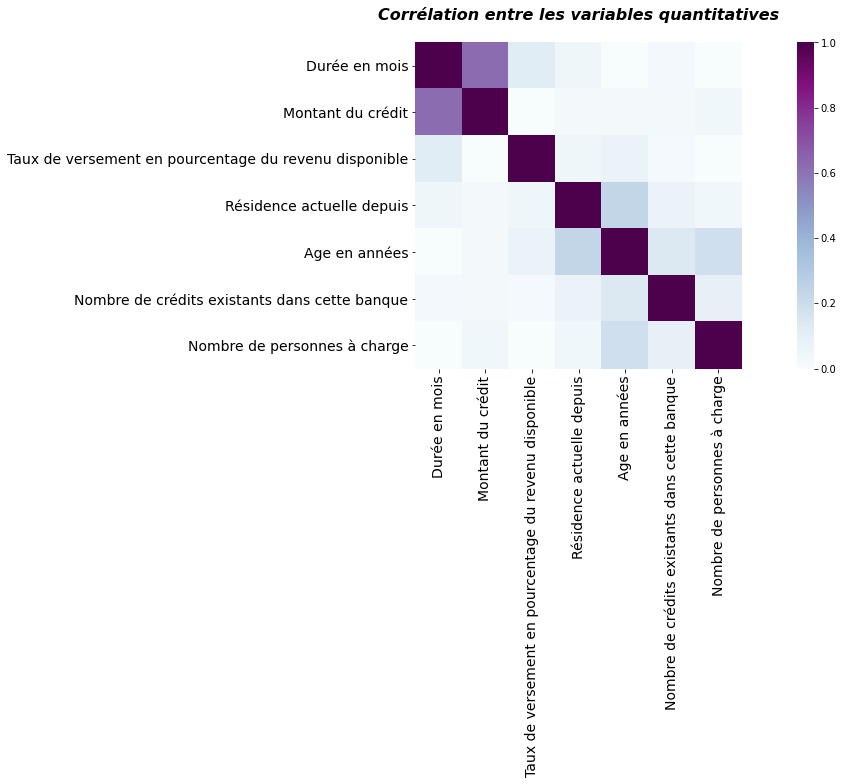

In [8]:
# Heat map pour visulaiser la corrélation entre les variables quantitatives selon l'indice de Spearman
group_names=["Durée en mois","Montant du crédit","Taux de versement en pourcentage du revenu disponible","Résidence actuelle depuis","Age en années","Nombre de crédits existants dans cette banque","Nombre de personnes à charge"]
fig = plt.figure(figsize=(20,6)) # Créer la figure 
ax0 = fig.add_subplot(1, 1, 1) # ajouter subplot 1 (1 ligne, 1 colonne)
sns.heatmap(corrmatsp,square=True,cmap="BuPu",ax=ax0,vmin=0.0, vmax=1.0)
ax0.set_xticklabels(group_names, fontsize = 14)
ax0.set_yticklabels(group_names, fontsize = 14)
ax0.set_title("Corrélation entre les variables quantitatives",fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)

Nous constatons que la plupart des variables ne sont pas corrélées entre elles à l'exception des deux variables **"Montant du crédit"** et **"Durée en mois"**. Nous allons donc par la suite, dans la partie **Ingénierie des variables**, éliminer l'une des deux pour éviter la multicolinéarité.

###### Mesure de la corrélation avec l'indice de Cramer's V pour les variables qualitatives

In [9]:
# Fonction qui calcule le coefficient de Cramer's V
def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Construction des tables croisées
    chi2 = stats.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1) 
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Matrices des corrélation des variables  qualitatives - Test de Cramer's V
rows= []
df_cat=pd.DataFrame(df[["Statut du compte courant existant", "Historique de crédit", "Objectif", "Compte d'épargne", "Emploi actuel depuis", "Statut personnel et sexe", "Autres débiteurs", "Propriété", "Autres plans de versement", "Logement", "Travail", "Téléphone", "Travailleur étranger"]]) # Dataframe contenant que les variables qualitatives

for var1 in df_cat:
    col = []
    for var2 in df_cat:
        cramers =cramers_V(df_cat[var1], df_cat[var2]) # Test de Cramer's V
        col.append(round(cramers,2)) # Arrondir la valeur du test de Cramer's V  
    rows.append(col)
  
    cramers_results = np.array(rows)
corrmatcat = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)
corrmatcat

Statut du compte courant existant  \
Statut du compte courant existant                               1.00   
Historique de crédit                                            0.13   
Objectif                                                        0.12   
Compte d'épargne                                                0.16   
Emploi actuel depuis                                            0.07   
Statut personnel et sexe                                        0.04   
Autres débiteurs                                                0.09   
Propriété                                                       0.05   
Autres plans de versement                                       0.00   
Logement                                                        0.08   
Travail                                                         0.05   
Téléphone                                                       0.06   
Travailleur étranger                                            0.06   

                                   Historique de crédit  Objectif  \
Statut du compte courant existant                  0.13      0.12   
Historique de crédit                               1.00      0.14   
Objectif                                           0.14      1.00   
Compte d'épargne                                   0.03      0.06   
Emploi actuel depuis                               0.08      0.08   
Statut personnel et sexe                           0.07      0.12   
Autres débiteurs                                   0.06      0.14   
Propriété                                          0.05      0.18   
Autres plans de versement                          0.21      0.11   
Logement                                           0.07      0.19   
Travail                                            0.01      0.18   
Téléphone                                          0.03      0.20   
Travailleur étranger                               0.03      0.14   

                                   Compte d'épargne  Emploi actuel depuis  \
Statut du compte courant existant              0.16                  0.07   
Historique de crédit                           0.03                  0.08   
Objectif                                       0.06                  0.08   
Compte d'épargne                               1.00                  0.06   
Emploi actuel depuis                           0.06                  1.00   
Statut personnel et sexe                       0.00                  0.15   
Autres débiteurs                               0.07                  0.05   
Propriété                                      0.05                  0.13   
Autres plans de versement                      0.00                  0.03   
Logement                                       0.00                  0.16   
Travail                                        0.02                  0.31   
Téléphone                                      0.07                  0.14   
Travailleur étranger                           0.00                  0.05   

                                   Statut personnel et sexe  Autres débiteurs  \
Statut du compte courant existant                      0.04              0.09   
Historique de crédit                                   0.07              0.06   
Objectif                                               0.12              0.14   
Compte d'épargne                                       0.00              0.07   
Emploi actuel depuis                                   0.15              0.05   
Statut personnel et sexe                               1.00              0.00   
Autres débiteurs                                       0.00              1.00   
Propriété                                              0.11              0.13   
Autres plans de versement                              0.02              0.04   
Logement                                               0.19              0.04   
Travail                                                0.05              0.06   
Téléphon

Text(0.5, 1.05, 'Corrélation entre les variables qualitatives')

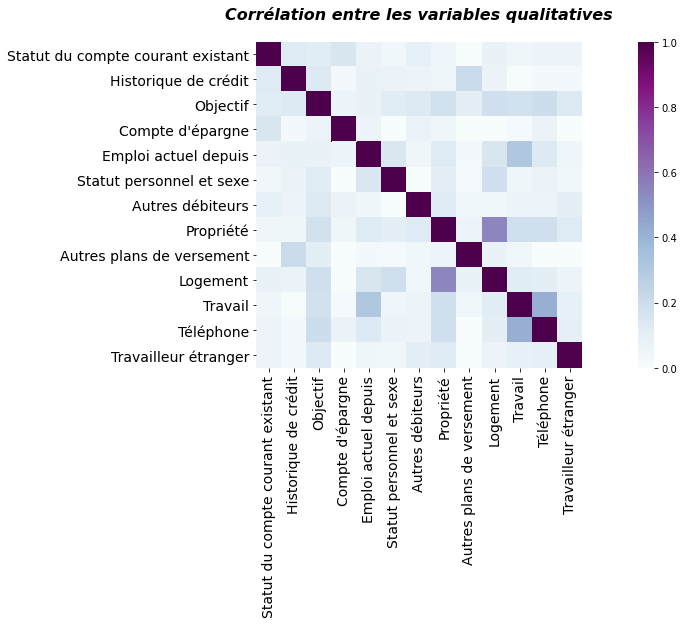

In [10]:
# Heat map pour visulaiser la corrélation entre les variables qualitatives selon l'indice de Cramer's V
group_names=["Statut du compte courant existant", "Historique de crédit", "Objectif", "Compte d'épargne", "Emploi actuel depuis", "Statut personnel et sexe", "Autres débiteurs", "Propriété", "Autres plans de versement", "Logement", "Travail", "Téléphone", "Travailleur étranger"]
fig = plt.figure(figsize=(20,6)) # Créer la figure 
ax0 = fig.add_subplot(1, 1, 1) # ajouter subplot 1 (1 ligne, 1 colonne)
sns.heatmap(corrmatcat,square=True,cmap="BuPu",ax=ax0,vmin=0.0, vmax=1.0)
ax0.set_xticklabels(group_names, fontsize = 14)
ax0.set_yticklabels(group_names, fontsize = 14)
ax0.set_title("Corrélation entre les variables qualitatives",fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)

Pareillement aux variables quantitatives, presque toutes les variables qualitatives ne sont pas corrélées entre elles. Nous remarquons par contre une sorte de corrélation entre les deux variables **"Logement"** et **"Propriété"** mais le coefficient de corrélation ne dépasse pas **0.55**. En cas de doute que la présence des deux variables à la fois dans le modèle peut causer une multicolinéarité, nous pouvons éliminer l'une des deux.

### Visualisation des données <a class="anchor" id="viz"></a>

Dans cette partie, nous choisirons quelques variables à visualiser dans le but d'avoir une meilleure vue sur la nature et la distribution des données. Cela nous sera utile au cours de l'étape de l'**ingénierie des variables**. Nous n'avons pas effectué une analyse univariée pour les variables quantitatitves vu que la nature des catégories est inconnue chose qui rend l'interprétation impossible.

#### Analyse univariée <a class="anchor" id="ua"></a>

Text(0.5, 1.05, 'Répartition des clients en fonction de leur solvabilité')

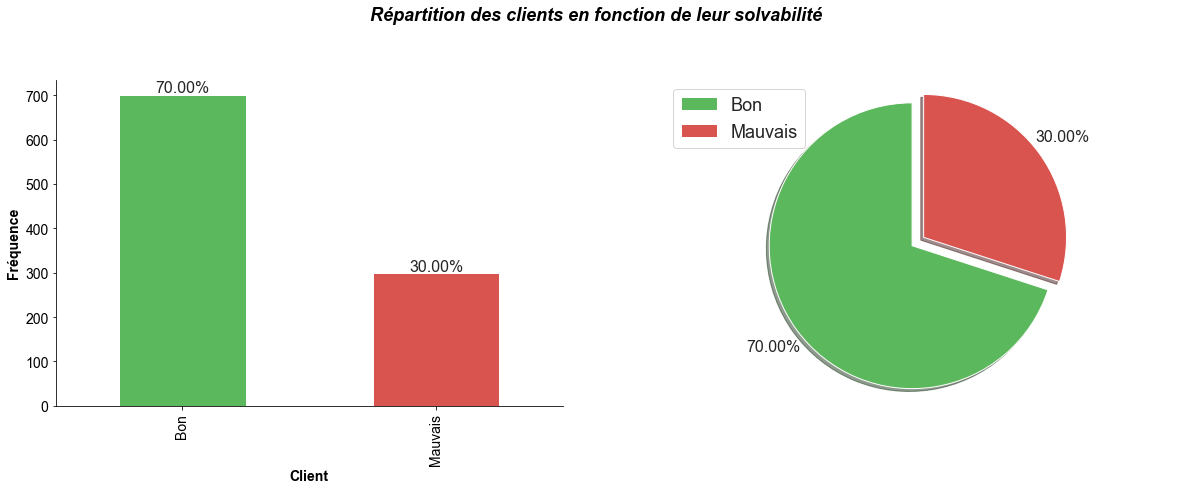

In [11]:
# Visualisation des données
# Etude univariée

fig = plt.figure() # Créer une figure

ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 colonnes, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # ajouter subplot 2 (1 ligne, 2 colonnes, 2ème plot)
colors_list =["#5cb85c", "#d9534f"]
group_names=["Bon", "Mauvais"]

# Subplot 1: Bar plot
sns.set_style('ticks') # Arrière plan blanc
df["Scoring"].value_counts().plot(kind='bar', figsize=(20, 6), ax=ax0, color=colors_list)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
ax0.set_xlabel("Client",fontsize=14,fontweight='bold')
ax0.set_xticklabels(group_names,fontsize=14)
ax0.tick_params(axis='y',labelsize=14)
ax0.set_ylabel("Fréquence",fontsize=14,fontweight='bold')
# Afficher les pourcentages au sommet des bars
total = len(df['Scoring'])
for p in ax0.patches:
    width = p.get_width()/total
    height = p.get_height()/total
    x=p.get_x() + p.get_width()/2
    y=p.get_y() + p.get_height()*1.01
    ax0.annotate(f'{height:.2%}', (x, y), ha='center', fontsize=16)
    
# Subplot 2: Pie plot
explode_list = [0, 0.1]
df["Scoring"].value_counts().plot(kind='pie',figsize=(20, 6),autopct='%1.2f%%', startangle=90, shadow=True, labels=None, colors=colors_list, fontsize=16, ylabel="", pctdistance=1.2, explode=explode_list, ax=ax1)
plt.axis('equal') # Pour la forme d'un cercle 
plt.legend(labels=group_names, loc='upper left',fontsize=18) 

fig.suptitle("Répartition des clients en fonction de leur solvabilité",fontsize=18,fontweight='bold',color='black',fontstyle='italic',y=1.05)

Nous constatons que la répartition des classes de la variable ***Target*** est deséquilibrée. Etant donné qu'il est préférable de garder une quantité équilibrée des données entre les deux classes, le fait de passer immédiatement à l'implémentation des modèles risque de dégrader la performance des algorithmes. Afin de remédier à ce problème, nous verrons par la suite quelques techniques d'échantillonage qui nous permettront d'équilibrer la base de données.

Text(0.5, 0.98, 'Distribution de la durée du crédit en mois')

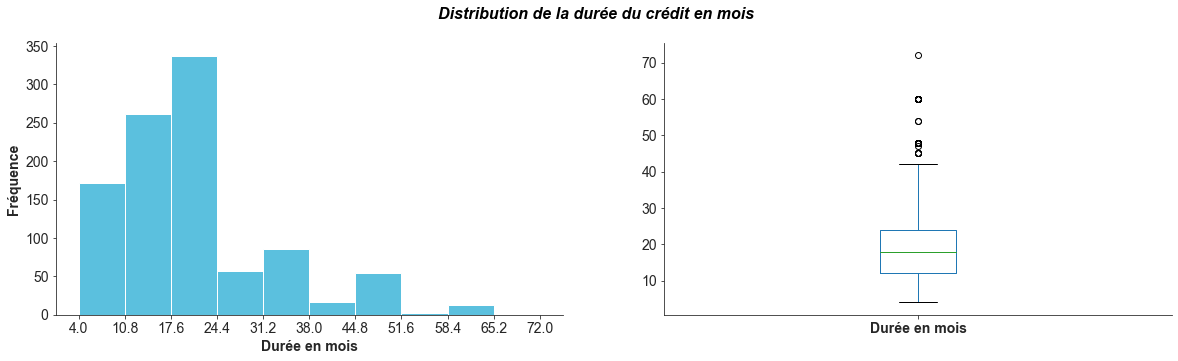

In [12]:
fig = plt.figure() # Créer une figure
ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 colonnes, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # ajouter subplot 2 (1 ligne, 2 colonnes, 2ème plot)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut

# Subplot 1: Histogram plot
count, bin_edges = np.histogram(df['Durée en mois'])
xmin = bin_edges[0]  - 1  #  Rapprocher le premier bin au 0
df['Durée en mois'].plot(kind='hist', figsize=(20, 5), xticks=bin_edges,ax=ax0,color="#5bc0de")
ax0.set_xlabel("Durée en mois",fontsize=14,fontweight='bold')
ax0.tick_params(axis='x',labelsize=14)
ax0.tick_params(axis='y',labelsize=14)
ax0.set_ylabel("Fréquence",fontsize=14,fontweight='bold')

# Subplot 2: Box plot
group_names=["Durée en mois"]
df['Durée en mois'].plot(kind='box', figsize=(20, 5),ax=ax1)
ax1.tick_params(axis='y',labelsize=14)
ax1.set_xticklabels(group_names,fontsize=14,fontweight='bold')

fig.suptitle("Distribution de la durée du crédit en mois",fontsize=16,fontweight='bold',fontstyle='italic',color='black')

Nous pouvons remarquer que la variable **"Durée en mois"** ne suit pas la loi normale. Nous remarquons également sur la boîte de moustache la présence de quelques valeurs aberrantes.

Text(0.5, 0.98, 'Distribution du montant du crédit')

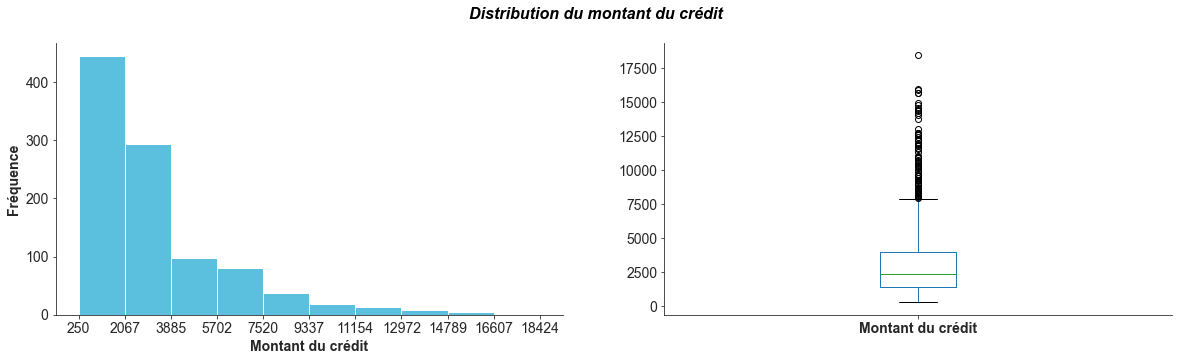

In [13]:
fig = plt.figure() # Créer une figure
ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 colonnes, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # ajouter subplot 2 (1 ligne, 2 colonnes, 2ème plot)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut

# Subplot 1: Histogram plot
count, bin_edges = np.histogram(df['Montant du crédit'])
xmin = bin_edges[0]  - 1  #  Rapprocher le premier bin au 0
df['Montant du crédit'].plot(kind='hist', figsize=(20, 5), xticks=bin_edges,ax=ax0,color="#5bc0de")
ax0.set_xlabel("Montant du crédit",fontsize=14,fontweight='bold')
ax0.tick_params(axis='x',labelsize=14)
ax0.tick_params(axis='y',labelsize=14)
ax0.set_ylabel("Fréquence",fontsize=14,fontweight='bold')

# Subplot 2: Box plot
group_names=["Montant du crédit"]
df['Montant du crédit'].plot(kind='box', figsize=(20, 5),ax=ax1)
ax1.tick_params(axis='y',labelsize=14)
ax1.set_xticklabels(group_names,fontsize=14,fontweight='bold')

fig.suptitle("Distribution du montant du crédit",fontsize=16,fontweight='bold',fontstyle='italic',color='black')


Nous constatons que la variable **"Montant du crédit"** contient beaucoup de points aberrants. L'histogramme montre également que ladite variable n'est pas distribuée suivant une loi gaussienne

Text(0.5, 0.98, "Distribution de l'age des clients")

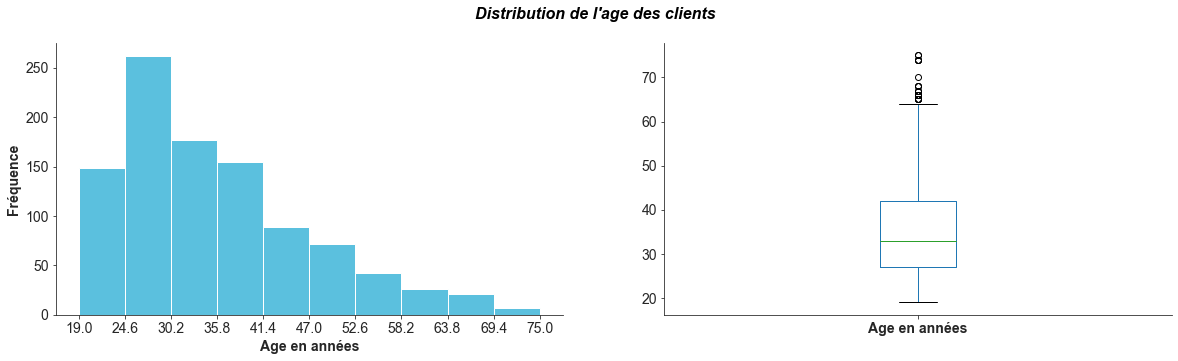

In [14]:
fig = plt.figure() # Créer une figure
ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 colonnes, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # ajouter subplot 2 (1 ligne, 2 colonnes, 2ème plot)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut

# Subplot 1: Histogram plot
count, bin_edges = np.histogram(df['Age en années'])
xmin = bin_edges[0]  - 1  #  Rapprocher le premier bin au 0
df['Age en années'].plot(kind='hist', figsize=(20, 5), xticks=bin_edges,ax=ax0,color="#5bc0de")
ax0.set_xlabel("Age en années",fontsize=14,fontweight='bold')
ax0.tick_params(axis='x',labelsize=14)
ax0.tick_params(axis='y',labelsize=14)
ax0.set_ylabel("Fréquence",fontsize=14,fontweight='bold')

# Subplot 2: Box plot
group_names=["Age en années"]
df['Age en années'].plot(kind='box', figsize=(20, 5),ax=ax1)
ax1.tick_params(axis='y',labelsize=14)
ax1.set_xticklabels(group_names,fontsize=14,fontweight='bold')

fig.suptitle("Distribution de l'age des clients",fontsize=16,fontweight='bold',fontstyle='italic',color='black')

Concernant la variable **"Age en années"**, la distribution est proche d'une distribution normale avec un petit décalage à gauche. Nous remarquons aussi, à travers la boîte à moustache, la présence de quelques valeurs aberrantes mais qui ne sont pas nombreuses.  

#### Analyse bivariée <a class="anchor" id="ba"></a>

Text(0.5, 1.05, 'Visualisation des variables quantitatives')

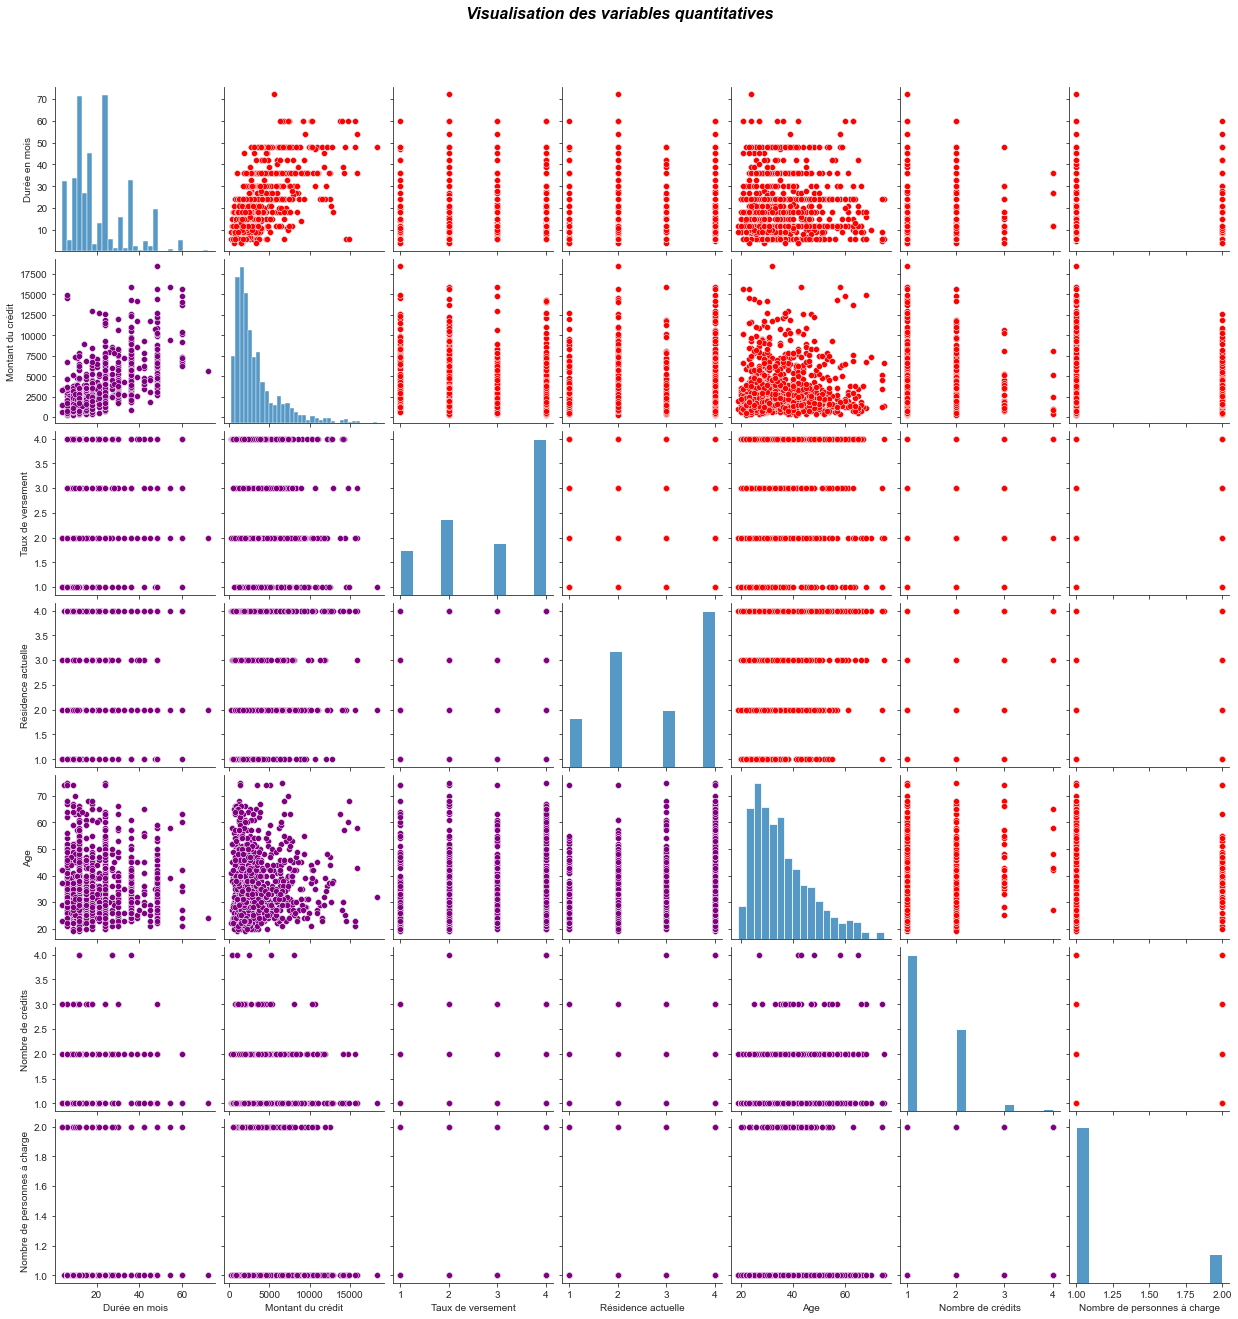

In [15]:
# Etude bivariée
df_cont = pd.DataFrame(df[["Durée en mois","Montant du crédit","Taux de versement en pourcentage du revenu disponible","Résidence actuelle depuis","Age en années","Nombre de crédits existants dans cette banque","Nombre de personnes à charge"]]) # Créer une Data Frame des variables continues
group_names=["Durée en mois","Montant du crédit","Taux de versement","Résidence actuelle","Age","Nombre de crédits","Nombre de personnes à charge"]
df_cont.columns=group_names
ax=sns.pairplot(df_cont)
ax.map_upper(sns.scatterplot,color='red')
ax.map_lower(sns.scatterplot, color='purple')
ax.fig.suptitle("Visualisation des variables quantitatives",fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)

Nous pouvons tirer deux informations principales de ce graphique. Les variables quantitatives ne sont pas distribuées selon une loi gaussienne, cela est clair en se basant sur la forme des histogrammes. Une deuxième information est la confirmation des résultats obtenus à l'aide du coefficient de corrélation de **"Spearman"** puisqu'on peut voir clairement sur les nuages des points que les variables ne sont pas corrélées entre elles à l'exception des variables **"Durée en mois"** et **"Montant du crédit"**.

### Ingénierie des variables <a class="anchor" id="fe"></a>

Avant d'utiliser les méthodes de séléction des variables, nous devons coder les variables quantitatives afin qu'elles puissent être acceptées par les algorithmes du ***Feature Selection***. Nous choisissons pour cela le ***Label Encoding***. Nous rappelons que nous avons déjà éliminer les deux variables **"Durée en mois"** et **"Propriété"** en raison de multicolinéarité.

In [16]:
# Dataframe contenant les variables qualitatives encodée selon le Label Encoding
df_catg = df_cat.apply(LabelEncoder().fit_transform)
# Data Frame contenant les variables continues
df_cont = df.drop(["Durée en mois", "Statut du compte courant existant", "Historique de crédit", "Objectif", "Compte d'épargne", "Emploi actuel depuis", "Statut personnel et sexe", "Autres débiteurs", "Propriété", "Autres plans de versement", "Logement", "Travail", "Téléphone", "Travailleur étranger", "Scoring"],axis=1) 
# Concaténation des deux dataframes
frames = [df_catg.drop(["Propriété"], axis=1), df_cont]
# Concaténation des deux dataframes
X = pd.concat(frames,axis=1)
Y = df["Scoring"]
# Apperçu de X
X.head()

Statut du compte courant existant  Historique de crédit  Objectif  \
0                                  0                     4         4   
1                                  1                     2         4   
2                                  3                     4         7   
3                                  0                     2         3   
4                                  0                     3         0   

   Compte d'épargne  Emploi actuel depuis  Statut personnel et sexe  \
0                 4                     4                         2   
1                 0                     2                         1   
2                 0                     3                         2   
3                 0                     3                         2   
4                 0                     2                         2   

   Autres débiteurs  Autres plans de versement  Logement  Travail  Téléphone  \
0                 0                          2         1        2          1   
1                 0                          2         1        2          0   
2                 0                          2         1        1          0   
3                 2                          2         2        2          0   
4                 0                          2         2        2          0   

   Travailleur étranger  Montant du crédit  \
0                     0               1169   
1                     0               5951   
2                     0               2096   
3                     0               7882   
4                     0               4870   

   Taux de versement en pourcentage du revenu disponible  \
0                                                  4       
1                                                  2       
2                                                  2       
3                                                  2       
4                                                  3       

   Résidence actuelle depuis  Age en années  \
0                          4             67   
1                          2             22   
2                          3             49   
3                          4             45   
4                          4             53   

   Nombre de crédits existants dans cette banque  Nombre de personnes à charge  
0                                              2                             1  
1                                              1                             1  
2                                              1                             2  
3                                              1                             2  
4                                              2                             2

In [17]:
# Sequential Backward Selection
Estimator = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 0, penalty = "l2")
sfsb = sfs(Estimator, k_features = (1, 18), forward = False, floating = False, scoring = 'f1', cv = 10, n_jobs = 5)
sfsb = sfsb.fit(X, Y)

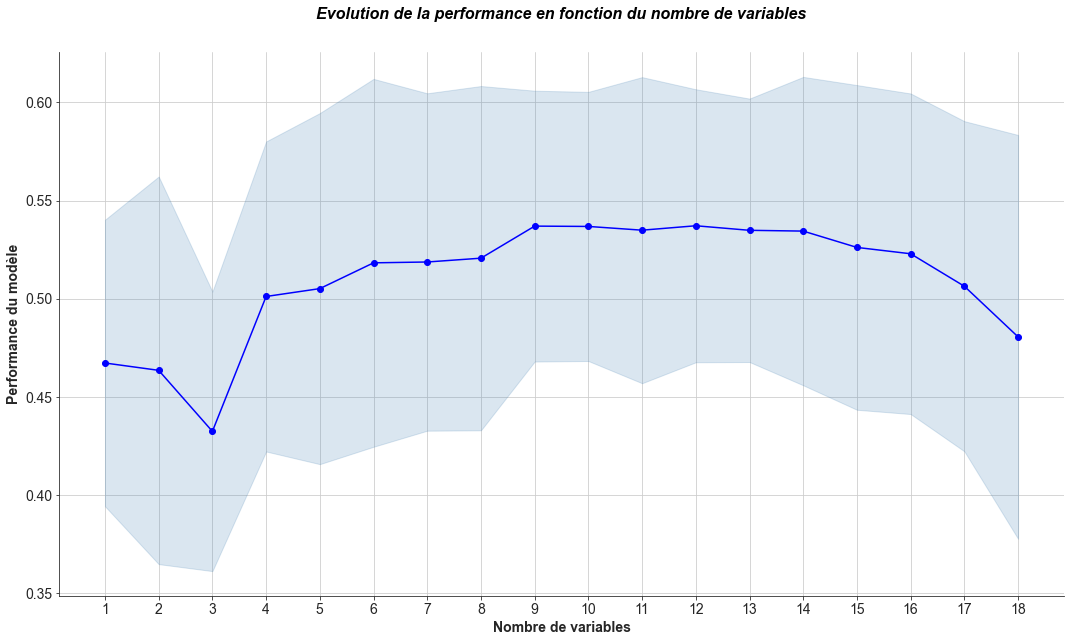

In [18]:
# Afficher l'évolution de la performance en fonction du nombre de variables
fig1 = plot_sfs(sfsb.get_metric_dict(), figsize=(18,10))
sns.despine() # Eliminer les bordures à droite et en haut
plt.xlabel("Nombre de variables",fontsize=14,fontweight='bold')
plt.ylabel("Performance du modèle",fontsize=14,fontweight='bold')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.title('Evolution de la performance en fonction du nombre de variables',fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)
plt.grid()

Ce graphe décrit l'évolution de la performance du modèle en fonction du nombre de variables, nous pouvons déjà remarquer que la courbe est d'allure maximale pour un nombre de variables égale à **12**. Nous allons par la suite récupérer les noms de ces 12 variables afin de mettre à jour la base de données qui sera utilisée pour l'implémentation des modèles.

In [19]:
# Récupérer les variables à sélectionner
sfsb.k_feature_names_

('Statut du compte courant existant',
 'Historique de crédit',
 "Compte d'épargne",
 'Emploi actuel depuis',
 'Autres débiteurs',
 'Téléphone',
 'Travailleur étranger',
 'Montant du crédit',
 'Taux de versement en pourcentage du revenu disponible',
 'Résidence actuelle depuis',
 'Age en années',
 'Nombre de crédits existants dans cette banque')

Après avoir dégager la séléction optimale des variables, nous pouvons maintenant passer à l'implémentation des modèles avec ce nouveau ensemble de données.

### Implémentation des modèles Machine Learning <a class="anchor" id="ml"></a>

Avant d'entammer l'étape de la construction des modèles, il faut effectuer quelques traitements sur les données afin qu'elles soient compatibles avec ce qui reste à faire. Nous allons dans un premier lieu effectuer une division des données en des données d'apprentissage et des données de test. Ensuite nous allons équilibrer la base de données à l'aide des techniques d'échantillonage que nous verrons en détails. Enfin nous allons coder les variables qualitatives en des ***dummy variables*** pour qu'ils deviennet une input valide aux algorithmes du Machine Learning.

###### Division des données

Nous avons décidé de consacrer **20%** des données pour le test et **80%** pour la phase d'apprentissage.

In [20]:
# Création d'une nouvelle dataframe qui contient la combinaison optimale des variables
X_fs = pd.DataFrame(df[['Statut du compte courant existant', 'Historique de crédit',"Compte d'épargne", 'Emploi actuel depuis', 'Autres débiteurs', 'Téléphone', 'Travailleur étranger', 'Montant du crédit', 'Taux de versement en pourcentage du revenu disponible', 'Résidence actuelle depuis', 'Age en années', 'Nombre de crédits existants dans cette banque']])
# Division des données
X_train, X_test, Y_train, Y_test = train_test_split(X_fs, Y, test_size = 0.2, random_state = 0, shuffle = True)

###### Equilibrage de la base de données

Nous avons cité au début de ce projet, lors de la visualisation graphique de la variable ***Target***, au niveau de l’analyse univariée, que la base de données dont nous disposons est non équilibrée. La classe **"Bon client"** présente **70%** de la
variable *Target* tandis que la classe **"Mauvais client"** n’occupe que **30%**. La construction du modèle de ML sans remédier à ce problème nous mènera à des résultats médiocres.
Pour remédier à ce problème, deux types d’approches existent. Les techniques de **sur-échantillonnage** et celles de
**sous-échantillonnage**. Les techniques de sous-échantillonnage reposent sur le fait d’éliminer les observations de la classe majoritaire jusqu’à l’obtention d’une base de données équilibrée. Alors que, les techniques de sur-échantillonnage fassent le
contraire. Nous ajoutons des observations de la classe minoritaire jusqu’à l’obtention d’une variable *Target* équilibrée au niveau de ses catégories. La technique de sur-échantillonnage est généralement préférée à celle du sous-échantillonnage du
fait que rien ne nous garantit qu’en éliminant les observations, nous ne perdons pas l’information. Cela n’est pas le cas pour le sur-échantillonnage puisque l’ajout de nouvelles observations à la base de celles qui existent dans la base de données ne peut, en aucun cas, causer une perte d’informations. Dans notre cas, nous allons opter à un algorithme de sur-échantillonnage appelé **SMOTENC**.

<div class="alert alert-block alert-danger">
<b>Important:</b> Il est très important de noter, à ce niveau, que le SMOTE ne s’applique qu’aux données d’apprentissage. Il est strictement interdit de l’appliquer aux données de test car nous allons obtenir une performance erronée. Donc, il est important d’équilibrer les données d’apprentissage pour assurer la bonne construction de notre modèle et la possibilité, donc, de pouvoir le généraliser sur d'autres données externes. Cependant, les données de test doivent rester non équilibrées afin de tester la vraie performance dudit modèle.</div>

In [21]:
# Fonction pour former une liste contenant les indices des variables qualitatives dans la base de données
def count_col_ind():
    L=[]
    for i in range(0, len(X_fs.columns)):
        if X_fs.iloc[:, i].dtypes == 'O':
            L.append(i)
    return L
# Application du SMOTENC
X_train, Y_train = SMOTENC(count_col_ind(), sampling_strategy = 'auto', random_state = 0, k_neighbors = 10, n_jobs = 5).fit_sample(X_train, Y_train)

###### Codage dummy des variables  qualitatives

Vu que la plupart des algorithmes du Machine Learning ne savent traiter que les chiffres, il est nécessaire d'effectuer une transformation de notre base de données actuelle pour que les variables soient compatibles avec l'entrée du modèle. C'est pour cela que nous allons procéder à un encodage des variables qualitatives. En fait, il existe plusieurs méthodes d'encodage mais nous avons préféré la méthode **"Dummy Encoding"** car elle permet d'éviter le piège de multicolinéarité en produisant n-1 variables pour n catégories.

In [22]:
# Codage en n-1 variables
X_train = pd.DataFrame(pd.get_dummies(X_train, drop_first=True))
X_test = pd.DataFrame(pd.get_dummies(X_test, drop_first=True))
# Apperçu des données après l'encodage
X_train.head()

Montant du crédit  Taux de versement en pourcentage du revenu disponible  \
0               2862                                                  4       
1               3123                                                  4       
2               7408                                                  4       
3               1264                                                  2       
4               1554                                                  1       

   Résidence actuelle depuis  Age en années  \
0                          3             30   
1                          1             27   
2                          2             24   
3                          2             25   
4                          2             24   

   Nombre de crédits existants dans cette banque  \
0                                              1   
1                                              1   
2                                              1   
3                                              1   
4                                              2   

   Statut du compte courant existant_A12  \
0                                      1   
1                                      0   
2                                      1   
3                                      1   
4                                      0   

   Statut du compte courant existant_A13  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Statut du compte courant existant_A14  Historique de crédit_A31  \
0                                      0                         0   
1                                      0                         0   
2                                      0                         0   
3                                      0                         1   
4                                      1                         0   

   Historique de crédit_A32  ...  Compte d'épargne_A64  Compte d'épargne_A65  \
0                         0  ...                     0                     0   
1                         1  ...                     0                     0   
2                         1  ...                     0                     0   
3                         0  ...                     0                     0   
4                         0  ...                     0                     0   

   Emploi actuel depuis_A72  Emploi actuel depuis_A73  \
0                         0                         0   
1                         1                         0   
2                         1                         0   
3                         0                         1   
4                         0                         0   

   Emploi actuel depuis_A74  Emploi actuel depuis_A75  Autres débiteurs_A102  \
0                         0                         1                      0   
1                         0                         0                      0   
2                         0                         0                      0   
3                         0                         0                      0   
4                         1                         0                      0   

   Autres débiteurs_A103  Téléphone_A192  Travailleur étranger_A202  
0                      0               0                          0  
1                      0               0                          0  
2                      0               0                          0  
3                      0               0                          0  
4                      0               1                          0  

[5 rows x 24 columns]

Après avoir bien préparér les données et sélectionner les variables qui seront utilisées par la suite, nous allons passer maintenant à l'implémentation de quelques modèles de *Machine Learning* qui serviront comme des prédicteurs automatiques de la variable *Target* qu'on cherche à prédir et qui caractérise le client de **Bon client** ou **Mauvais client**.
Les algorithmes qui seront implémentés dans cette partie sont :

- **Bayesien Naïf**
- **KNN**
- **LDA**
- **QDA**
- **Linear SVM**
- **Non linear SVM**,
- **Régression logistique**
- **CART**
- **Random Forest**
- **Gradient Boosting**
- **AdaBoost**
- **Extra Trees**

Pour chaque algorithme, nous allons: **normaliser** les données si nécessaire, afficher un **rapport de classification** contenant plusieurs métriques, tracer une **matrice de confusion** et finalement tracer une **courbe ROC** avec l'indice **AUC** relative à l'algorithme en question.

Nous allons vers la fin, dans une dernière partie, comparer les résultats des différents modèles et dicuter les améliorations possible dans le but de rendre notre modèle de *Scoring* plus performant.

In [82]:
# Fonction pour tracer la matrice de confusion
def plot_confusion_matrix(cm, classes, title, normalize=True, cmap=plt.cm.Blues, rounding = ".2%"):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]       
    plt.figure(figsize=(20,6))  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)    
    plt.title(title, fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05 )    
    plt.colorbar()    
    tick_marks = np.arange(len(classes))    
    plt.xticks(tick_marks, classes, rotation=45, fontsize=14)   
    plt.yticks(tick_marks, classes, fontsize=14)  
    fmt = rounding if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):       
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > 0.5 else "black", fontweight='bold', fontsize=14)    
    plt.tight_layout()    
    plt.ylabel('Vraie classe',fontsize=15,fontweight='bold')    
    plt.xlabel('Classe prédite',fontsize=15,fontweight='bold')
    
# Fonction pour tracer la courbe ROC
def plot_roc_curve(Y_test, Y_pred, title, label_name):
    ns_probs = [0 for _ in range(len(Y_test))]
    ns_auc = roc_auc_score(Y_test, ns_probs, multi_class)
    lr_auc = roc_auc_score(Y_test, Y_pred)
    # Calculer les parametres de la courbe
    ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, Y_pred)
    # Tracer la courbe
    plt.figure(figsize=(10,6))  
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    AUC=', AUC: '+str(lr_auc)
    sns.set_style('ticks') # Arrière plan blanc
    sns.despine() # Eliminer les bordures à droite et en haut
    plt.plot(lr_fpr, lr_tpr, marker='', label=label_name+AUC)
    plt.xlabel('Taux des faux positifs',fontsize=14,fontweight='bold')
    plt.ylabel('Taux des vrais positifs',fontsize=14,fontweight='bold')
    plt.xticks(fontsize=14)   
    plt.yticks(fontsize=14)
    plt.title(title,fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)
    plt.legend(fontsize=14)
    plt.show()
    
# Normaliser les données
X_train_norm = preprocessing.MinMaxScaler().fit(X_train).transform(X_train) 
X_test_norm = preprocessing.MinMaxScaler().fit(X_test).transform(X_test)  

###### Bayesien Naïf

                precision    recall  f1-score   support

Mauvais client       0.84      0.73      0.78       142
    Bon client       0.50      0.67      0.57        58

      accuracy                           0.71       200
     macro avg       0.67      0.70      0.68       200
  weighted avg       0.74      0.71      0.72       200



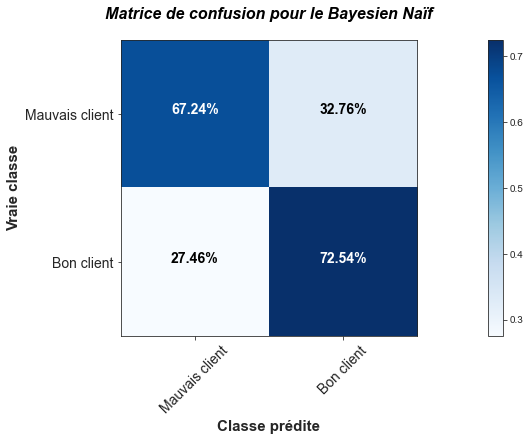

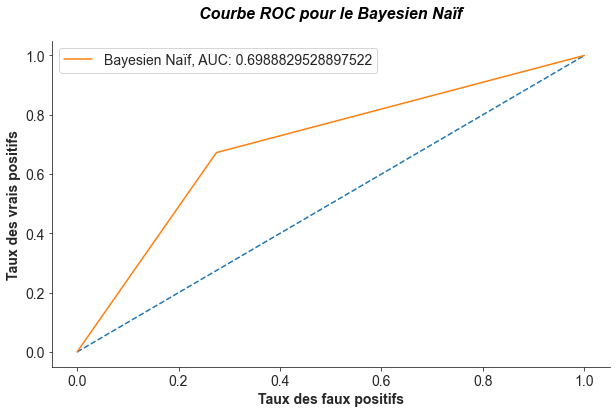

In [24]:
# Bayesien Naïf
model = ComplementNB(alpha=0.1)
model.fit(X_train_norm, Y_train)
Y_pred = model.predict(X_test_norm)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le Bayesien Naïf')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le Bayesien Naïf', label_name='Bayesien Naïf')
# Stocker les métriques
f1_NB = f1_score(Y_test, Y_pred)
acc_NB = accuracy_score(Y_test, Y_pred)
AUC_NB = roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_NB, Y_pred_NB = Y_test, Y_pred

###### KNN

                precision    recall  f1-score   support

Mauvais client       0.83      0.77      0.80       142
    Bon client       0.52      0.60      0.56        58

      accuracy                           0.73       200
     macro avg       0.67      0.69      0.68       200
  weighted avg       0.74      0.72      0.73       200



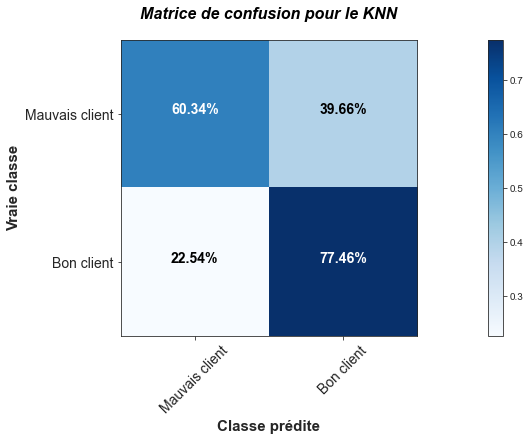

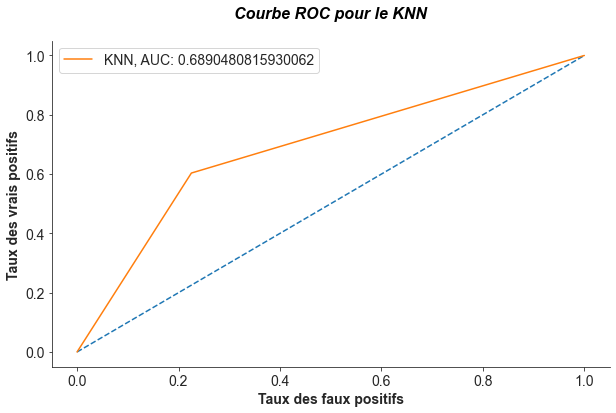

In [25]:
# KNN
model = KNeighborsClassifier(n_neighbors = 6, p=2, metric='minkowski', n_jobs=5)
model.fit(X_train_norm, Y_train)
Y_pred = model.predict(X_test_norm)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le KNN')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le KNN', label_name='KNN')
# Stocker les métriques
f1_KNN = f1_score(Y_test, Y_pred)
acc_KNN = accuracy_score(Y_test, Y_pred)
AUC_KNN = roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_KNN, Y_pred_KNN = Y_test, Y_pred

###### LDA

                precision    recall  f1-score   support

Mauvais client       0.83      0.73      0.78       142
    Bon client       0.49      0.62      0.55        58

      accuracy                           0.70       200
     macro avg       0.66      0.68      0.66       200
  weighted avg       0.73      0.70      0.71       200



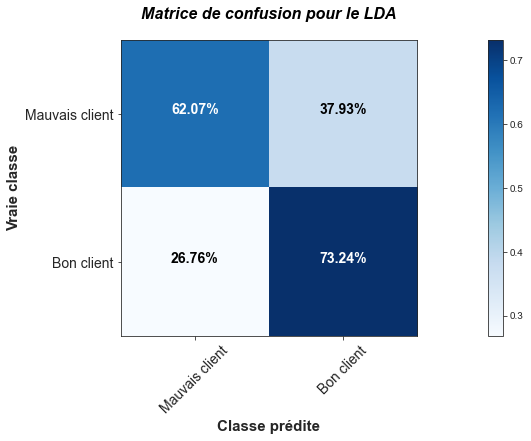

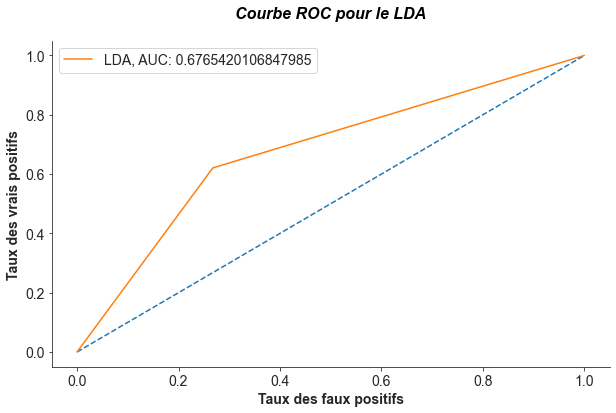

In [26]:
# LDA
while True:
    try:
        model = LDA(solver = "svd")
        model.fit(X_train_norm, Y_train)
        Y_pred = model.predict(X_test_norm)
        print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
        cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
        plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le LDA')
        plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour la LDA', label_name='LDA')
        # Stocker les métriques
        f1_LDA = f1_score(Y_test, Y_pred)
        acc_LDA = accuracy_score(Y_test, Y_pred)
        AUC_LDA = roc_auc_score(Y_test, Y_pred)
        # Stocker les résultats
        Y_test_LDA, Y_pred_LDA = Y_test, Y_pred
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### QDA

                precision    recall  f1-score   support

Mauvais client       0.81      0.68      0.74       142
    Bon client       0.44      0.62      0.51        58

      accuracy                           0.66       200
     macro avg       0.63      0.65      0.63       200
  weighted avg       0.70      0.66      0.67       200



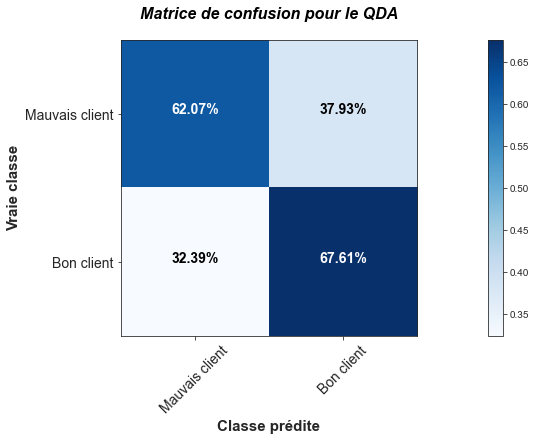

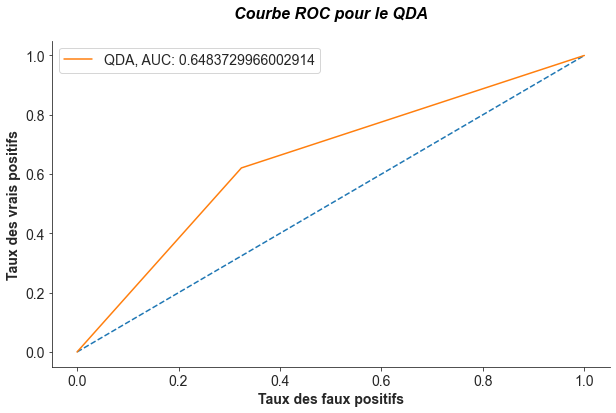

In [27]:
# QDA
while True:
    try:
        model = QDA()
        model.fit(X_train_norm, Y_train)
        Y_pred = model.predict(X_test_norm)
        print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
        cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
        plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le QDA')
        plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour la QDA', label_name='QDA')
        # Stocker les métriques
        f1_QDA = f1_score(Y_test, Y_pred)
        acc_QDA = accuracy_score(Y_test, Y_pred)
        AUC_QDA = roc_auc_score(Y_test, Y_pred)
        # Stocker les résultats
        Y_test_QDA, Y_pred_QDA = Y_test, Y_pred
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### SVM linéaire

                precision    recall  f1-score   support

Mauvais client       0.84      0.75      0.79       142
    Bon client       0.51      0.66      0.58        58

      accuracy                           0.72       200
     macro avg       0.68      0.70      0.68       200
  weighted avg       0.75      0.72      0.73       200



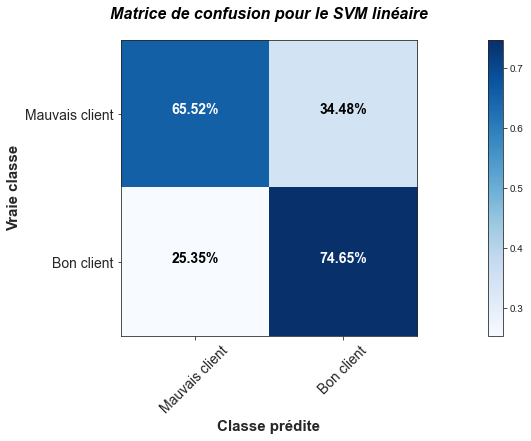

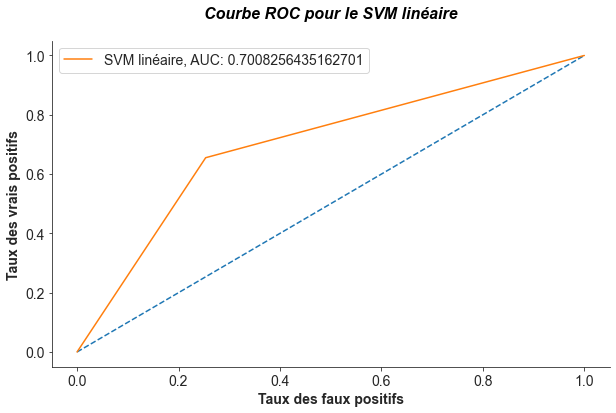

In [28]:
# SVM linéaire
model = svm.SVC(C = 0.1, kernel = 'rbf')
model.fit(X_train_norm, Y_train)
Y_pred = model.predict(X_test_norm)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le SVM linéaire')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le SVM linéaire', label_name='SVM linéaire')
# Stocker les métriques
f1_SVMLIN = f1_score(Y_test, Y_pred)
acc_SVMLIN = accuracy_score(Y_test, Y_pred)
AUC_SVMLIN = roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_SVMLIN, Y_pred_SVMLIN = Y_test, Y_pred

###### SVM non linéaire

                precision    recall  f1-score   support

Mauvais client       0.83      0.82      0.83       142
    Bon client       0.57      0.60      0.59        58

      accuracy                           0.76       200
     macro avg       0.70      0.71      0.71       200
  weighted avg       0.76      0.76      0.76       200



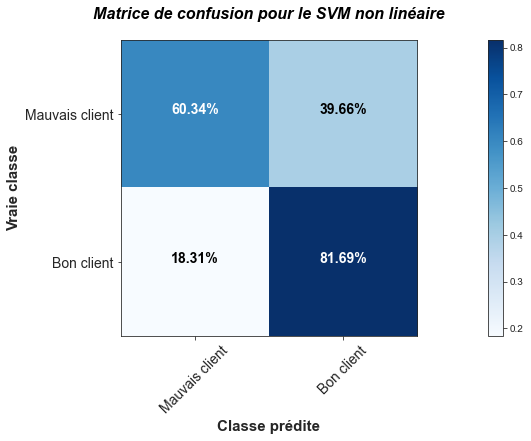

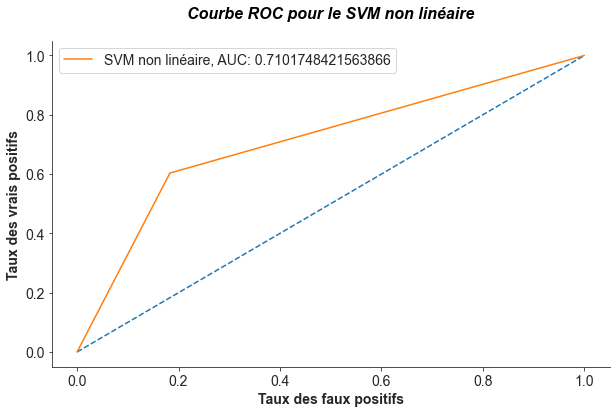

In [29]:
# SVM non linéaire
model = svm.NuSVC(kernel = 'rbf')
model.fit(X_train_norm, Y_train)
Y_pred = model.predict(X_test_norm)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le SVM non linéaire')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le SVM non linéaire', label_name='SVM non linéaire')
# Stocker les métriques
f1_SVMNLIN = f1_score(Y_test, Y_pred)
acc_SVMNLIN = accuracy_score(Y_test, Y_pred)
AUC_SVMNLIN = roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_SVMNLIN, Y_pred_SVMNLIN = Y_test, Y_pred

###### Régression logistique

                precision    recall  f1-score   support

Mauvais client       0.85      0.73      0.79       142
    Bon client       0.51      0.69      0.59        58

      accuracy                           0.72       200
     macro avg       0.68      0.71      0.69       200
  weighted avg       0.75      0.72      0.73       200



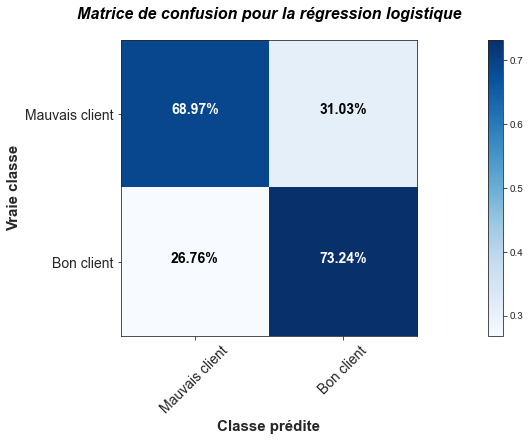

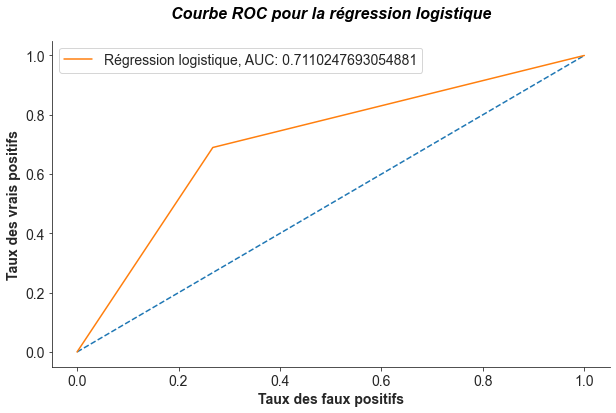

In [30]:
# Régression logistique
model = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 0, penalty = "l2")
model.fit(X_train_norm, Y_train)
Y_pred = model.predict(X_test_norm)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour la régression logistique')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour la régression logistique', label_name='Régression logistique')
# Stocker les métriques
f1_LR = f1_score(Y_test, Y_pred)
acc_LR = accuracy_score(Y_test, Y_pred)
AUC_LR = roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_LR, Y_pred_LR = Y_test, Y_pred

###### CART

                precision    recall  f1-score   support

Mauvais client       0.91      0.52      0.66       142
    Bon client       0.43      0.88      0.58        58

      accuracy                           0.62       200
     macro avg       0.67      0.70      0.62       200
  weighted avg       0.77      0.62      0.64       200



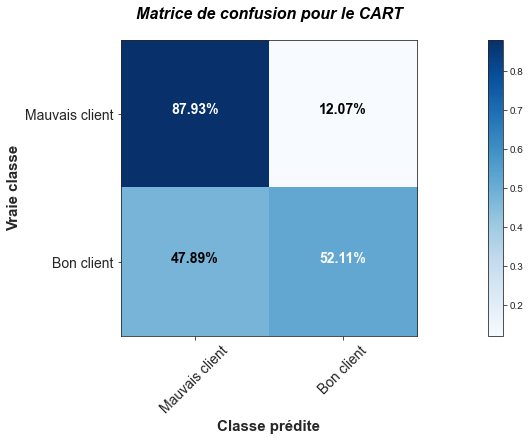

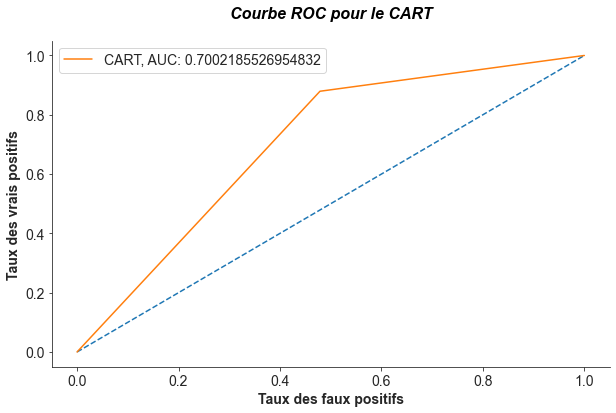

In [31]:
# CART
model = DecisionTreeClassifier(criterion="entropy", max_depth = 1, random_state = 0, splitter = "best", min_samples_split = 2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le CART')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le CART', label_name='CART')
# Stocker les métriques
f1_DT = f1_score(Y_test, Y_pred)
acc_DT = accuracy_score(Y_test, Y_pred)
AUC_DT= roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_CART, Y_pred_CART = Y_test, Y_pred

###### Random Forest

                precision    recall  f1-score   support

Mauvais client       0.88      0.71      0.79       142
    Bon client       0.52      0.76      0.62        58

      accuracy                           0.73       200
     macro avg       0.70      0.73      0.70       200
  weighted avg       0.77      0.72      0.74       200



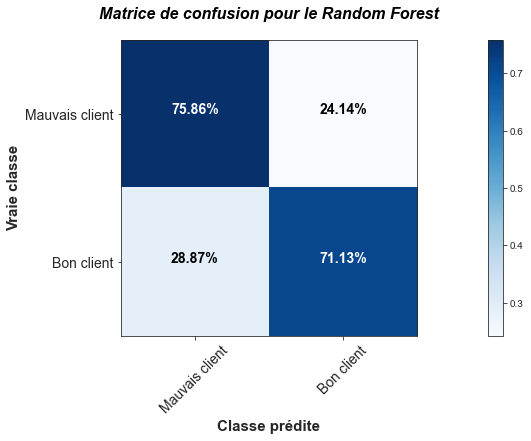

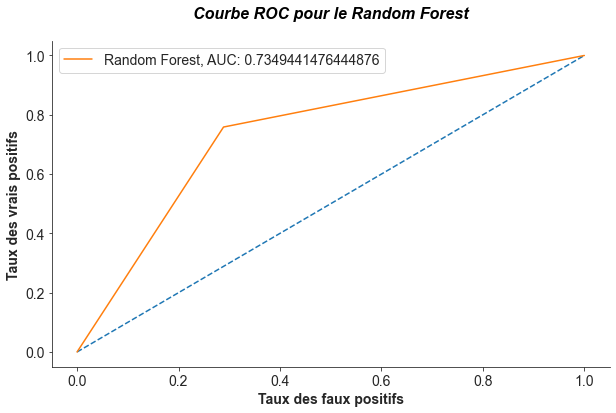

In [32]:
# Random Forest
model = RandomForestClassifier(criterion="entropy", n_estimators = 60, max_depth = 4, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le Random Forest')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le Random Forest', label_name='Random Forest')
# Stocker les métriques
f1_RF = f1_score(Y_test, Y_pred)
acc_RF = accuracy_score(Y_test, Y_pred)
AUC_RF= roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_RF, Y_pred_RF = Y_test, Y_pred

###### Gradient Boosting

                precision    recall  f1-score   support

Mauvais client       0.88      0.70      0.78       142
    Bon client       0.51      0.76      0.61        58

      accuracy                           0.72       200
     macro avg       0.69      0.73      0.70       200
  weighted avg       0.77      0.72      0.73       200



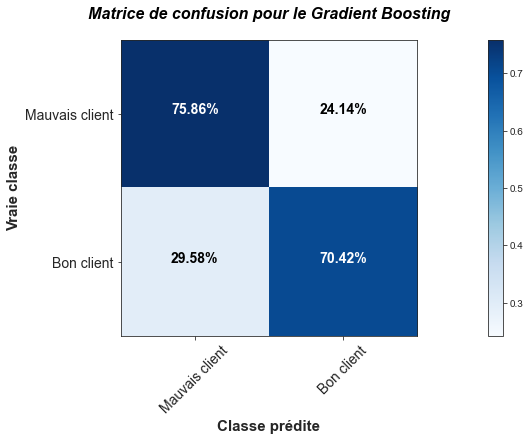

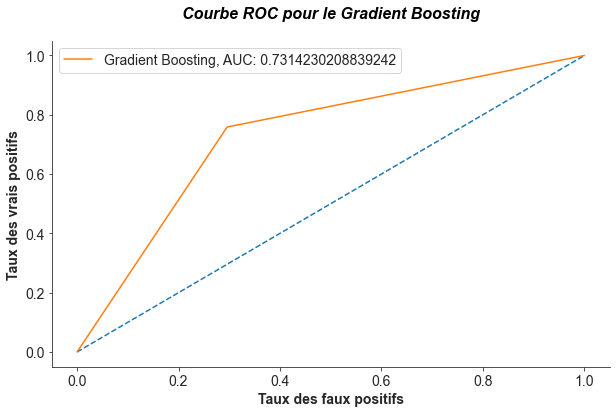

In [33]:
# Gradient Boosting
model = GradientBoostingClassifier(criterion="friedman_mse", n_estimators = 50, learning_rate = 0.1, max_depth = 1, random_state = 0, min_samples_split = 2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le Gradient Boosting')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le Gradient Boosting', label_name='Gradient Boosting')
# Stocker les métriques
f1_GB = f1_score(Y_test, Y_pred)
acc_GB = accuracy_score(Y_test, Y_pred)
AUC_GB= roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_GB, Y_pred_GB = Y_test, Y_pred

###### AdaBoost

                precision    recall  f1-score   support

Mauvais client       0.88      0.65      0.75       142
    Bon client       0.48      0.79      0.60        58

      accuracy                           0.69       200
     macro avg       0.68      0.72      0.67       200
  weighted avg       0.77      0.69      0.70       200



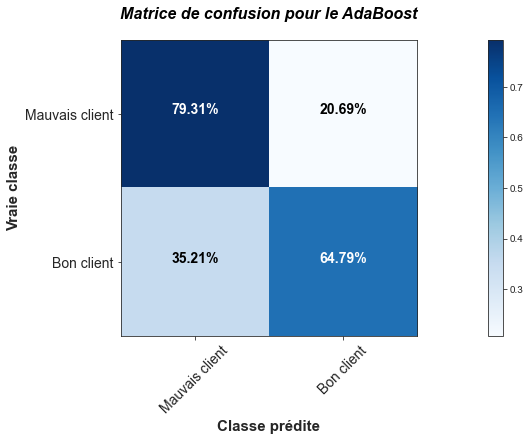

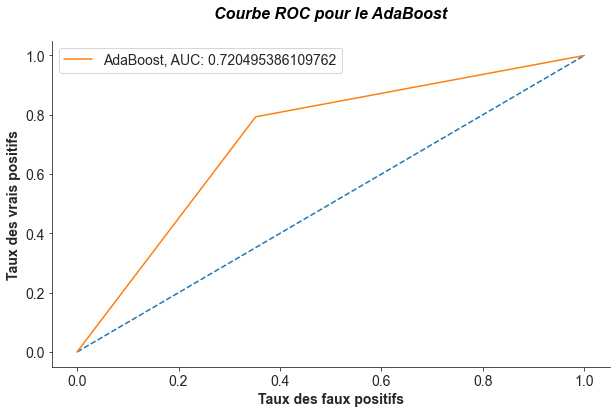

In [34]:
# AdaBoost
model = AdaBoostClassifier(n_estimators = 50 ,random_state = 0, learning_rate = 0.1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le AdaBoost')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le AdaBoost', label_name='AdaBoost')
# Stocker les métriques
f1_AB = f1_score(Y_test, Y_pred)
acc_AB = accuracy_score(Y_test, Y_pred)
AUC_AB= roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_AB, Y_pred_AB = Y_test, Y_pred

###### Extra Trees

                precision    recall  f1-score   support

Mauvais client       0.87      0.68      0.77       142
    Bon client       0.49      0.76      0.60        58

      accuracy                           0.70       200
     macro avg       0.68      0.72      0.68       200
  weighted avg       0.76      0.70      0.72       200



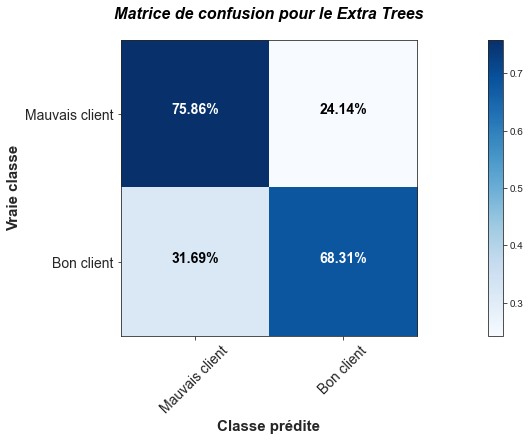

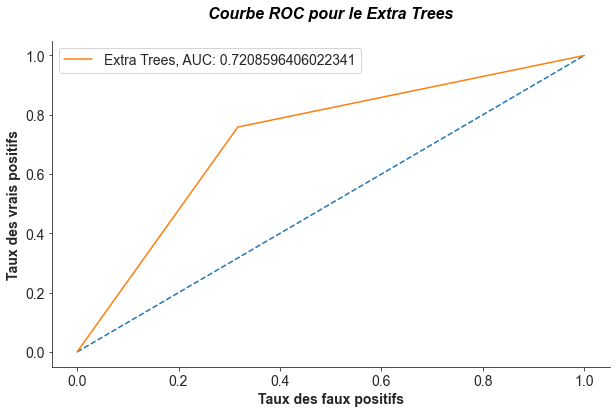

In [35]:
# Extra Trees
model = ExtraTreesClassifier(criterion="entropy", n_estimators = 100, max_depth = 1, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=["Bon client", "Mauvais client"]))
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Bon client', 'Mauvais client'], title='Matrice de confusion pour le Extra Trees')
plot_roc_curve(Y_test, Y_pred, title='Courbe ROC pour le Extra Trees', label_name='Extra Trees')
# Stocker les métriques
f1_ET = f1_score(Y_test, Y_pred)
acc_ET = accuracy_score(Y_test, Y_pred)
AUC_ET= roc_auc_score(Y_test, Y_pred)
# Stocker les résultats
Y_test_ET, Y_pred_ET = Y_test, Y_pred

### Comparaison et discussion <a class="anchor" id="eval"></a>

Cette partie sera consacrée à une comparaison globale entre les résultats fournis par les différents algorithmes implémentés et à la base de différentes métriques. Une partie spécifique à la discussion des différentes amélioration, qui peuvent être portées au modèle, sera également abordée.

###### Comparaison des résultats

La table ci-dessous contient les 3 métriques **F1-Score**, **AUC** et **Accuracy** pour tous les algorithmes que nous avons implémentés. Le choix des métriques est bien justifié et adapté au contexte de notre projet. Nous rappelons que nous disposons d'une base de données non équilibrée, les métriques les plus adéquates à ce genre de situations sont le **F1-Score** et la courbe **ROC**. Cela est dû au fait que ces métriques s'interessent à la précision et au rappel en même temps, nous savons bien que la maximisation de la précision engendre la minimisation des faux positifs alors que la maximisation du rappel engendre la minimisation des faux négatifs. Par contre, Le F1-Score combine le rappel et la précision et essaye de garder un certain équilibre entre les deux, c'est donc une métrique parfaite surtout si nous nous intéressons par les deux classes avec le même degré d'importance. Ca nous permet d'avoir une vue globale sur la précision et le rappel en même temps. La courbe ROC est aussi un bon moyen d'évaluer la classification déséquilibrée, c'est une courbe des vrais positifs en fonction des faux positifs. la courbe est accompagnée par un *score* AUC qui est égal à 0.5 pour une mauvaise classification et 1 pour une classification parfaite. Cela se caractérise géométriquement par la première bisectrice qui est équivalente à un AUC égal à 0.5, plus la courbe ROC est au dessus de la première bisectrice plus le AUC est élevé plus la classifaction est bonne. Finalement le choix derrière la métrique Accuracy n'est que pour la mettre en comparaison avec le F1-Score et démontrer la robustesse de cette dernière. En fait, l'Accuracy est une mauvaise métrique pour les bases de données non équilibrées vu que, dans notre cas par exemple, nous pouvons obtenir un  *score* de **70%** rien qu'en prédisant toutes les observations comme **"Bon client"** vu que ca représente la classe majoritaire.

| <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LR * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_RF * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_GB * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET * 100, 2))+'%'}}</center> |
| <b><center>AUC</center></b> | <center>{{str(round(AUC_NB, 2))}}</center> | <center>{{str(round(AUC_KNN, 2))}}</center> | <center>{{str(round(AUC_LDA, 2))}}</center> | <center>{{str(round(AUC_QDA, 2))}}</center> | <center>{{str(round(AUC_SVMLIN, 2))}}</center> | <center>{{str(round(AUC_SVMNLIN, 2))}}</center> | <center>{{str(round(AUC_LR, 2))}}</center> | <center>{{str(round(AUC_DT, 2))}}</center> | <b><center>{{str(round(AUC_RF, 3))}}</center></b> | <center>{{str(round(AUC_GB, 3))}}</center> | <center>{{str(round(AUC_AB, 2))}}</center> | <center>{{str(round(AUC_ET, 2))}}</center> |
| <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_SVMNLIN * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_LR * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET * 100, 2))+'%'}}</center> |

Nous remarquons à partir de la table que l'algorithme le plus performant en termes de F1-Score et AUC est bien le **Random Forest** alors que pour l'Accuracy c'est le SVM non linéaire. Ce résultat renforce ce que nous avons expliqué avant à propos de la robustesse des métriques F1-Score et AUC car nous remarquons l'existence d'une certaine compatibilité entre le *score* du F1-Score et AUC tandis que pour l'Accuracy le meilleur algorithme et le SVM non linéaire. Cela confirme que l'Accuracy comme métrique, pour les classifications déséquilibrées, n'est pas très fiable.

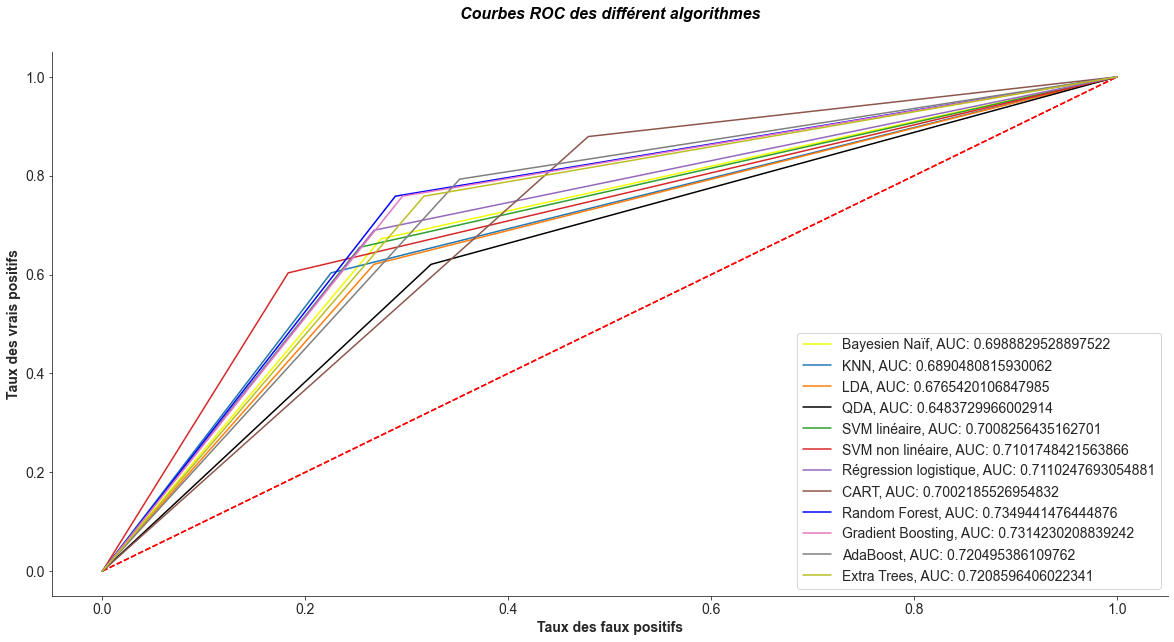

In [36]:
# Superposer les courbes ROC de tous les algortihmes pour comparer
plt.figure(figsize=(20,10))

# Bayesien Naïf
ns_probs = [0 for _ in range(len(Y_test_NB))]
ns_auc = roc_auc_score(Y_test_NB, ns_probs)
lr_auc = roc_auc_score(Y_test_NB, Y_pred_NB)
# Calculer les paramètres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_NB, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_NB, Y_pred_NB)
# Tracer la courbe
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='red')
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="Bayesien Naïf"+AUC, color = "#EFFF00")

# KNN
ns_probs = [0 for _ in range(len(Y_test_KNN))]
ns_auc = roc_auc_score(Y_test_KNN, ns_probs)
lr_auc = roc_auc_score(Y_test_KNN, Y_pred_KNN)
# Calculer les paramètres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_KNN, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_KNN, Y_pred_KNN)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="KNN"+AUC)

# LDA
ns_probs = [0 for _ in range(len(Y_test_LDA))]
ns_auc = roc_auc_score(Y_test_LDA, ns_probs)
lr_auc = roc_auc_score(Y_test_LDA, Y_pred_LDA)
# Calculer les paramètres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_LDA, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_LDA, Y_pred_LDA)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="LDA"+AUC)

# QDA
ns_probs = [0 for _ in range(len(Y_test_QDA))]
ns_auc = roc_auc_score(Y_test_QDA, ns_probs)
lr_auc = roc_auc_score(Y_test_QDA, Y_pred_QDA)
# Calculer les paramètres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_QDA, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_QDA, Y_pred_QDA)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="QDA"+AUC, color = 'black')

# SVM linéaire
ns_probs = [0 for _ in range(len(Y_test_SVMLIN))]
ns_auc = roc_auc_score(Y_test_SVMLIN, ns_probs)
lr_auc = roc_auc_score(Y_test_SVMLIN, Y_pred_SVMLIN)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_SVMLIN, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_SVMLIN, Y_pred_SVMLIN)
# Tracer la courbe
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='red')
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="SVM linéaire"+AUC)

# SVM non linéaire
ns_probs = [0 for _ in range(len(Y_test_SVMNLIN))]
ns_auc = roc_auc_score(Y_test_SVMNLIN, ns_probs)
lr_auc = roc_auc_score(Y_test_SVMNLIN, Y_pred_SVMNLIN)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_SVMNLIN, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_SVMNLIN, Y_pred_SVMNLIN)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="SVM non linéaire"+AUC)

# Régression logistique
ns_probs = [0 for _ in range(len(Y_test_LR))]
ns_auc = roc_auc_score(Y_test_LR, ns_probs)
lr_auc = roc_auc_score(Y_test_LR, Y_pred_LR)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_LR, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_LR, Y_pred_LR)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="Régression logistique"+AUC)

# CART
ns_probs = [0 for _ in range(len(Y_test_CART))]
ns_auc = roc_auc_score(Y_test_CART, ns_probs)
lr_auc = roc_auc_score(Y_test_CART, Y_pred_CART)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_CART, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_CART, Y_pred_CART)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="CART"+AUC)

# Random Forest
ns_probs = [0 for _ in range(len(Y_test_RF))]
ns_auc = roc_auc_score(Y_test_RF, ns_probs)
lr_auc = roc_auc_score(Y_test_RF, Y_pred_RF)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_RF, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_RF, Y_pred_RF)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="Random Forest"+AUC, color = "#0000FF")

# Gradient Boosting
ns_probs = [0 for _ in range(len(Y_test_GB))]
ns_auc = roc_auc_score(Y_test_GB, ns_probs)
lr_auc = roc_auc_score(Y_test_GB, Y_pred_GB)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_GB, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_GB, Y_pred_GB)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="Gradient Boosting"+AUC)

# AdaBoost
ns_probs = [0 for _ in range(len(Y_test_AB))]
ns_auc = roc_auc_score(Y_test_AB, ns_probs)
lr_auc = roc_auc_score(Y_test_AB, Y_pred_AB)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_AB, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_AB, Y_pred_AB)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="AdaBoost"+AUC)

# Extra Trees
ns_probs = [0 for _ in range(len(Y_test_ET))]
ns_auc = roc_auc_score(Y_test_ET, ns_probs)
lr_auc = roc_auc_score(Y_test_ET, Y_pred_ET)
# Calculer les parametres de la courbe
ns_fpr, ns_tpr, _ = roc_curve(Y_test_ET, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_ET, Y_pred_ET)
# Tracer la courbe
AUC=', AUC: '+str(lr_auc)
sns.set_style('ticks') # Arrière plan blanc
sns.despine() # Eliminer les bordures à droite et en haut
plt.plot(lr_fpr, lr_tpr, marker='', label="Extra Trees"+AUC)

plt.xlabel('Taux des faux positifs',fontsize=14,fontweight='bold')
plt.ylabel('Taux des vrais positifs',fontsize=14,fontweight='bold')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.title("Courbes ROC des différent algorithmes",fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)
plt.legend(fontsize=14)

Le graphe ci-dessus permet de visualiser facilement la différence entre les différents algorithmes en terme de *score* AUC. Nous pouvons clairement remarquer la supériorité de l'algorithme **Random Forest** vu que sa courbe est la plus proche du point $({0}, {1})$.

###### Discussion des futures améliorations

Nous consacrons cette partie pour discuter les améliorations possibles que nous pouvons apporter à notre modèle afin de le rendre plus performant : 
- **Sélection des variables** : Il se peut que la combinaison des variables que nous avons pris n'est pas la combinaison la plus optimale et donc une meilleure sélection, via d'autres méthodes, entraînera une meilleure performance.
- **Validation croisée** : Il se peut que par hasard, la division des données engendre une répartition qui maximise ou minimise la performance d'un algorithme. Le plus juste sera de faire une validation croisée de 10 *folds* par exemple et prendre la mmoyenne des résultats trouvés sur les 10 itérations.
- **Fine Tuning** : Parfois, le bon paramétrage d'un certain algorithme cause une augmentation importante dans sa performance. Nous pouvons donc effectuer un *fine tuning* des algorithmes à l'aide de la technique ***Grid Search*** afin de récupérer le paramétrage optimale pour chaque algorithme.

## II. Données relationnelles <a class="anchor" id="part_2"></a>

### Chargement et exploration des données <a class="anchor" id="dat"></a>

Cette partie sera consacrée au chargement des données et l'exploration des différentes composantes de chaque jeu de données.

###### Chargement des données

In [37]:
# Specifier le chemin des données
directory = "Donnees_relationnelles"
# Lire les 3 jeux de données 
for file in os.listdir(directory):
    if file.endswith(".mat"):
        file_name = directory + "/"+ file
        data_name = file[:-4]
        file = os.path.abspath(file_name)
        data = scio.loadmat(file)
        # Apperçu des 5 premiers éléments de chaque composante pour chaque jeu de données
        print("DATA NAME : ", data_name)
        print("Information fea", data['fea'][:5])
        print("Information W", data['W'][:5])
        print("Information gnd", data['gnd'][:5])

DATA NAME :  citeseer
Information fea [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Information W [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Information gnd [[4]
 [2]
 [6]
 [6]
 [4]]
DATA NAME :  cora
Information fea [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Information W [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Information gnd [[4]
 [5]
 [5]
 [1]
 [4]]
DATA NAME :  pubmed
Information fea [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.10463634 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Information W   (0, 1378)	1.0


Nous disposon de 3 jeux de données, **Cora**, **CiteSeer** et **Pubmed**. Nous constatons que chaque jeu de données se compose de 3 composantes, une matrice Doc-Term ***fea***, une matrice d'adjacence **W** et un vecteur **gnd** contenant les vraies labels.

Nous remarquons que la matrice W du jeu de données pubmed possède une représentation différente des autres matrices W d'autres jeux de données, nous allons traiter cela dans la partie qui suit.

###### Exploration des données

Nous allons dans un premier lieu stocker chaque matrice/vecteur de chaque jeu de données dans une variable spécifique pour y faciliter l'accés dans ce qui suit.

In [38]:
# Stocker les bases de données dans des variables
data_cora = scio.loadmat("Donnees_relationnelles/cora.mat")
data_citeseer = scio.loadmat("Donnees_relationnelles/citeseer.mat")
data_pubmed = scio.loadmat("Donnees_relationnelles/pubmed.mat")
# Stocker les composantes de chaque jeu de données dans des variables
X_cora = data_cora["fea"]
W_cora = data_cora["W"]
label_cora = data_cora["gnd"]
X_citeseer = data_citeseer["fea"]
W_citeseer = data_citeseer["W"]
label_citeseer = data_citeseer["gnd"]
X_pubmed = data_pubmed["fea"]
W_pubmed = scipy.sparse.csr_matrix.toarray(data_pubmed["W"]) # Rendre W_pubmed similaire aux autres matrices W
label_pubmed = data_pubmed["gnd"]

Vérifions que les matrices/vecteurs ne contiennent aucune valeur manquante ou infinie

In [39]:
# Jeu de données Cora
print(np.isfinite(X_cora).all())
print(np.isfinite(W_cora).all())
print(np.isfinite(label_cora).all())

# Jeu de données CiteSeer
print(np.isfinite(X_citeseer).all())
print(np.isfinite(W_citeseer).all())
print(np.isfinite(label_citeseer).all())

# Jeu de données Pubmed
print(np.isfinite(X_pubmed).all())
print(np.isfinite(W_pubmed).all())
print(np.isfinite(label_pubmed).all())

True
True
True
True
True
True
True
True
True


Ensuite, nous affichererons les dimensions de chaque matrice/vecteur pour s'assurer que les données ont été bien et entièrement chargé.

In [40]:
# Afficher les dimensions des différentes matrices/vecteurs
print("La dimension de la matrice X pour le jeu de données Cora est : ", X_cora.shape, "\n")
print("La dimension de la matrice W pour le jeu de données Cora est : ", W_cora.shape, "\n")
print("La dimension du vecteur gnd pour le jeu de données Cora est : ", label_cora.shape, "\n")
print("La dimension de la matrice X pour le jeu de données CiteSeer est : ", X_citeseer.shape, "\n")
print("La dimension de la matrice W pour le jeu de données CiteSeer est : ", W_citeseer.shape, "\n")
print("La dimension du vecteur gnd pour le jeu de données CiteSeer est : ", label_citeseer.shape, "\n")
print("La dimension de la matrice X pour le jeu de données Pubmed est : ", X_pubmed.shape, "\n")
print("La dimension de la matrice W pour le jeu de données Pubmed est : ", W_pubmed.shape, "\n")
print("La dimension du vecteur gnd pour le jeu de données Pubmed est : ", label_pubmed.shape, "\n")

La dimension de la matrice X pour le jeu de données Cora est :  (2708, 1433) 

La dimension de la matrice W pour le jeu de données Cora est :  (2708, 2708) 

La dimension du vecteur gnd pour le jeu de données Cora est :  (2708, 1) 

La dimension de la matrice X pour le jeu de données CiteSeer est :  (3327, 3703) 

La dimension de la matrice W pour le jeu de données CiteSeer est :  (3327, 3327) 

La dimension du vecteur gnd pour le jeu de données CiteSeer est :  (3327, 1) 

La dimension de la matrice X pour le jeu de données Pubmed est :  (19717, 500) 

La dimension de la matrice W pour le jeu de données Pubmed est :  (19717, 19717) 

La dimension du vecteur gnd pour le jeu de données Pubmed est :  (19717, 1) 



Nous vérifions également le nombre de classes présents dans chaque vecteur *gnd* et la répartition de ces classes.

In [41]:
# Calculer le nombre et la répartition des classes pour chaque jeu de données
unique, counts = np.unique(label_cora, return_counts=True)
print("Le nombre de classes présent dans le vecteur gnd pour le jeu de données Cora est: ", len(dict(zip(unique, counts))), "\n")
print("La répartiton de ces classes est la suivante: ", dict(zip(unique, counts)), "\n")
unique, counts = np.unique(label_citeseer, return_counts=True)
print("Le nombre de classes présent dans le vecteur gnd pour le jeu de données CiteSeer est: ", len(dict(zip(unique, counts))), "\n")
print("La répartiton de ces classes est la suivante: ", dict(zip(unique, counts)), "\n")
unique, counts = np.unique(label_pubmed, return_counts=True)
print("Le nombre de classes présent dans le vecteur gnd pour le jeu de données Pubmed est: ", len(dict(zip(unique, counts))), "\n")
print("La répartiton de ces classes est la suivante: ", dict(zip(unique, counts)), "\n")

Le nombre de classes présent dans le vecteur gnd pour le jeu de données Cora est:  7 

La répartiton de ces classes est la suivante:  {1: 351, 2: 217, 3: 418, 4: 818, 5: 426, 6: 298, 7: 180} 

Le nombre de classes présent dans le vecteur gnd pour le jeu de données CiteSeer est:  6 

La répartiton de ces classes est la suivante:  {1: 264, 2: 590, 3: 668, 4: 701, 5: 596, 6: 508} 

Le nombre de classes présent dans le vecteur gnd pour le jeu de données Pubmed est:  3 

La répartiton de ces classes est la suivante:  {1: 4103, 2: 7739, 3: 7875} 



Pour ce qui suit, deux représentations sont proposés:

- La matrice $X$ toute seule 
- La matrice $M=D^{-1}*W*X$ avec $D = diag (\Sigma_{j}x_{1j} ... \Sigma_{j}x_{ij})$ où $x_{ij} \in W$

Calculons la nouvelle matrice $M$ pour chaque jeu de données.

In [43]:
# Fonction qui calcule la matrice M
def combinaison(W, X):
    D = np.zeros([len(W[1]), len(W[1])])
    for i in range(len(W[1])):
        D[i,i] = np.sum(W[i])
    M = np.dot(np.dot(inv(D), W), X)
    return M
# Stocker la matrice M dans sa propre varaible pour les 3 jeux de données
M_cora = combinaison(W_cora, X_cora)
print("La dimension de la matrice M pour le jeu de données Cora est : ", M_cora.shape, "\n")
M_citeseer = combinaison(W_citeseer, X_citeseer)
print("La dimension de la matrice M pour le jeu de données CiteSeer est : ", M_citeseer.shape, "\n")
M_pubmed = combinaison(W_pubmed, X_pubmed)
print("La dimension de la matrice M pour le jeu de données Pubmed est : ", M_pubmed.shape, "\n")

La dimension de la matrice M pour le jeu de données Cora est :  (2708, 1433) 

La dimension de la matrice M pour le jeu de données CiteSeer est :  (3327, 3703) 

La dimension de la matrice M pour le jeu de données Pubmed est :  (19717, 500) 



###### Réduction de la dimension

###### Réduction de la dimension

Nous avons bien remarqué que la plupart des matrices dont nous disposons, pour les différents jeux de données, sont des matrices carrées de grandes tailles. En fait, cela causera un grand problème pour les algorithmes de classification qui ne vont pas bien fonctionner avec ce nombre elevé de variables, c'est ce qu'on appelle ***curse of dimensionality***. Pour remedier à cela, nous proposons d'effectuer une réduction de dimension en essayant de garder un compromis entre le maximum possible d'information et le nombre d'axes factoriels.

Vu que les matrices dont nous disposons sont des matrices sparses, nous allons procéder avec une **SVD** au lieu d'une **ACP** puisque cette dernière n'est adaptée que pour les matrices denses.

In [45]:
# Appliquer la SVD
svd_X_cora = TruncatedSVD(n_components=600, n_iter=7, random_state=0).fit(X_cora)
# Récupérer la matrice réduite
X_cora_reduced = svd_X_cora.transform(X_cora)
# Vérifier le pourcentage de variance expliqué par les axes factoriels
X_cora_reduced_var = svd_X_cora.explained_variance_ratio_.sum()
print("Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de X pour le jeu de données Cora est: \n", str(round(X_cora_reduced_var * 100, 2))+'%', "\n")

# Appliquer la SVD
svd_M_cora = TruncatedSVD(n_components=600, n_iter=7, random_state=0).fit(M_cora)
# Récupérer la matrice réduite
M_cora_reduced = svd_M_cora.transform(M_cora)
# Vérifier le pourcentage de variance expliqué par les axes factoriels
M_cora_reduced_var = svd_M_cora.explained_variance_ratio_.sum()
print("Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de M pour le jeu de données Cora est: \n", str(round(M_cora_reduced_var * 100, 2))+'%', "\n")

# Appliquer la SVD
svd_X_citeseer = TruncatedSVD(n_components=800, n_iter=7, random_state=0).fit(X_citeseer)
# Récupérer la matrice réduite
X_citeseer_reduced = svd_X_citeseer.transform(X_citeseer)
# Vérifier le pourcentage de variance expliqué par les axes factoriels
X_citeseer_reduced_var = svd_X_citeseer.explained_variance_ratio_.sum()
print("Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de X pour le jeu de données CiteSeer est: \n", str(round(X_citeseer_reduced_var * 100, 2))+'%', "\n")

# Appliquer la SVD
svd_M_citeseer = TruncatedSVD(n_components=800, n_iter=7, random_state=0).fit(M_citeseer)
# Récupérer la matrice réduite
M_citeseer_reduced = svd_M_citeseer.transform(M_citeseer)
# Vérifier le pourcentage de variance expliqué par les axes factoriels
M_citeseer_reduced_var = svd_M_citeseer.explained_variance_ratio_.sum()
print("Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de M pour le jeu de données CiteSeer est: \n", str(round(M_citeseer_reduced_var * 100, 2))+'%', "\n")

Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de X pour le jeu de données Cora est: 
 89.83% 

Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de M pour le jeu de données Cora est: 
 95.72% 

Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de X pour le jeu de données CiteSeer est: 
 83.76% 

Le pourcentage de variance expliqué par les axes factoriels de la matrice réduite de M pour le jeu de données CiteSeer est: 
 90.92% 



###### Equilibrage des données

Nous avons remarqué précedemment que la distribution des classes du vecteur *gnd* pour les trois bases de données est un peu déséquilibrée. Cela nous oblige à équilibrer les données avant de passer à l'implémentation des algorithmes comme nous avons expliqué les conséquences dans la première partie. Pour ce faire, nous allons en premier lieu préparer les *dataframes* sur lesquelles nous effectuerons le reste des traitements, nous allons également faire une division des données pour appliquer le SMOTE uniquement sur les données d'apprentissage et laisser les données de test telles qu'elles sont.

Avant d'entammer tout cela, assurons nous que les déséquilibrage est bien présent, au niveau des 3 jeux de données, avec une simple visualisation

Text(0.5, 1.05, 'Répartition des classes pour le jeu de données Cora')

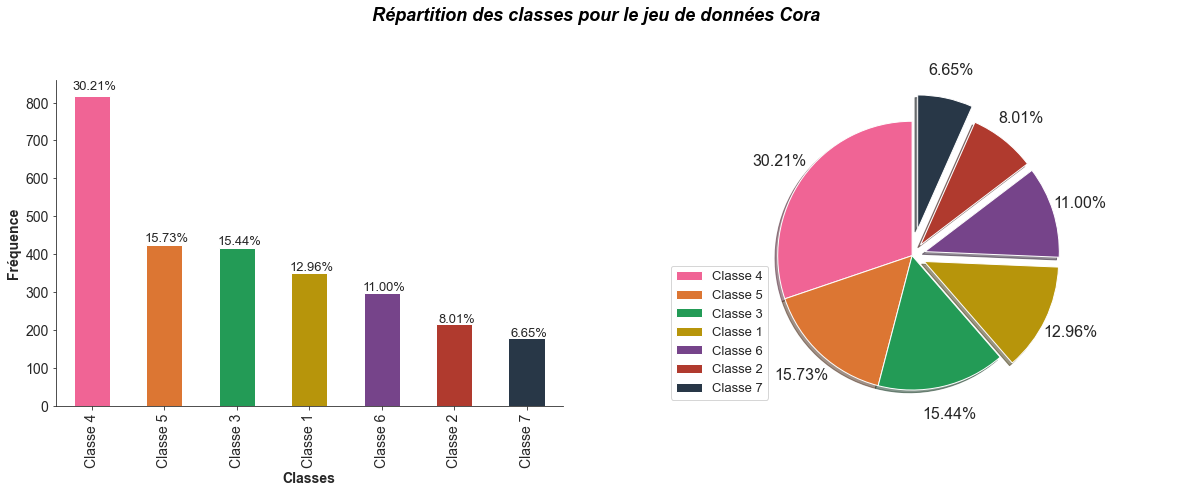

In [46]:
# Visualiser la réparition des classes pour le jeu de données Cora

fig = plt.figure() # Créer une figure
ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 colonnes, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # ajouter subplot 2 (1 ligne, 2 colonnes, 2ème plot)
colors_list =["#F06495", "#DC7633", "#239B56", "#B7950B", "#76448A", "#B03A2E", "#283747"]
group_names=["Classe 4", "Classe 5", "Classe 3", "Classe 1", "Classe 6", "Classe 2", "Classe 7"]

# Subplot 1: Bar plot
sns.set_style('ticks') # Arrière plan blanc
pd.DataFrame(label_cora).value_counts().plot(kind='bar', figsize=(20, 6), color = colors_list, ax=ax0)
sns.despine() # Eliminer les bordures à droite et en haut
ax0.set_xlabel("Classes",fontsize=14,fontweight='bold')
ax0.set_xticklabels(group_names, fontsize=14)
ax0.tick_params(axis='y',labelsize=14)
ax0.set_ylabel("Fréquence",fontsize=14,fontweight='bold')
# Afficher les pourcentages au sommet des bars
total = len(pd.DataFrame(label_cora))
for p in ax0.patches:
    width = p.get_width()/total
    height = p.get_height()/total
    x=p.get_x() + p.get_width()/2 + 0.03
    y=p.get_y() + p.get_height()*1.02
    ax0.annotate(f'{height:.2%}', (x, y), ha='center', fontsize=13)
    
# Subplot 2: Pie plot
explode_list = [0, 0, 0, 0.1, 0.1, 0.1, 0.2]
pd.DataFrame(label_cora).value_counts().plot(kind='pie',figsize=(20, 6),autopct='%1.2f%%', startangle=90, shadow=True, labels=None, explode = explode_list, pctdistance=1.21, colors = colors_list, fontsize=16, ylabel="", ax=ax1)
plt.axis('equal') # Pour la forme d'un cercle 
plt.legend(group_names, loc='lower left',fontsize=13)

fig.suptitle("Répartition des classes pour le jeu de données Cora",fontsize=18,fontweight='bold',color='black',fontstyle='italic',y=1.05)

Text(0.5, 1.05, 'Répartition des classes pour le jeu de données CiteSeer')

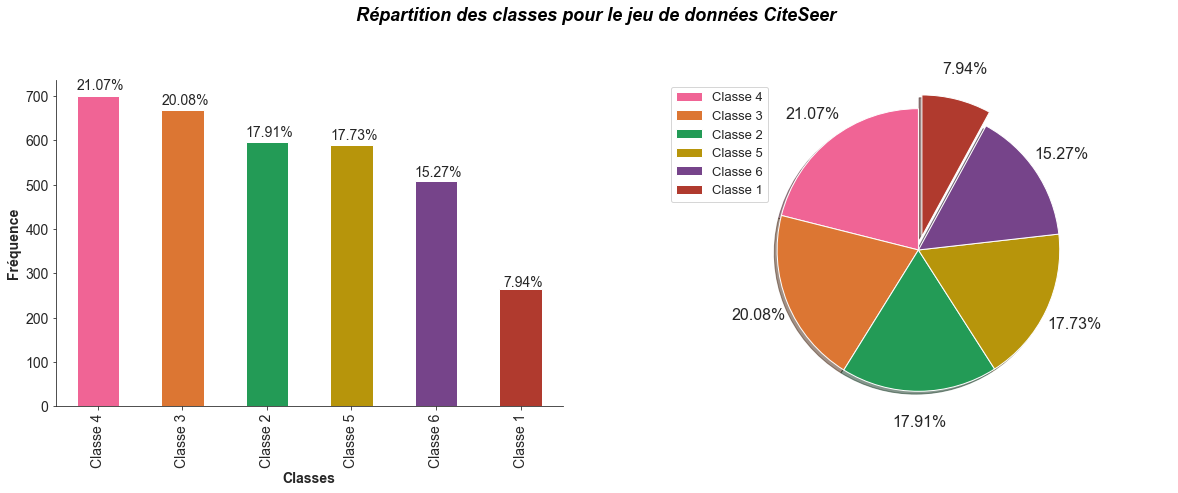

In [239]:
# Visualiser la réparition des classes pour le jeu de données Citeseer

fig = plt.figure() # Créer une figure
ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 colonnes, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # ajouter subplot 2 (1 ligne, 2 colonnes, 2ème plot)
colors_list =["#F06495", "#DC7633", "#239B56", "#B7950B", "#76448A", "#B03A2E"]
group_names=["Classe 4", "Classe 3", "Classe 2", "Classe 5", "Classe 6", "Classe 1"]

# Subplot 1: Bar plot
sns.set_style('ticks') # Arrière plan blanc
pd.DataFrame(label_citeseer).value_counts().plot(kind='bar', figsize=(20, 6), color = colors_list, ax=ax0)
sns.despine() # Eliminer les bordures à droite et en haut
ax0.set_xlabel("Classes",fontsize=14,fontweight='bold')
ax0.set_xticklabels(group_names, fontsize=14)
ax0.tick_params(axis='y',labelsize=14)
ax0.set_ylabel("Fréquence",fontsize=14,fontweight='bold')
# Afficher les pourcentages au sommet des bars
total = len(pd.DataFrame(label_citeseer))
for p in ax0.patches:
    width = p.get_width()/total
    height = p.get_height()/total
    x=p.get_x() + p.get_width()/2 + 0.03
    y=p.get_y() + p.get_height()*1.02
    ax0.annotate(f'{height:.2%}', (x, y), ha='center', fontsize=14)
    
# Subplot 2: Pie plot
explode_list = [0, 0, 0, 0, 0, 0.1]
pd.DataFrame(label_citeseer).value_counts().plot(kind='pie',figsize=(20, 6),autopct='%1.2f%%', startangle=90, shadow=True, labels=None, explode = explode_list, pctdistance=1.22, colors = colors_list, fontsize=16, ylabel="", ax=ax1)
plt.axis('equal') # Pour la forme d'un cercle 
plt.legend(group_names, loc='upper left',fontsize=13)

fig.suptitle("Répartition des classes pour le jeu de données CiteSeer",fontsize=18,fontweight='bold',color='black',fontstyle='italic',y=1.05)

Text(0.5, 1.05, 'Répartition des classes pour le jeu de données CiteSeer')

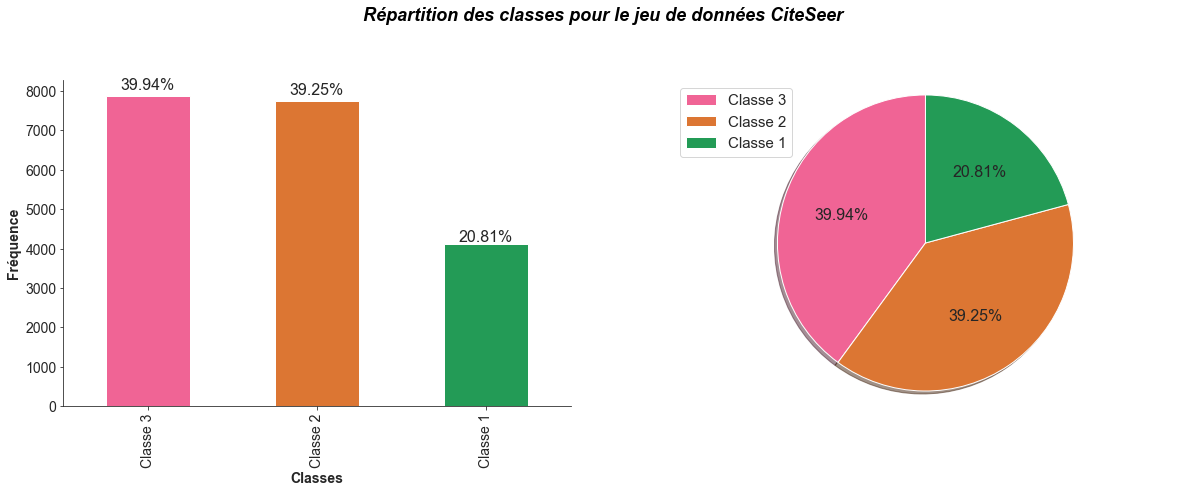

In [48]:
# Visualiser la réparition des classes pour le jeu de données Pubmed

fig = plt.figure() # Créer une figure
ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 colonnes, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # ajouter subplot 2 (1 ligne, 2 colonnes, 2ème plot)
colors_list =["#F06495", "#DC7633", "#239B56"]
group_names=["Classe 3", "Classe 2", "Classe 1"]

# Subplot 1: Bar plot
sns.set_style('ticks') # Arrière plan blanc
pd.DataFrame(label_pubmed).value_counts().plot(kind='bar', figsize=(20, 6), color = colors_list, ax=ax0)
sns.despine() # Eliminer les bordures à droite et en haut
ax0.set_xlabel("Classes",fontsize=14,fontweight='bold')
ax0.set_xticklabels(group_names, fontsize=14)
ax0.tick_params(axis='y',labelsize=14)
ax0.set_ylabel("Fréquence",fontsize=14,fontweight='bold')
# Afficher les pourcentages au sommet des bars
total = len(pd.DataFrame(label_pubmed))
for p in ax0.patches:
    width = p.get_width()/total
    height = p.get_height()/total
    x=p.get_x() + p.get_width()/2
    y=p.get_y() + p.get_height()*1.02
    ax0.annotate(f'{height:.2%}', (x, y), ha='center', fontsize=16)
    
# Subplot 2: Pie plot
pd.DataFrame(label_pubmed).value_counts().plot(kind='pie',figsize=(20, 6),autopct='%1.2f%%', colors = colors_list, startangle=90, shadow=True, labels=None, fontsize=16, ylabel="", ax=ax1)
plt.axis('equal') # Pour la forme d'un cercle 
plt.legend(group_names, loc='upper left',fontsize=15)

fig.suptitle("Répartition des classes pour le jeu de données CiteSeer",fontsize=18,fontweight='bold',color='black',fontstyle='italic',y=1.05)

Après avoir visualiser la distribution des classes pour les 3 jeux de données, nous pouvons clairement voir la présence du déséquilibre entre certains classes. Nous allons passer par la suite à la création des *dataframes* suivie par la division des données et l'application de l'algorithme SMOTE. Nous allons également préparer des jeux de données normalisés vu que certains algoritmes basés sur le calcul des distances nécessitent une normalisation des données. La normalisation est utile aussi pour les algorithmes qui requirent que les valeurs positives, comme le Bayesien Naîf, vu que la SVD retourne des matrices avec valeurs négatives.

In [49]:
# Création des dataframes

# X_cora
x, y = pd.DataFrame(X_cora_reduced), pd.DataFrame(label_cora)
x.columns = x.columns.map(str)
y.columns = y.columns.map(str)
y.rename(columns = {"0": "Label"}, inplace = True)
df_X_cora = pd.concat([x, y], axis = 1)

# M_cora
x, y = pd.DataFrame(M_cora_reduced), pd.DataFrame(label_cora)
x.columns = x.columns.map(str)
y.columns = y.columns.map(str)
y.rename(columns = {"0": "Label"}, inplace = True)
df_M_cora = pd.concat([x, y], axis = 1)

# X_citeseer
x, y = pd.DataFrame(X_citeseer_reduced), pd.DataFrame(label_citeseer)
x.columns = x.columns.map(str)
y.columns = y.columns.map(str)
y.rename(columns = {"0": "Label"}, inplace = True)
df_X_citeseer = pd.concat([x, y], axis = 1)

# M_citeseer
x, y = pd.DataFrame(M_citeseer_reduced), pd.DataFrame(label_citeseer)
x.columns = x.columns.map(str)
y.columns = y.columns.map(str)
y.rename(columns = {"0": "Label"}, inplace = True)
df_M_citeseer = pd.concat([x, y], axis = 1)

# X_pubmed
x, y = pd.DataFrame(X_pubmed), pd.DataFrame(label_pubmed)
x.columns = x.columns.map(str)
y.columns = y.columns.map(str)
y.rename(columns = {"0": "Label"}, inplace = True)
df_X_pubmed = pd.concat([x, y], axis = 1)

# M_pubmed
x, y = pd.DataFrame(M_pubmed), pd.DataFrame(label_pubmed)
x.columns = x.columns.map(str)
y.columns = y.columns.map(str)
y.rename(columns = {"0": "Label"}, inplace = True)
df_M_pubmed = pd.concat([x, y], axis = 1)

In [50]:
# Divsion des données

# X_cora
X_train_X_cora, X_test_X_cora, Y_train_X_cora, Y_test_X_cora = train_test_split(df_X_cora.iloc[:,:-1], df_X_cora.iloc[:,-1], test_size = 0.2, random_state = 0, shuffle = True)

# M_cora
X_train_M_cora, X_test_M_cora, Y_train_M_cora, Y_test_M_cora = train_test_split(df_M_cora.iloc[:,:-1], df_M_cora.iloc[:,-1], test_size = 0.2, random_state = 0, shuffle = True)

# X_citeseer
X_train_X_citeseer, X_test_X_citeseer, Y_train_X_citeseer, Y_test_X_citeseer = train_test_split(df_X_citeseer.iloc[:,:-1], df_X_citeseer.iloc[:,-1], test_size = 0.2, random_state = 0, shuffle = True)

# M_citeseer
X_train_M_citeseer, X_test_M_citeseer, Y_train_M_citeseer, Y_test_M_citeseer = train_test_split(df_M_citeseer.iloc[:,:-1], df_M_citeseer.iloc[:,-1], test_size = 0.2, random_state = 0, shuffle = True)

# M_pubmed
X_train_X_pubmed, X_test_X_pubmed, Y_train_X_pubmed, Y_test_X_pubmed = train_test_split(df_X_pubmed.iloc[:,:-1], df_X_pubmed.iloc[:,-1], test_size = 0.2, random_state = 0, shuffle = True)

# M_pubmed
X_train_M_pubmed, X_test_M_pubmed, Y_train_M_pubmed, Y_test_M_pubmed = train_test_split(df_M_pubmed.iloc[:,:-1], df_M_pubmed.iloc[:,-1], test_size = 0.2, random_state = 0, shuffle = True)

In [51]:
# Equilibrage des données

# X_cora
X_train_X_cora, Y_train_X_cora = SMOTE(sampling_strategy = 'auto', random_state = 0, k_neighbors = 10, n_jobs = 5).fit_sample(X_train_X_cora, Y_train_X_cora)

# M_cora
X_train_M_cora, Y_train_M_cora = SMOTE(sampling_strategy = 'auto', random_state = 0, k_neighbors = 10, n_jobs = 5).fit_sample(X_train_M_cora, Y_train_M_cora)

# X_citeseer
X_train_X_citeseer, Y_train_X_citeseer = SMOTE(sampling_strategy = 'auto', random_state = 0, k_neighbors = 10, n_jobs = 5).fit_sample(X_train_X_citeseer, Y_train_X_citeseer)

# M_citeseer
X_train_M_citeseer, Y_train_M_citeseer = SMOTE(sampling_strategy = 'auto', random_state = 0, k_neighbors = 10, n_jobs = 5).fit_sample(X_train_M_citeseer, Y_train_M_citeseer)

# X_pubmed
X_train_X_pubmed, Y_train_X_pubmed = SMOTE(sampling_strategy = 'auto', random_state = 0, k_neighbors = 10, n_jobs = 5).fit_sample(X_train_X_pubmed, Y_train_X_pubmed)

# M_pubmed
X_train_M_pubmed, Y_train_M_pubmed = SMOTE(sampling_strategy = 'auto', random_state = 0, k_neighbors = 10, n_jobs = 5).fit_sample(X_train_M_pubmed, Y_train_M_pubmed)

In [331]:
# Normalsiation des données

# X_cora
X_train_X_cora_norm = preprocessing.MinMaxScaler().fit(X_train_X_cora).transform(X_train_X_cora) 
X_test_X_cora_norm = preprocessing.MinMaxScaler().fit(X_test_X_cora).transform(X_test_X_cora)

# M_cora
X_train_M_cora_norm = preprocessing.MinMaxScaler().fit(X_train_M_cora).transform(X_train_M_cora) 
X_test_M_cora_norm = preprocessing.MinMaxScaler().fit(X_test_M_cora).transform(X_test_M_cora)

# X_citeseer
X_train_X_citeseer_norm = preprocessing.MinMaxScaler().fit(X_train_X_citeseer).transform(X_train_X_citeseer) 
X_test_X_citeseer_norm = preprocessing.MinMaxScaler().fit(X_test_X_citeseer).transform(X_test_X_citeseer)

# M_citeseer
X_train_M_citeseer_norm = preprocessing.MinMaxScaler().fit(X_train_M_citeseer).transform(X_train_M_citeseer) 
X_test_M_citeseer_norm = preprocessing.MinMaxScaler().fit(X_test_M_citeseer).transform(X_test_M_citeseer)

# X_pubmed
X_train_X_pubmed_norm = preprocessing.MinMaxScaler().fit(X_train_X_pubmed).transform(X_train_X_pubmed) 
X_test_X_pubmed_norm = preprocessing.MinMaxScaler().fit(X_test_X_pubmed).transform(X_test_X_pubmed)

# M_pubmed
X_train_M_pubmed_norm = preprocessing.MinMaxScaler().fit(X_train_M_pubmed).transform(X_train_M_pubmed) 
X_test_M_pubmed_norm = preprocessing.MinMaxScaler().fit(X_test_M_pubmed).transform(X_test_M_pubmed)

### Application des méthodes de classification <a class="anchor" id="ML"></a> 

#### Jeu de données Cora <a class="anchor" id="c"></a> 

###### Première représentation <a class="anchor" id="c1"></a>  $X$

###### Bayesien Naïf

              precision    recall  f1-score   support

    Classe 1       0.71      0.33      0.45        67
    Classe 2       0.45      0.76      0.57        42
    Classe 3       0.85      0.67      0.75        83
    Classe 4       0.82      0.59      0.68       174
    Classe 5       0.44      0.79      0.57        76
    Classe 6       0.81      0.44      0.57        59
    Classe 7       0.40      0.78      0.52        41

    accuracy                           0.61       542
   macro avg       0.64      0.62      0.59       542
weighted avg       0.69      0.61      0.61       542



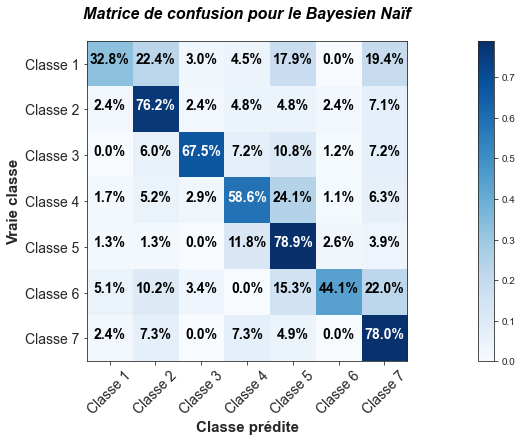

In [83]:
# Bayesien Naïf
model = ComplementNB(alpha=0.1)
model.fit(X_train_X_cora_norm, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora_norm)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Bayesien Naïf', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_NB_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_NB_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### KNN

              precision    recall  f1-score   support

    Classe 1       0.39      0.42      0.40        67
    Classe 2       0.28      0.67      0.40        42
    Classe 3       0.46      0.71      0.56        83
    Classe 4       0.93      0.07      0.14       174
    Classe 5       0.43      0.78      0.55        76
    Classe 6       0.55      0.46      0.50        59
    Classe 7       0.43      0.46      0.45        41

    accuracy                           0.43       542
   macro avg       0.50      0.51      0.43       542
weighted avg       0.59      0.43      0.38       542



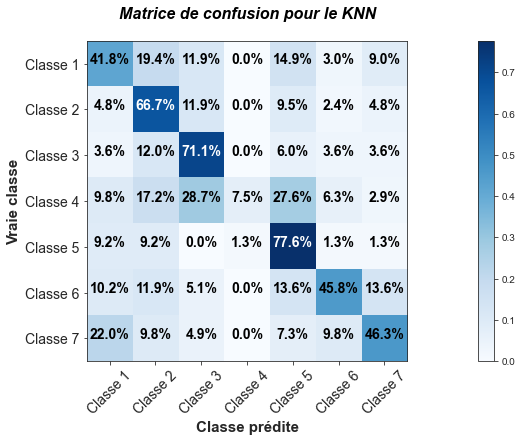

In [93]:
# KNN
model = KNeighborsClassifier(n_neighbors = 6, p=2, metric='minkowski', n_jobs=5)
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le KNN', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_KNN_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_KNN_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### LDA

              precision    recall  f1-score   support

    Classe 1       0.50      0.70      0.58        67
    Classe 2       0.60      0.81      0.69        42
    Classe 3       0.85      0.76      0.80        83
    Classe 4       0.82      0.69      0.75       174
    Classe 5       0.72      0.68      0.70        76
    Classe 6       0.61      0.58      0.59        59
    Classe 7       0.60      0.61      0.60        41

    accuracy                           0.69       542
   macro avg       0.67      0.69      0.67       542
weighted avg       0.71      0.69      0.70       542



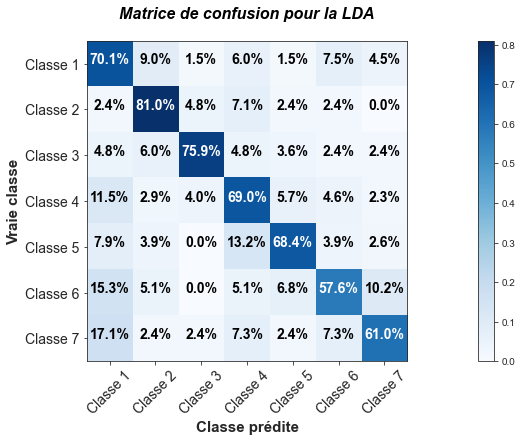

In [97]:
# LDA
while True:
    try:
        model = LDA(solver = "svd")
        model.fit(X_train_X_cora, Y_train_X_cora)
        Y_pred = model.predict(X_test_X_cora)
        print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
        cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la LDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
        # Stocker les métriques
        f1_LDA_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
        acc_LDA_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### QDA

c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: U

              precision    recall  f1-score   support

    Classe 1       0.00      0.00      0.00        67
    Classe 2       0.00      0.00      0.00        42
    Classe 3       1.00      0.02      0.05        83
    Classe 4       0.32      1.00      0.49       174
    Classe 5       0.00      0.00      0.00        76
    Classe 6       1.00      0.03      0.07        59
    Classe 7       0.00      0.00      0.00        41

    accuracy                           0.33       542
   macro avg       0.33      0.15      0.09       542
weighted avg       0.37      0.33      0.17       542



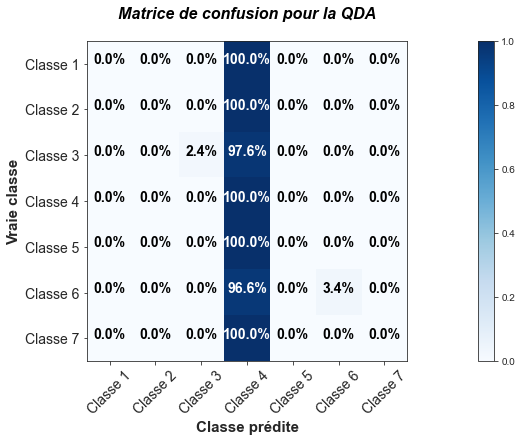

In [99]:
# QDA
while True:
    try:
        model = QDA()
        model.fit(X_train_X_cora, Y_train_X_cora)
        Y_pred = model.predict(X_test_X_cora)
        print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
        cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la QDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
        # Stocker les métriques
        f1_QDA_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
        acc_QDA_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### SVM linéaire

              precision    recall  f1-score   support

    Classe 1       0.51      0.72      0.60        67
    Classe 2       0.63      0.81      0.71        42
    Classe 3       0.80      0.80      0.80        83
    Classe 4       0.84      0.67      0.75       174
    Classe 5       0.64      0.72      0.68        76
    Classe 6       0.67      0.61      0.64        59
    Classe 7       0.62      0.49      0.55        41

    accuracy                           0.69       542
   macro avg       0.67      0.69      0.67       542
weighted avg       0.71      0.69      0.70       542



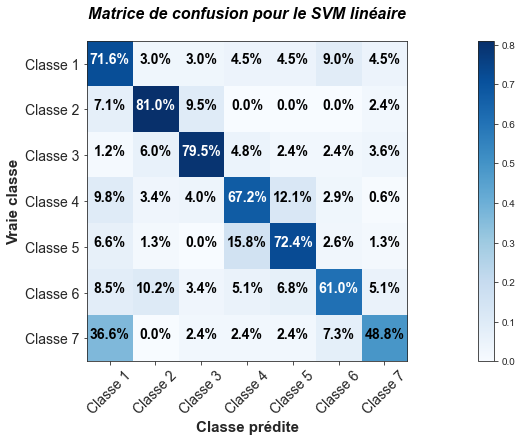

In [109]:
# SVM linéaire
model = svm.SVC(C = 0.1, kernel = 'linear')
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_SVMLIN_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_SVMLIN_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### SVM non linéaire

              precision    recall  f1-score   support

    Classe 1       0.48      0.72      0.58        67
    Classe 2       0.73      0.86      0.79        42
    Classe 3       0.91      0.71      0.80        83
    Classe 4       0.84      0.66      0.74       174
    Classe 5       0.59      0.79      0.68        76
    Classe 6       0.69      0.63      0.65        59
    Classe 7       0.62      0.56      0.59        41

    accuracy                           0.70       542
   macro avg       0.70      0.70      0.69       542
weighted avg       0.73      0.70      0.70       542



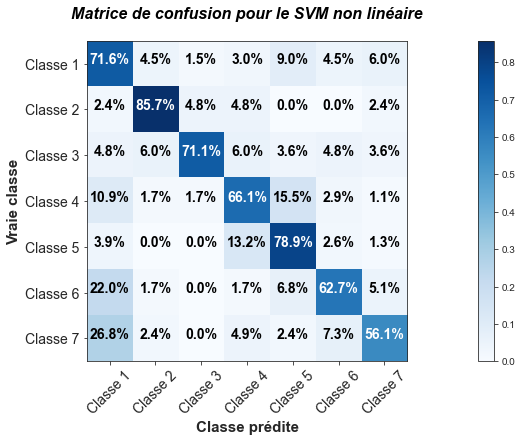

In [116]:
# SVM non linéaire
model = svm.NuSVC(kernel = 'linear')
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM non linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_SVMNLIN_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_SVMNLIN_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### Régression logistique

              precision    recall  f1-score   support

    Classe 1       0.55      0.69      0.61        67
    Classe 2       0.72      0.86      0.78        42
    Classe 3       0.84      0.82      0.83        83
    Classe 4       0.83      0.69      0.75       174
    Classe 5       0.66      0.78      0.72        76
    Classe 6       0.67      0.61      0.64        59
    Classe 7       0.56      0.56      0.56        41

    accuracy                           0.72       542
   macro avg       0.69      0.71      0.70       542
weighted avg       0.73      0.72      0.72       542



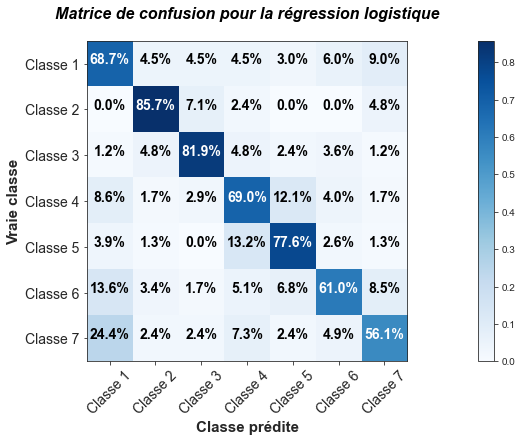

In [123]:
# Régression logistique
model = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 0, penalty = "l2")
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la régression logistique', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_LR_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_LR_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### CART

              precision    recall  f1-score   support

    Classe 1       0.29      0.34      0.32        67
    Classe 2       0.62      0.62      0.62        42
    Classe 3       0.54      0.51      0.52        83
    Classe 4       0.69      0.52      0.59       174
    Classe 5       0.47      0.47      0.47        76
    Classe 6       0.39      0.44      0.41        59
    Classe 7       0.19      0.32      0.24        41

    accuracy                           0.47       542
   macro avg       0.45      0.46      0.45       542
weighted avg       0.51      0.47      0.49       542



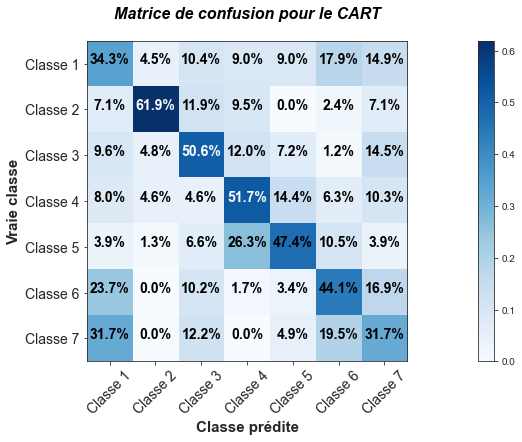

In [205]:
# CART
model = DecisionTreeClassifier(criterion="gini", max_depth = 6, random_state = 0, splitter = "best", min_samples_split = 2)
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le CART', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_DT_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_DT_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### Random Forest

              precision    recall  f1-score   support

    Classe 1       0.38      0.42      0.40        67
    Classe 2       0.54      0.79      0.64        42
    Classe 3       0.77      0.69      0.73        83
    Classe 4       0.75      0.56      0.64       174
    Classe 5       0.52      0.66      0.58        76
    Classe 6       0.56      0.54      0.55        59
    Classe 7       0.37      0.46      0.41        41

    accuracy                           0.58       542
   macro avg       0.56      0.59      0.56       542
weighted avg       0.61      0.58      0.59       542



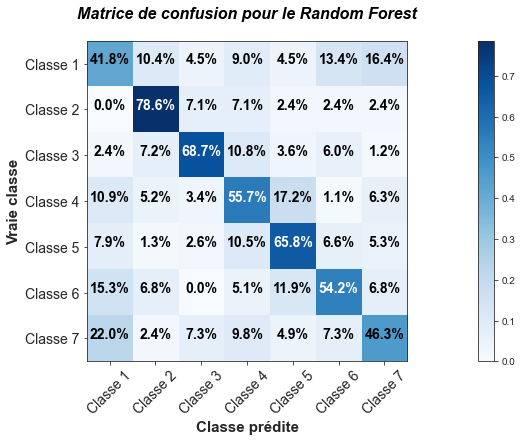

In [199]:
# Random Forest
model = RandomForestClassifier(criterion="entropy", n_estimators = 60, max_depth = 5, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Random Forest', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_RF_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_RF_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### Gradient Boosting

              precision    recall  f1-score   support

    Classe 1       0.49      0.58      0.53        67
    Classe 2       0.60      0.74      0.66        42
    Classe 3       0.76      0.69      0.72        83
    Classe 4       0.71      0.67      0.69       174
    Classe 5       0.58      0.64      0.61        76
    Classe 6       0.62      0.58      0.60        59
    Classe 7       0.64      0.51      0.57        41

    accuracy                           0.64       542
   macro avg       0.63      0.63      0.63       542
weighted avg       0.65      0.64      0.64       542



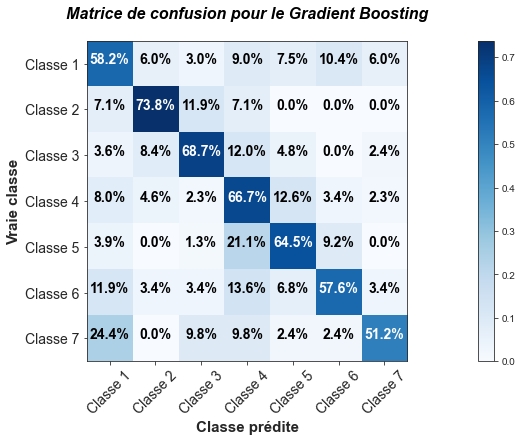

In [213]:
# Gradient Boosting
model = GradientBoostingClassifier(criterion="friedman_mse", n_estimators = 50, learning_rate = 0.1, max_depth = 5, random_state = 0, min_samples_split = 2)
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Gradient Boosting', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_GB_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_GB_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### AdaBoost

              precision    recall  f1-score   support

    Classe 1       0.38      0.46      0.42        67
    Classe 2       0.50      0.71      0.59        42
    Classe 3       0.83      0.66      0.74        83
    Classe 4       0.80      0.45      0.58       174
    Classe 5       0.44      0.62      0.51        76
    Classe 6       0.52      0.58      0.55        59
    Classe 7       0.24      0.37      0.29        41

    accuracy                           0.54       542
   macro avg       0.53      0.55      0.52       542
weighted avg       0.61      0.54      0.55       542



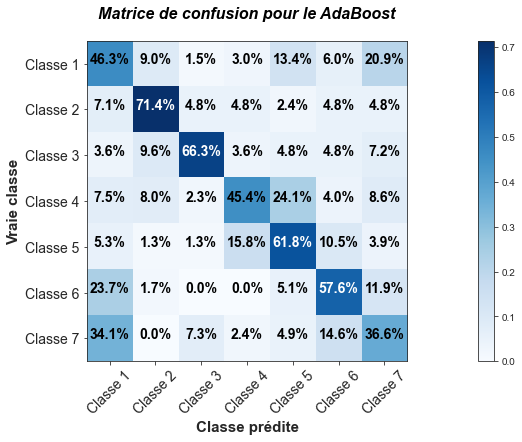

In [194]:
# AdaBoost
model = AdaBoostClassifier(n_estimators = 100 ,random_state = 0, learning_rate = 0.1)
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le AdaBoost', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_AB_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_AB_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### Extra Trees

              precision    recall  f1-score   support

    Classe 1       0.61      0.37      0.46        67
    Classe 2       0.57      0.60      0.58        42
    Classe 3       0.71      0.65      0.68        83
    Classe 4       0.57      0.68      0.62       174
    Classe 5       0.49      0.51      0.50        76
    Classe 6       0.65      0.53      0.58        59
    Classe 7       0.45      0.51      0.48        41

    accuracy                           0.58       542
   macro avg       0.58      0.55      0.56       542
weighted avg       0.59      0.58      0.58       542



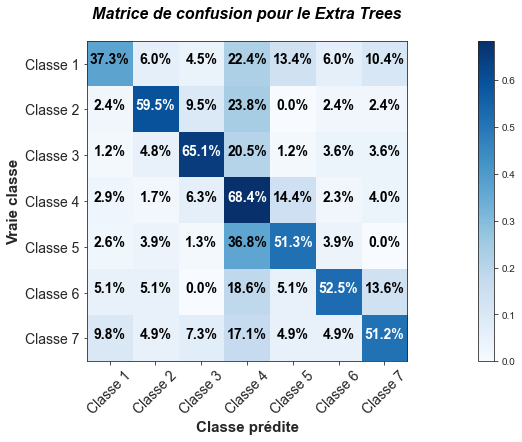

In [212]:
# Extra Trees
model = ExtraTreesClassifier(criterion="entropy", n_estimators = 120, max_depth = 6, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_X_cora, Y_train_X_cora)
Y_pred = model.predict(X_test_X_cora)
print(classification_report(Y_test_X_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_X_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Extra Trees', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_ET_X_Cora = f1_score(Y_test_X_cora, Y_pred, average = "macro")
acc_ET_X_Cora = accuracy_score(Y_test_X_cora, Y_pred)

###### Résultats et comparaisons

| <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_X_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_X_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_X_Cora * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_LR_X_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_DT_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_X_Cora * 100, 2))+'%'}}</center> |
| <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMNLIN_X_Cora * 100, 2))+'%'}}</center> |<b> <center>{{str(round(acc_LR_X_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_DT_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_X_Cora * 100, 2))+'%'}}</center> |

En ce qui concerne le jeu de données **Cora**, nous remarquons que pour la représentation $X$, les meilleurs résultats sont obtenus à l'aide de la **régréssion logistique** suivie par la **LDA**. Contrairement au premier type de données (Donnée bancaire) les algorithmes basées sur les arbres de décision ne sont pas très performants.

###### Deuxième représentation <a class="anchor" id="c2"></a> $M=D^{-1}*W*X$

###### Bayesien Naïf

              precision    recall  f1-score   support

    Classe 1       0.87      0.40      0.55        67
    Classe 2       0.20      0.98      0.33        42
    Classe 3       0.90      0.72      0.80        83
    Classe 4       0.97      0.22      0.36       174
    Classe 5       0.62      0.82      0.70        76
    Classe 6       0.97      0.47      0.64        59
    Classe 7       0.51      0.90      0.65        41

    accuracy                           0.54       542
   macro avg       0.72      0.64      0.58       542
weighted avg       0.80      0.54      0.55       542



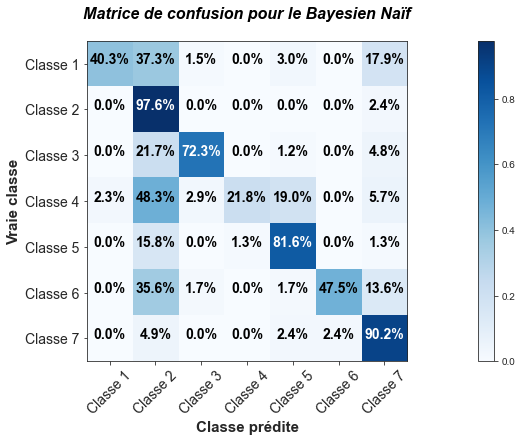

In [160]:
# Bayesien Naïf
model = ComplementNB(alpha=0.1)
model.fit(X_train_M_cora_norm, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora_norm)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Bayesien Naïf', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_NB_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_NB_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### KNN

              precision    recall  f1-score   support

    Classe 1       0.51      0.67      0.58        67
    Classe 2       0.71      0.93      0.80        42
    Classe 3       0.86      0.95      0.90        83
    Classe 4       0.93      0.65      0.76       174
    Classe 5       0.75      0.79      0.77        76
    Classe 6       0.76      0.71      0.74        59
    Classe 7       0.71      0.85      0.78        41

    accuracy                           0.76       542
   macro avg       0.75      0.79      0.76       542
weighted avg       0.79      0.76      0.76       542



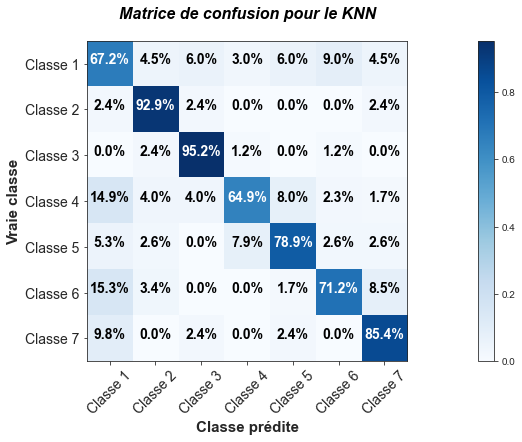

In [166]:
# KNN
model = KNeighborsClassifier(n_neighbors = 6, p=2, metric='minkowski', n_jobs=5)
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le KNN', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_KNN_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_KNN_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### LDA

              precision    recall  f1-score   support

    Classe 1       0.65      0.73      0.69        67
    Classe 2       0.83      0.90      0.86        42
    Classe 3       0.93      0.90      0.91        83
    Classe 4       0.88      0.78      0.83       174
    Classe 5       0.84      0.82      0.83        76
    Classe 6       0.67      0.73      0.70        59
    Classe 7       0.72      0.83      0.77        41

    accuracy                           0.81       542
   macro avg       0.79      0.81      0.80       542
weighted avg       0.81      0.81      0.81       542



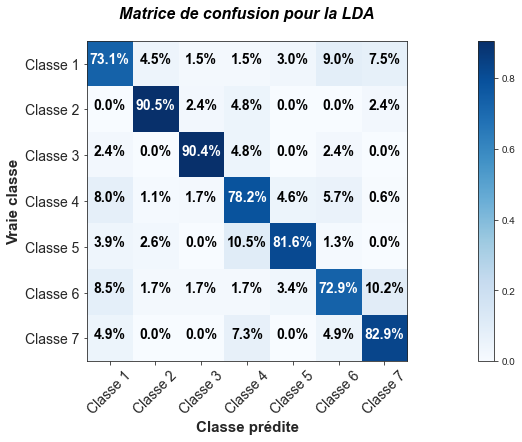

In [167]:
# LDA
while True:
    try:
        model = LDA(solver = "svd")
        model.fit(X_train_M_cora, Y_train_M_cora)
        Y_pred = model.predict(X_test_M_cora)
        print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
        cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la LDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
        # Stocker les métriques
        f1_LDA_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
        acc_LDA_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### QDA

c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

    Classe 1       0.62      0.07      0.13        67
    Classe 2       0.30      0.07      0.12        42
    Classe 3       1.00      0.28      0.43        83
    Classe 4       0.35      0.96      0.52       174
    Classe 5       0.92      0.16      0.27        76
    Classe 6       0.93      0.22      0.36        59
    Classe 7       1.00      0.05      0.09        41

    accuracy                           0.42       542
   macro avg       0.73      0.26      0.27       542
weighted avg       0.67      0.42      0.34       542



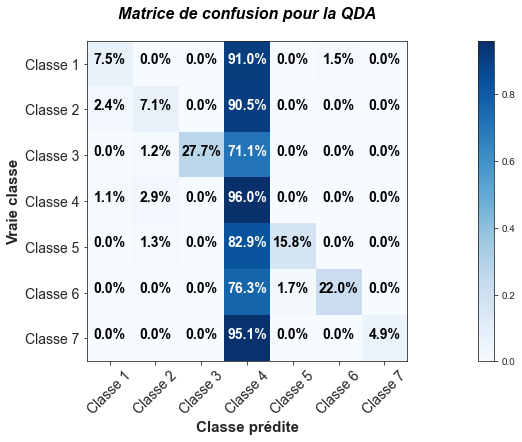

In [168]:
# QDA
while True:
    try:
        model = QDA()
        model.fit(X_train_M_cora, Y_train_M_cora)
        Y_pred = model.predict(X_test_M_cora)
        print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
        cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la QDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
        # Stocker les métriques
        f1_QDA_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
        acc_QDA_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### SVM linéaire

              precision    recall  f1-score   support

    Classe 1       0.60      0.72      0.65        67
    Classe 2       0.76      0.90      0.83        42
    Classe 3       0.91      0.90      0.91        83
    Classe 4       0.90      0.80      0.84       174
    Classe 5       0.84      0.86      0.85        76
    Classe 6       0.79      0.69      0.74        59
    Classe 7       0.74      0.83      0.78        41

    accuracy                           0.81       542
   macro avg       0.79      0.81      0.80       542
weighted avg       0.82      0.81      0.81       542



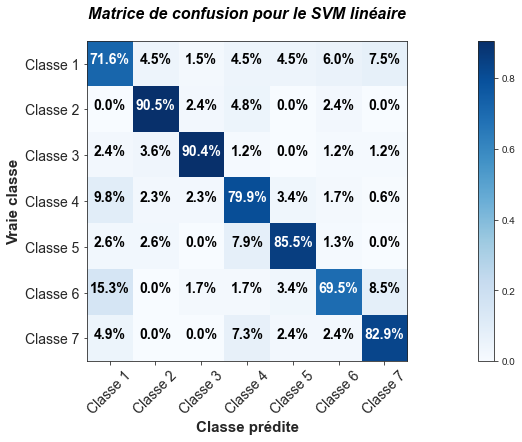

In [171]:
# SVM linéaire
model = svm.SVC(C = 0.1, kernel = 'linear')
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_SVMLIN_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_SVMLIN_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### SVM non linéaire

              precision    recall  f1-score   support

    Classe 1       0.58      0.78      0.66        67
    Classe 2       0.79      0.90      0.84        42
    Classe 3       0.94      0.88      0.91        83
    Classe 4       0.88      0.76      0.82       174
    Classe 5       0.81      0.86      0.83        76
    Classe 6       0.86      0.64      0.74        59
    Classe 7       0.70      0.85      0.77        41

    accuracy                           0.80       542
   macro avg       0.79      0.81      0.80       542
weighted avg       0.82      0.80      0.80       542



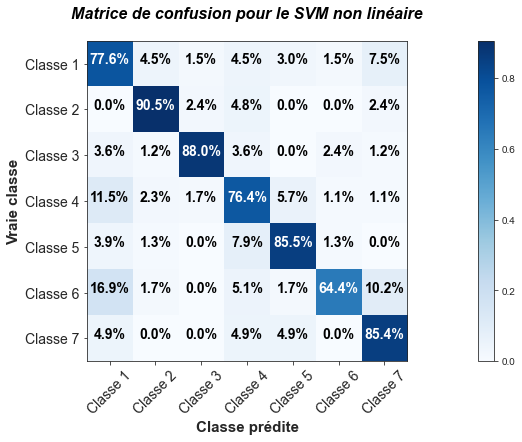

In [172]:
# SVM non linéaire
model = svm.NuSVC(kernel = 'linear')
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM non linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_SVMNLIN_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_SVMNLIN_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### Régression logistique

              precision    recall  f1-score   support

    Classe 1       0.62      0.75      0.68        67
    Classe 2       0.82      0.95      0.88        42
    Classe 3       0.87      0.90      0.89        83
    Classe 4       0.87      0.75      0.81       174
    Classe 5       0.82      0.89      0.86        76
    Classe 6       0.85      0.66      0.74        59
    Classe 7       0.72      0.83      0.77        41

    accuracy                           0.81       542
   macro avg       0.80      0.82      0.80       542
weighted avg       0.82      0.81      0.81       542



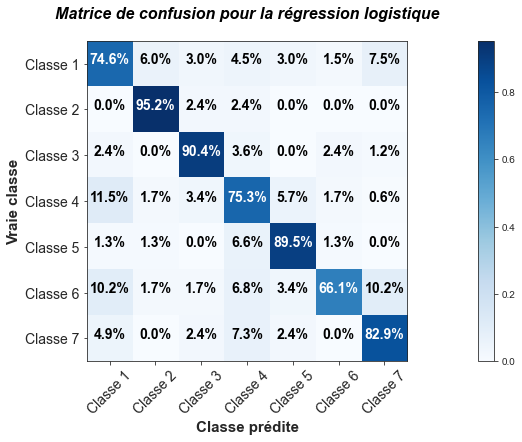

In [173]:
# Régression logistique
model = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 0, penalty = "l2")
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la régression logistique', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_LR_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_LR_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### CART

              precision    recall  f1-score   support

    Classe 1       0.48      0.58      0.52        67
    Classe 2       0.72      0.67      0.69        42
    Classe 3       0.82      0.71      0.76        83
    Classe 4       0.70      0.60      0.64       174
    Classe 5       0.57      0.61      0.59        76
    Classe 6       0.54      0.53      0.53        59
    Classe 7       0.42      0.63      0.50        41

    accuracy                           0.61       542
   macro avg       0.61      0.62      0.61       542
weighted avg       0.63      0.61      0.62       542



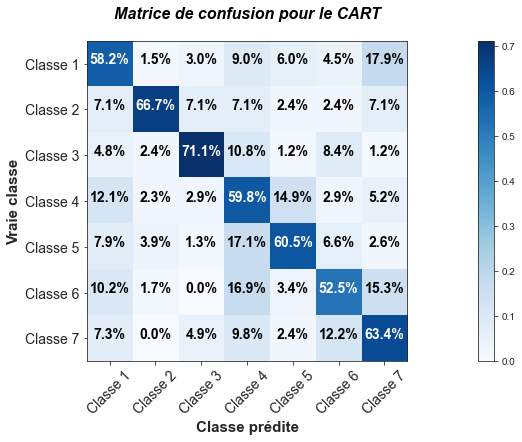

In [227]:
# CART
model = DecisionTreeClassifier(criterion="gini", max_depth = 6, random_state = 0, splitter = "best", min_samples_split = 2)
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le CART', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_DT_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_DT_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### Random Forest

              precision    recall  f1-score   support

    Classe 1       0.65      0.69      0.67        67
    Classe 2       0.79      0.81      0.80        42
    Classe 3       0.84      0.84      0.84        83
    Classe 4       0.76      0.80      0.78       174
    Classe 5       0.79      0.80      0.80        76
    Classe 6       0.83      0.59      0.69        59
    Classe 7       0.80      0.80      0.80        41

    accuracy                           0.77       542
   macro avg       0.78      0.76      0.77       542
weighted avg       0.78      0.77      0.77       542



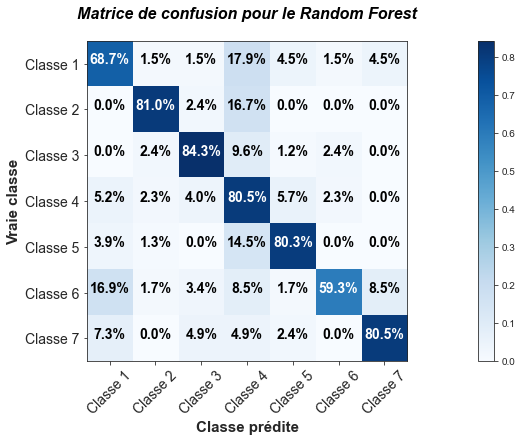

In [229]:
# Random Forest
model = RandomForestClassifier(criterion="entropy", n_estimators = 60, max_depth = 10, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Random Forest', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_RF_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_RF_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### Gradient Boosting

              precision    recall  f1-score   support

    Classe 1       0.62      0.60      0.61        67
    Classe 2       0.76      0.83      0.80        42
    Classe 3       0.82      0.90      0.86        83
    Classe 4       0.80      0.77      0.79       174
    Classe 5       0.74      0.78      0.76        76
    Classe 6       0.80      0.69      0.75        59
    Classe 7       0.78      0.78      0.78        41

    accuracy                           0.77       542
   macro avg       0.76      0.77      0.76       542
weighted avg       0.77      0.77      0.77       542



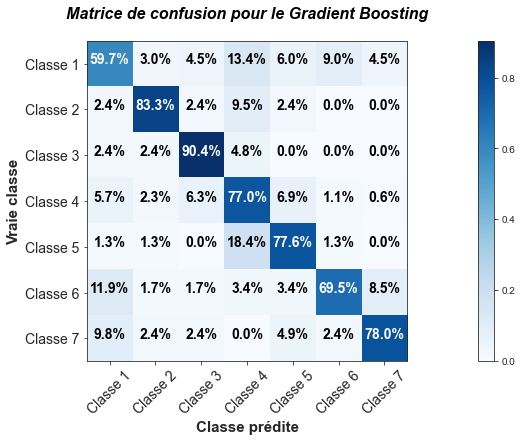

In [231]:
# Gradient Boosting
model = GradientBoostingClassifier(criterion="friedman_mse", n_estimators = 50, learning_rate = 0.1, max_depth = 5, random_state = 0, min_samples_split = 2)
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Gradient Boosting', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_GB_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_GB_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### AdaBoost

              precision    recall  f1-score   support

    Classe 1       0.52      0.69      0.59        67
    Classe 2       0.64      0.81      0.72        42
    Classe 3       0.90      0.72      0.80        83
    Classe 4       0.76      0.63      0.69       174
    Classe 5       0.60      0.72      0.66        76
    Classe 6       0.58      0.63      0.60        59
    Classe 7       0.76      0.63      0.69        41

    accuracy                           0.68       542
   macro avg       0.68      0.69      0.68       542
weighted avg       0.70      0.68      0.68       542



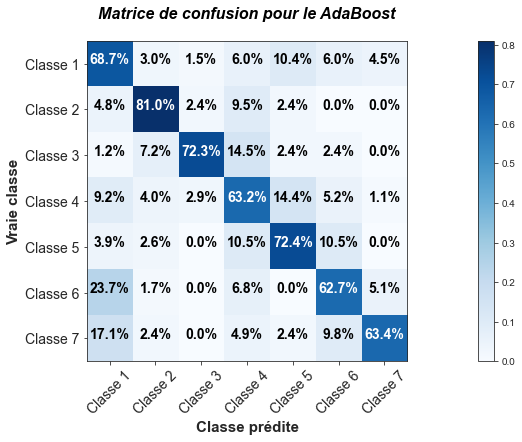

In [225]:
# AdaBoost
model = AdaBoostClassifier(n_estimators = 100 ,random_state = 0, learning_rate = 0.1)
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le AdaBoost', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_AB_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_AB_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### Extra Trees

              precision    recall  f1-score   support

    Classe 1       0.66      0.69      0.67        67
    Classe 2       0.71      0.88      0.79        42
    Classe 3       0.86      0.89      0.88        83
    Classe 4       0.84      0.71      0.77       174
    Classe 5       0.66      0.80      0.73        76
    Classe 6       0.83      0.68      0.75        59
    Classe 7       0.76      0.85      0.80        41

    accuracy                           0.77       542
   macro avg       0.76      0.79      0.77       542
weighted avg       0.78      0.77      0.77       542



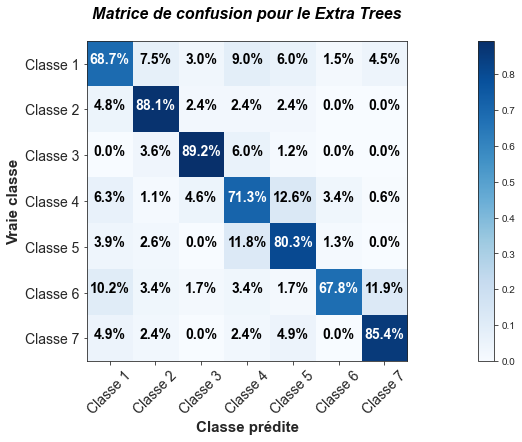

In [223]:
# Extra Trees
model = ExtraTreesClassifier(criterion="entropy", n_estimators = 150, max_depth = 7, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_M_cora, Y_train_M_cora)
Y_pred = model.predict(X_test_M_cora)
print(classification_report(Y_test_M_cora, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"]))
cnf_matrix = confusion_matrix(Y_test_M_cora, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Extra Trees', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6","Classe 7"], rounding = ".1%")
# Stocker les métriques
f1_ET_M_Cora = f1_score(Y_test_M_cora, Y_pred, average = "macro")
acc_ET_M_Cora = accuracy_score(Y_test_M_cora, Y_pred)

###### Résultats et comparaisons

| <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_M_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_M_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_M_Cora * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_LR_M_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_DT_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_M_Cora * 100, 2))+'%'}}</center> |
| <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_M_Cora * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_SVMLIN_M_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_SVMNLIN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_M_Cora * 100, 2))+'%'}}</center> |

Pour la deuxième représentation $M$, nous constatons la meilleure performance a été obtenue par la **régression logisitique**, encore une fois, en terme de mesure **F1-Score** mais pour l'**accuracy** c'est le **SVM linéaire** qui l'a emporté. Nous remarquons qu'en géneral, les algorithmes **LDA**, **SVM**(linéaire ou non linéaire) et la **régression logistique** ont fourni des résultats presque similaires. Nous avons remarqué également que les résultats obtenus à l'aide de la représentation $M$ sont beaucoup meilleures que ceux obtenus avec la représentation $X$. Finalement, nous constatons que les algorithmes basées sur les arbres de décision performent mieux sur la matrice $M$ par rapport à $X$.

#### Jeu de données CiteSeer <a class="anchor" id="cs"></a>

###### Première représentation <a class="anchor" id="cs1"></a>  $X$

###### Bayesien Naïf

              precision    recall  f1-score   support

    Classe 1       0.21      0.67      0.32        52
    Classe 2       0.75      0.54      0.63       125
    Classe 3       0.73      0.55      0.63       132
    Classe 4       0.85      0.52      0.65       145
    Classe 5       0.73      0.79      0.76       118
    Classe 6       0.67      0.66      0.66        94

    accuracy                           0.61       666
   macro avg       0.66      0.62      0.61       666
weighted avg       0.71      0.61      0.64       666



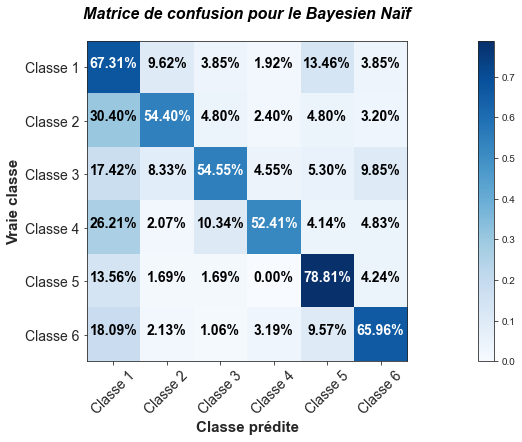

In [233]:
# Bayesien Naïf
model = ComplementNB(alpha=0.1)
model.fit(X_train_X_citeseer_norm, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer_norm)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Bayesien Naïf', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_NB_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_NB_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### KNN

              precision    recall  f1-score   support

    Classe 1       0.13      0.52      0.21        52
    Classe 2       0.54      0.30      0.39       125
    Classe 3       0.57      0.45      0.50       132
    Classe 4       0.73      0.46      0.56       145
    Classe 5       0.66      0.53      0.59       118
    Classe 6       0.45      0.49      0.47        94

    accuracy                           0.45       666
   macro avg       0.51      0.46      0.45       666
weighted avg       0.56      0.45      0.48       666



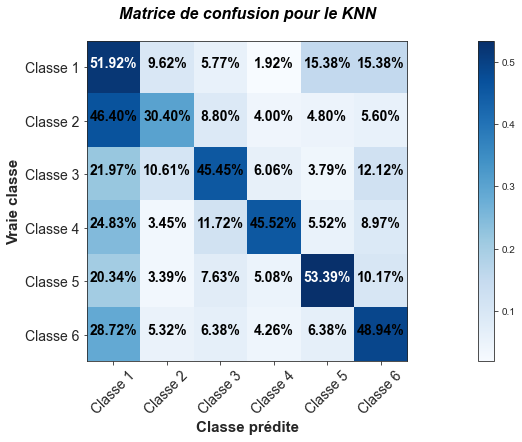

In [250]:
# KNN
model = KNeighborsClassifier(n_neighbors = 1, metric='chebyshev', n_jobs=5)
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le KNN', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_KNN_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_KNN_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### LDA

              precision    recall  f1-score   support

    Classe 1       0.36      0.46      0.41        52
    Classe 2       0.68      0.58      0.62       125
    Classe 3       0.66      0.73      0.70       132
    Classe 4       0.76      0.73      0.74       145
    Classe 5       0.78      0.80      0.79       118
    Classe 6       0.75      0.70      0.73        94

    accuracy                           0.69       666
   macro avg       0.67      0.67      0.66       666
weighted avg       0.70      0.69      0.69       666



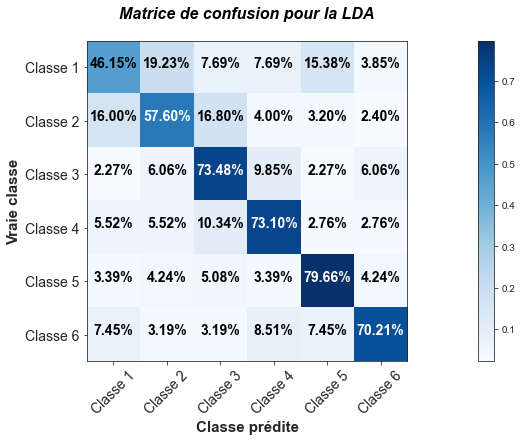

In [251]:
# LDA
while True:
    try:
        model = LDA(solver = "svd")
        model.fit(X_train_X_citeseer, Y_train_X_citeseer)
        Y_pred = model.predict(X_test_X_citeseer)
        print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
        cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la LDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
        # Stocker les métriques
        f1_LDA_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
        acc_LDA_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### QDA

c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: U

              precision    recall  f1-score   support

    Classe 1       1.00      0.12      0.21        52
    Classe 2       0.00      0.00      0.00       125
    Classe 3       1.00      0.01      0.02       132
    Classe 4       0.22      1.00      0.36       145
    Classe 5       0.00      0.00      0.00       118
    Classe 6       0.00      0.00      0.00        94

    accuracy                           0.23       666
   macro avg       0.37      0.19      0.10       666
weighted avg       0.32      0.23      0.10       666



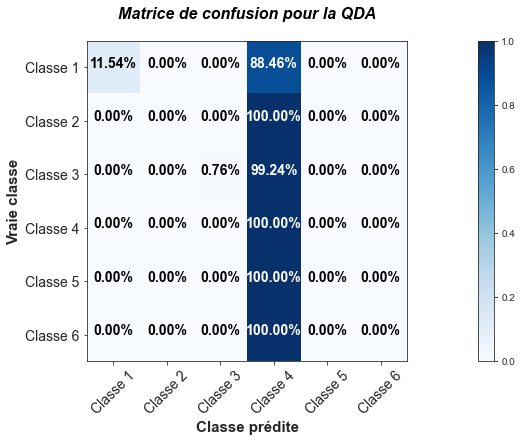

In [252]:
# QDA
while True:
    try:
        model = QDA()
        model.fit(X_train_X_citeseer, Y_train_X_citeseer)
        Y_pred = model.predict(X_test_X_citeseer)
        print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
        cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la QDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
        # Stocker les métriques
        f1_QDA_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
        acc_QDA_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### SVM linéaire

              precision    recall  f1-score   support

    Classe 1       0.42      0.54      0.47        52
    Classe 2       0.68      0.68      0.68       125
    Classe 3       0.70      0.77      0.73       132
    Classe 4       0.79      0.74      0.76       145
    Classe 5       0.82      0.80      0.81       118
    Classe 6       0.72      0.63      0.67        94

    accuracy                           0.71       666
   macro avg       0.69      0.69      0.69       666
weighted avg       0.72      0.71      0.71       666



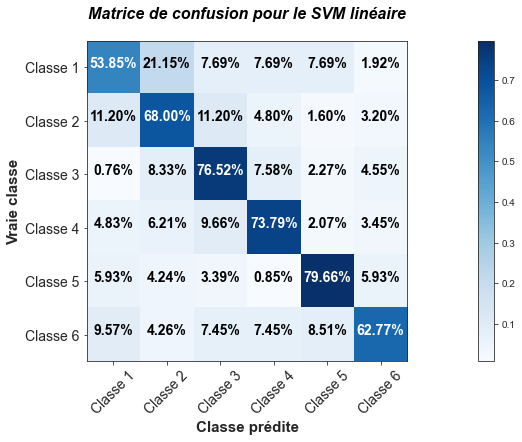

In [256]:
# SVM linéaire
model = svm.SVC(C = 0.1, kernel = 'linear')
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_SVMLIN_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_SVMLIN_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### SVM non linéaire

              precision    recall  f1-score   support

    Classe 1       0.42      0.56      0.48        52
    Classe 2       0.72      0.70      0.71       125
    Classe 3       0.73      0.74      0.74       132
    Classe 4       0.78      0.74      0.76       145
    Classe 5       0.83      0.86      0.84       118
    Classe 6       0.76      0.66      0.70        94

    accuracy                           0.73       666
   macro avg       0.71      0.71      0.71       666
weighted avg       0.74      0.73      0.73       666



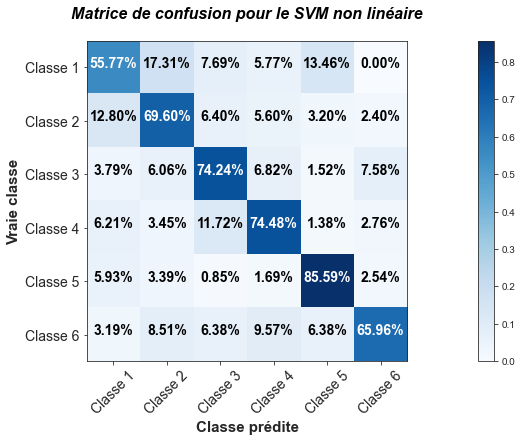

In [260]:
# SVM non linéaire
model = svm.NuSVC(kernel = 'linear')
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM non linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_SVMNLIN_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_SVMNLIN_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### Régression logistique

              precision    recall  f1-score   support

    Classe 1       0.48      0.48      0.48        52
    Classe 2       0.69      0.66      0.67       125
    Classe 3       0.71      0.73      0.72       132
    Classe 4       0.76      0.77      0.76       145
    Classe 5       0.80      0.84      0.82       118
    Classe 6       0.81      0.73      0.77        94

    accuracy                           0.73       666
   macro avg       0.71      0.70      0.70       666
weighted avg       0.73      0.73      0.73       666



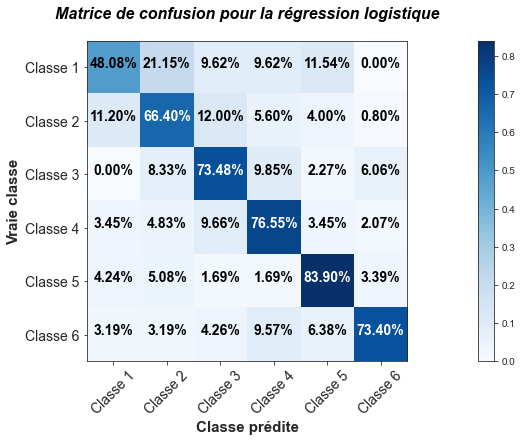

In [265]:
# Régression logistique
model = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 0, penalty = "l2")
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la régression logistique', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_LR_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_LR_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### CART

              precision    recall  f1-score   support

    Classe 1       0.17      0.27      0.21        52
    Classe 2       0.44      0.60      0.51       125
    Classe 3       0.68      0.47      0.56       132
    Classe 4       0.66      0.67      0.67       145
    Classe 5       0.67      0.59      0.63       118
    Classe 6       0.53      0.41      0.46        94

    accuracy                           0.54       666
   macro avg       0.53      0.50      0.51       666
weighted avg       0.57      0.54      0.54       666



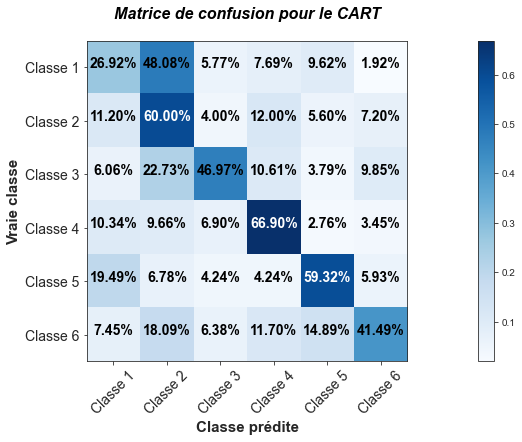

In [270]:
# CART
model = DecisionTreeClassifier(criterion="gini", max_depth = 6, random_state = 0, splitter = "best", min_samples_split = 2)
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le CART', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_DT_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_DT_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### Random Forest

              precision    recall  f1-score   support

    Classe 1       0.38      0.17      0.24        52
    Classe 2       0.55      0.57      0.56       125
    Classe 3       0.58      0.60      0.59       132
    Classe 4       0.60      0.63      0.61       145
    Classe 5       0.65      0.69      0.67       118
    Classe 6       0.54      0.55      0.54        94

    accuracy                           0.58       666
   macro avg       0.55      0.54      0.53       666
weighted avg       0.57      0.58      0.57       666



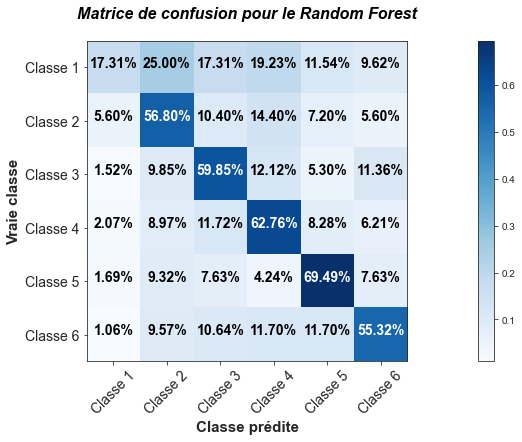

In [276]:
# Random Forest
model = RandomForestClassifier(criterion="entropy", n_estimators = 60, max_depth = 11, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Random Forest', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_RF_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_RF_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### Gradient Boosting

              precision    recall  f1-score   support

    Classe 1       0.28      0.21      0.24        52
    Classe 2       0.54      0.64      0.59       125
    Classe 3       0.69      0.64      0.66       132
    Classe 4       0.72      0.74      0.73       145
    Classe 5       0.74      0.77      0.76       118
    Classe 6       0.65      0.59      0.61        94

    accuracy                           0.64       666
   macro avg       0.60      0.60      0.60       666
weighted avg       0.64      0.64      0.64       666



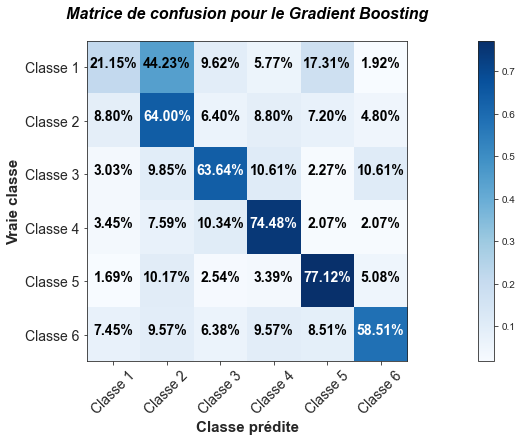

In [292]:
# Gradient Boosting
model = GradientBoostingClassifier(criterion="friedman_mse", n_estimators = 50, learning_rate = 0.1, max_depth = 5, random_state = 0, min_samples_split = 2)
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Gradient Boosting', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_GB_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_GB_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### AdaBoost

              precision    recall  f1-score   support

    Classe 1       0.20      0.25      0.22        52
    Classe 2       0.48      0.58      0.53       125
    Classe 3       0.70      0.61      0.65       132
    Classe 4       0.71      0.63      0.67       145
    Classe 5       0.80      0.76      0.78       118
    Classe 6       0.59      0.59      0.59        94

    accuracy                           0.61       666
   macro avg       0.58      0.57      0.57       666
weighted avg       0.62      0.61      0.61       666



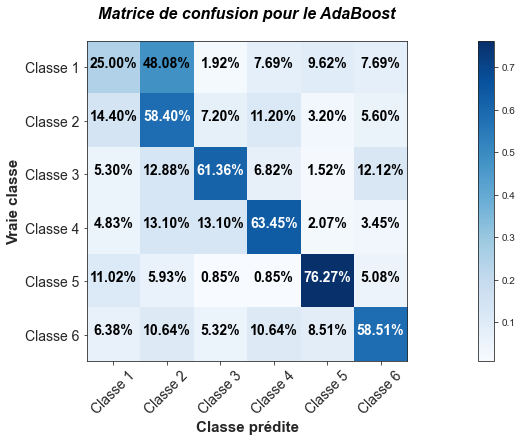

In [289]:
# AdaBoost
model = AdaBoostClassifier(n_estimators = 100 ,random_state = 0, learning_rate = 0.1)
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le AdaBoost', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_AB_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_AB_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### Extra Trees

              precision    recall  f1-score   support

    Classe 1       0.29      0.23      0.26        52
    Classe 2       0.56      0.61      0.58       125
    Classe 3       0.72      0.61      0.66       132
    Classe 4       0.70      0.74      0.72       145
    Classe 5       0.75      0.83      0.79       118
    Classe 6       0.66      0.65      0.65        94

    accuracy                           0.65       666
   macro avg       0.61      0.61      0.61       666
weighted avg       0.65      0.65      0.65       666



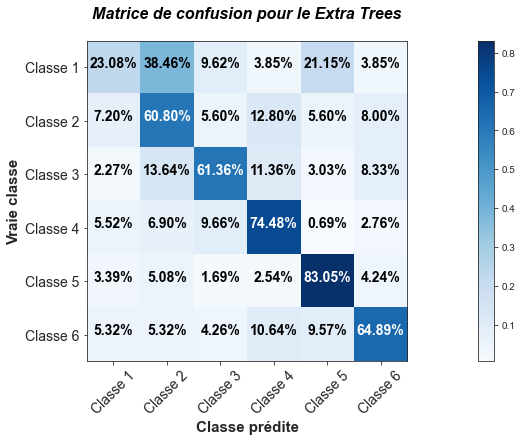

In [285]:
# Extra Trees
model = ExtraTreesClassifier(criterion="entropy", n_estimators = 500, max_depth = 6, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_X_citeseer, Y_train_X_citeseer)
Y_pred = model.predict(X_test_X_citeseer)
print(classification_report(Y_test_X_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_X_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Extra Trees', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_ET_X_CiteSeer = f1_score(Y_test_X_citeseer, Y_pred, average = "macro")
acc_ET_X_CiteSeer = accuracy_score(Y_test_X_citeseer, Y_pred)

###### Résultats et comparaisons

| <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_X_CiteSeer * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_X_CiteSeer * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_X_CiteSeer * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_SVMNLIN_X_CiteSeer * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_LR_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_X_CiteSeer * 100, 2))+'%'}}</center> |
| <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_X_CiteSeer * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_SVMNLIN_X_CiteSeer * 100, 2))+'%'}}</center></b> |<center>{{str(round(acc_LR_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_X_CiteSeer * 100, 2))+'%'}}</center> |

Concernant le jeu de données **CiteSeer** et pour la représentation $X$, les meilleurs resultats, en terme des deux métriques, ont été obtenus à travers l'algirthme **SVM non linéaire**. La **régression logistique** et le **SVM linéaire** ont fourni également des résultats très similaires. Les algorithmes basés sur les arbres de décision continuent à fournir des résultats moyens.

###### Deuxième représentation <a class="anchor" id="cs2"></a> $M=D^{-1}*W*X$

###### Bayesien Naïf

              precision    recall  f1-score   support

    Classe 1       0.37      0.42      0.40        52
    Classe 2       0.73      0.64      0.68       125
    Classe 3       0.70      0.67      0.69       132
    Classe 4       0.72      0.74      0.73       145
    Classe 5       0.70      0.82      0.76       118
    Classe 6       0.76      0.67      0.71        94

    accuracy                           0.69       666
   macro avg       0.66      0.66      0.66       666
weighted avg       0.69      0.69      0.69       666



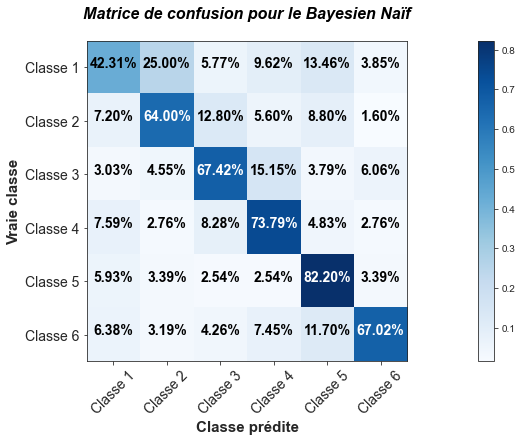

In [293]:
# Bayesien Naïf
model = ComplementNB(alpha=0.1)
model.fit(X_train_M_citeseer_norm, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer_norm)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Bayesien Naïf', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_NB_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_NB_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### KNN

              precision    recall  f1-score   support

    Classe 1       0.26      0.44      0.33        52
    Classe 2       0.61      0.66      0.63       125
    Classe 3       0.53      0.73      0.61       132
    Classe 4       0.89      0.43      0.58       145
    Classe 5       0.76      0.74      0.75       118
    Classe 6       0.82      0.62      0.70        94

    accuracy                           0.62       666
   macro avg       0.64      0.60      0.60       666
weighted avg       0.68      0.62      0.62       666



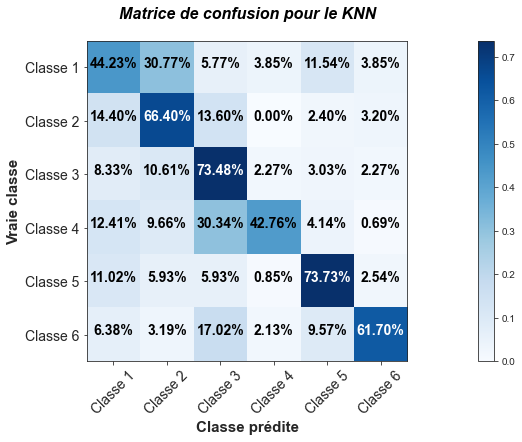

In [300]:
# KNN
model = KNeighborsClassifier(n_neighbors = 6, p=2, metric='minkowski', n_jobs=5)
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le KNN', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_KNN_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_KNN_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### LDA

              precision    recall  f1-score   support

    Classe 1       0.31      0.42      0.35        52
    Classe 2       0.69      0.65      0.67       125
    Classe 3       0.68      0.70      0.69       132
    Classe 4       0.78      0.72      0.75       145
    Classe 5       0.75      0.73      0.74       118
    Classe 6       0.75      0.72      0.74        94

    accuracy                           0.68       666
   macro avg       0.66      0.66      0.66       666
weighted avg       0.70      0.68      0.69       666



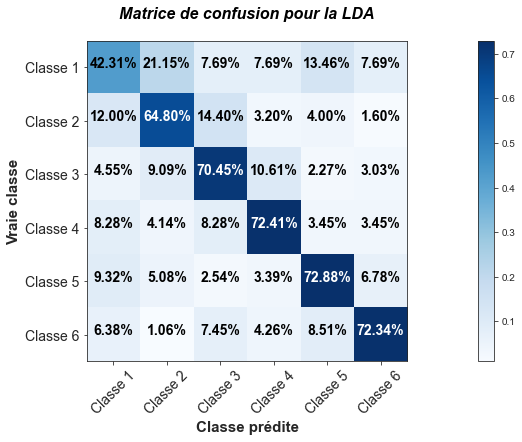

In [301]:
# LDA
while True:
    try:
        model = LDA(solver = "svd")
        model.fit(X_train_M_citeseer, Y_train_M_citeseer)
        Y_pred = model.predict(X_test_M_citeseer)
        print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
        cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la LDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
        # Stocker les métriques
        f1_LDA_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
        acc_LDA_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### QDA

c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

    Classe 1       0.60      0.17      0.27        52
    Classe 2       0.80      0.41      0.54       125
    Classe 3       0.54      0.77      0.63       132
    Classe 4       0.56      0.77      0.65       145
    Classe 5       0.63      0.74      0.68       118
    Classe 6       0.84      0.54      0.66        94

    accuracy                           0.62       666
   macro avg       0.66      0.57      0.57       666
weighted avg       0.65      0.62      0.60       666



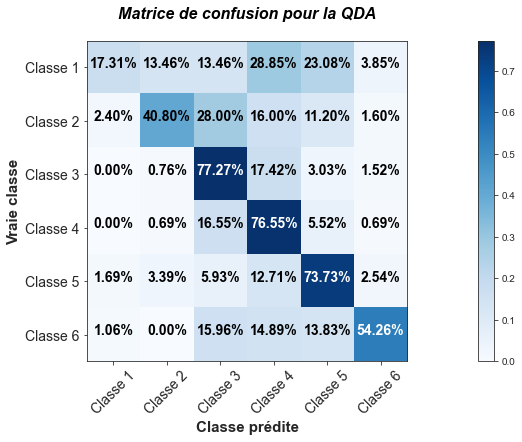

In [302]:
# QDA
while True:
    try:
        model = QDA()
        model.fit(X_train_M_citeseer, Y_train_M_citeseer)
        Y_pred = model.predict(X_test_M_citeseer)
        print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
        cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la QDA', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
        # Stocker les métriques
        f1_QDA_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
        acc_QDA_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### SVM linéaire

              precision    recall  f1-score   support

    Classe 1       0.36      0.37      0.36        52
    Classe 2       0.68      0.72      0.70       125
    Classe 3       0.68      0.71      0.70       132
    Classe 4       0.80      0.76      0.78       145
    Classe 5       0.79      0.78      0.78       118
    Classe 6       0.80      0.74      0.77        94

    accuracy                           0.71       666
   macro avg       0.68      0.68      0.68       666
weighted avg       0.72      0.71      0.71       666



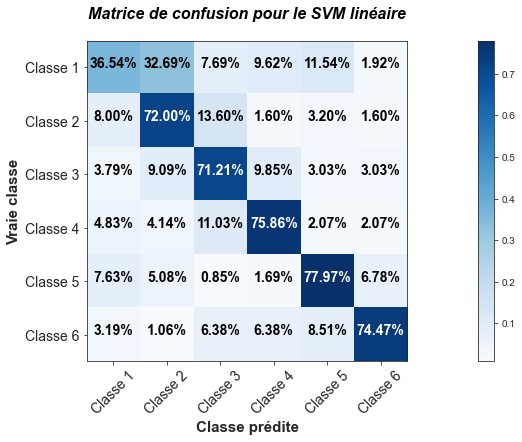

In [305]:
# SVM linéaire
model = svm.SVC(C = 0.1, kernel = 'linear')
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_SVMLIN_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_SVMLIN_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### SVM non linéaire

              precision    recall  f1-score   support

    Classe 1       0.40      0.40      0.40        52
    Classe 2       0.66      0.70      0.68       125
    Classe 3       0.67      0.70      0.68       132
    Classe 4       0.79      0.75      0.77       145
    Classe 5       0.78      0.82      0.80       118
    Classe 6       0.77      0.68      0.72        94

    accuracy                           0.71       666
   macro avg       0.68      0.68      0.68       666
weighted avg       0.71      0.71      0.71       666



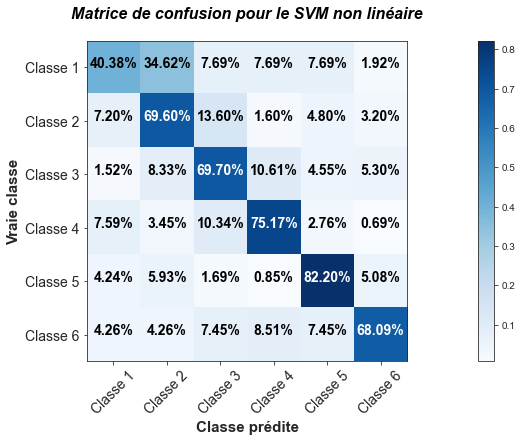

In [306]:
# SVM non linéaire
model = svm.NuSVC(kernel = 'linear')
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM non linéaire', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_SVMNLIN_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_SVMNLIN_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### Régression logistique

              precision    recall  f1-score   support

    Classe 1       0.37      0.33      0.35        52
    Classe 2       0.67      0.70      0.69       125
    Classe 3       0.69      0.71      0.70       132
    Classe 4       0.79      0.75      0.77       145
    Classe 5       0.76      0.83      0.79       118
    Classe 6       0.77      0.71      0.74        94

    accuracy                           0.71       666
   macro avg       0.67      0.67      0.67       666
weighted avg       0.71      0.71      0.71       666



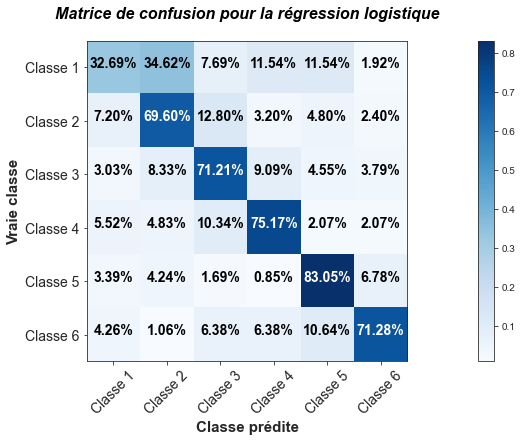

In [309]:
# Régression logistique
model = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 0, penalty = "l2")
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la régression logistique', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_LR_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_LR_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### CART

              precision    recall  f1-score   support

    Classe 1       0.20      0.27      0.23        52
    Classe 2       0.49      0.60      0.54       125
    Classe 3       0.61      0.52      0.56       132
    Classe 4       0.76      0.62      0.68       145
    Classe 5       0.69      0.70      0.70       118
    Classe 6       0.57      0.56      0.57        94

    accuracy                           0.58       666
   macro avg       0.55      0.55      0.55       666
weighted avg       0.60      0.58      0.58       666



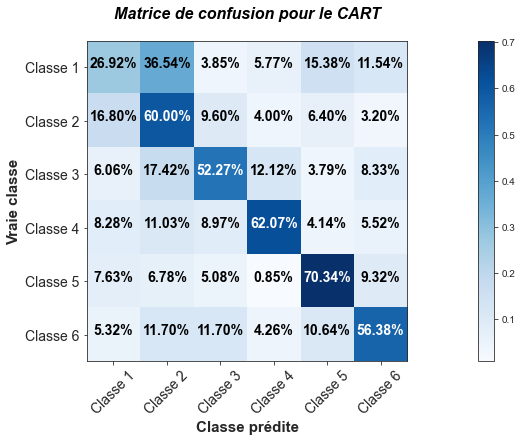

In [313]:
# CART
model = DecisionTreeClassifier(criterion="gini", max_depth = 6, random_state = 0, splitter = "best", min_samples_split = 2)
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le CART', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_DT_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_DT_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### Random Forest

              precision    recall  f1-score   support

    Classe 1       0.32      0.23      0.27        52
    Classe 2       0.62      0.60      0.61       125
    Classe 3       0.67      0.68      0.67       132
    Classe 4       0.71      0.73      0.72       145
    Classe 5       0.73      0.80      0.76       118
    Classe 6       0.69      0.70      0.69        94

    accuracy                           0.67       666
   macro avg       0.62      0.62      0.62       666
weighted avg       0.66      0.67      0.66       666



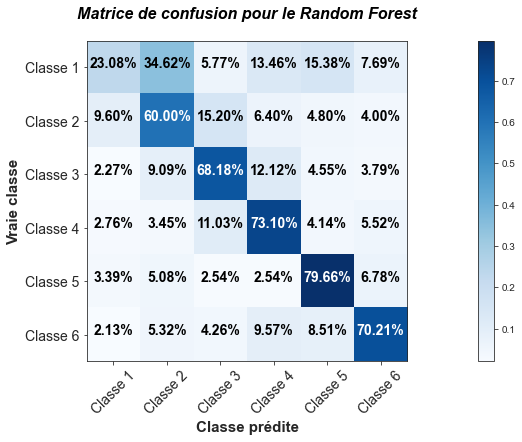

In [318]:
# Random Forest
model = RandomForestClassifier(criterion="entropy", n_estimators = 60, max_depth = 11, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Random Forest', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_RF_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_RF_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### Gradient Boosting

              precision    recall  f1-score   support

    Classe 1       0.39      0.23      0.29        52
    Classe 2       0.64      0.66      0.65       125
    Classe 3       0.67      0.67      0.67       132
    Classe 4       0.74      0.77      0.75       145
    Classe 5       0.75      0.84      0.79       118
    Classe 6       0.72      0.70      0.71        94

    accuracy                           0.69       666
   macro avg       0.65      0.64      0.64       666
weighted avg       0.68      0.69      0.68       666



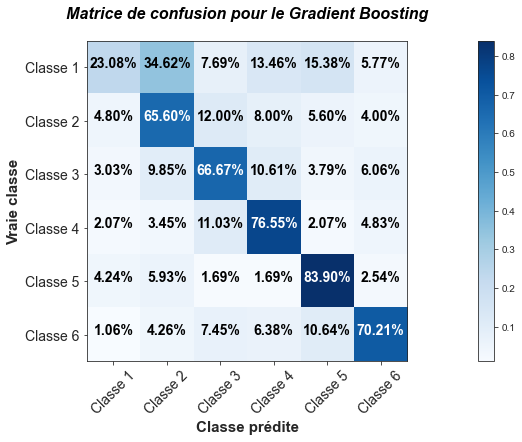

In [329]:
# Gradient Boosting
model = GradientBoostingClassifier(criterion="friedman_mse", n_estimators = 50, learning_rate = 0.1, max_depth = 5, random_state = 0, min_samples_split = 2)
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Gradient Boosting', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_GB_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_GB_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### AdaBoost

              precision    recall  f1-score   support

    Classe 1       0.18      0.37      0.24        52
    Classe 2       0.60      0.50      0.54       125
    Classe 3       0.60      0.64      0.62       132
    Classe 4       0.77      0.61      0.68       145
    Classe 5       0.77      0.78      0.77       118
    Classe 6       0.71      0.61      0.66        94

    accuracy                           0.61       666
   macro avg       0.60      0.58      0.59       666
weighted avg       0.65      0.61      0.62       666



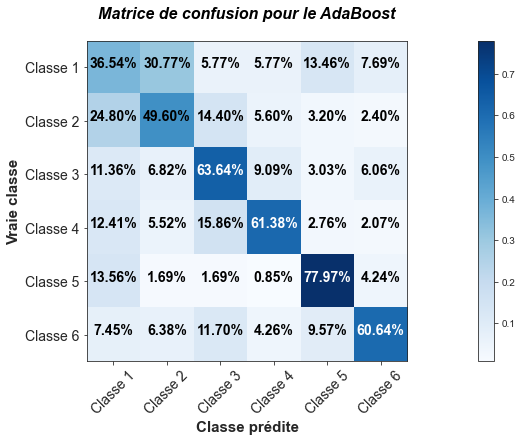

In [326]:
# AdaBoost
model = AdaBoostClassifier(n_estimators = 50 ,random_state = 0, learning_rate = 0.1)
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le AdaBoost', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_AB_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_AB_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### Extra Trees

              precision    recall  f1-score   support

    Classe 1       0.33      0.29      0.31        52
    Classe 2       0.57      0.52      0.54       125
    Classe 3       0.67      0.60      0.63       132
    Classe 4       0.64      0.76      0.70       145
    Classe 5       0.75      0.75      0.75       118
    Classe 6       0.62      0.65      0.63        94

    accuracy                           0.63       666
   macro avg       0.60      0.59      0.59       666
weighted avg       0.63      0.63      0.63       666



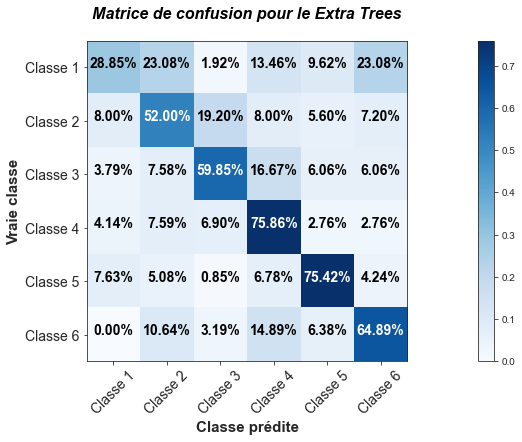

In [322]:
# Extra Trees
model = ExtraTreesClassifier(criterion="entropy", n_estimators = 100, max_depth = 6, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_M_citeseer, Y_train_M_citeseer)
Y_pred = model.predict(X_test_M_citeseer)
print(classification_report(Y_test_M_citeseer, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"]))
cnf_matrix = confusion_matrix(Y_test_M_citeseer, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Extra Trees', classes = ["Classe 1","Classe 2","Classe 3","Classe 4","Classe 5","Classe 6"])
# Stocker les métriques
f1_ET_M_CiteSeer = f1_score(Y_test_M_citeseer, Y_pred, average = "macro")
acc_ET_M_CiteSeer = accuracy_score(Y_test_M_citeseer, Y_pred)

###### Résultats et comparaisons

| <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_M_CiteSeer * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_M_CiteSeer * 100, 2))+'%'}}<center> | <b><center>{{str(round(f1_SVMLIN_M_CiteSeer * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_SVMNLIN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LR_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_M_CiteSeer * 100, 2))+'%'}}</center> |
| <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_M_CiteSeer * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_SVMLIN_M_CiteSeer * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_SVMNLIN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_M_CiteSeer * 100, 2))+'%'}}</center> |

Nous remarquons que cette fois-ci et contrairement au jeu de données **Cora**, les résultats obtenus sous la représentation $M$ sont moins bons que ceux obtenus avec la représentation $X$. Comme d'habitude, les meilleurs résultats ont été fournis par le **SVM** et la **régression logistique** avec une petite supériorité au **SVM linéaire**.

#### Jeu de données Pubmed <a class="anchor" id="p"></a>

###### Première représentation <a class="anchor" id="p1"></a>  $X$

              precision    recall  f1-score   support

    Classe 1       0.71      0.95      0.81       852
    Classe 2       0.77      0.85      0.81      1574
    Classe 3       0.90      0.63      0.74      1518

    accuracy                           0.79      3944
   macro avg       0.79      0.81      0.79      3944
weighted avg       0.81      0.79      0.78      3944



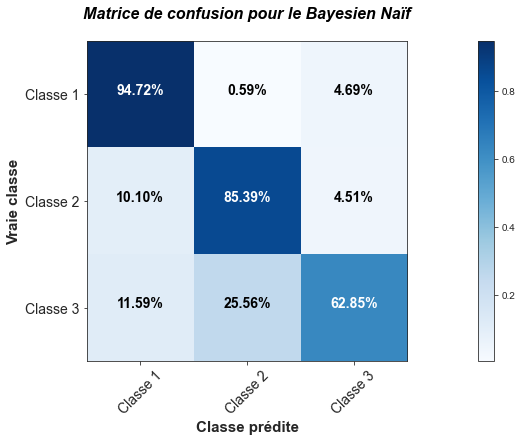

In [332]:
# Bayesien Naïf
model = ComplementNB(alpha=0.1)
model.fit(X_train_X_pubmed_norm, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed_norm)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Bayesien Naïf', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_NB_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_NB_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### KNN

              precision    recall  f1-score   support

    Classe 1       0.64      0.94      0.76       852
    Classe 2       0.76      0.83      0.79      1574
    Classe 3       0.87      0.56      0.68      1518

    accuracy                           0.75      3944
   macro avg       0.76      0.78      0.74      3944
weighted avg       0.78      0.75      0.74      3944



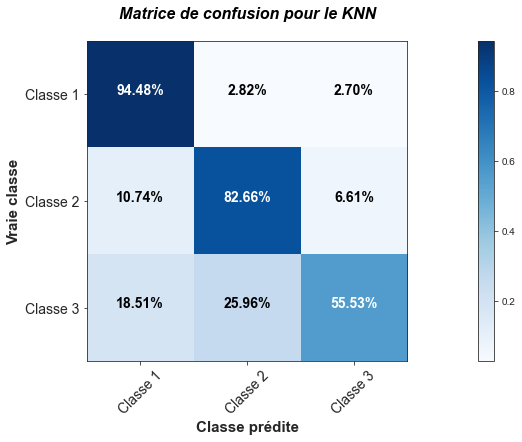

In [337]:
# KNN
model = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski', n_jobs=5)
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le KNN', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_KNN_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_KNN_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### LDA

              precision    recall  f1-score   support

    Classe 1       0.83      0.92      0.87       852
    Classe 2       0.87      0.89      0.88      1574
    Classe 3       0.89      0.81      0.85      1518

    accuracy                           0.87      3944
   macro avg       0.86      0.87      0.87      3944
weighted avg       0.87      0.87      0.87      3944



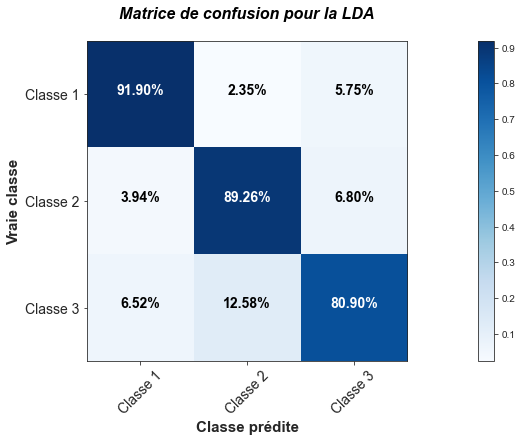

In [338]:
# LDA
while True:
    try:
        model = LDA(solver = "svd")
        model.fit(X_train_X_pubmed, Y_train_X_pubmed)
        Y_pred = model.predict(X_test_X_pubmed)
        print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
        cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la LDA', classes = ["Classe 1","Classe 2","Classe 3"])
        # Stocker les métriques
        f1_LDA_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
        acc_LDA_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### QDA

c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

    Classe 1       0.74      0.88      0.81       852
    Classe 2       0.80      0.85      0.83      1574
    Classe 3       0.84      0.69      0.76      1518

    accuracy                           0.80      3944
   macro avg       0.79      0.81      0.80      3944
weighted avg       0.80      0.80      0.80      3944



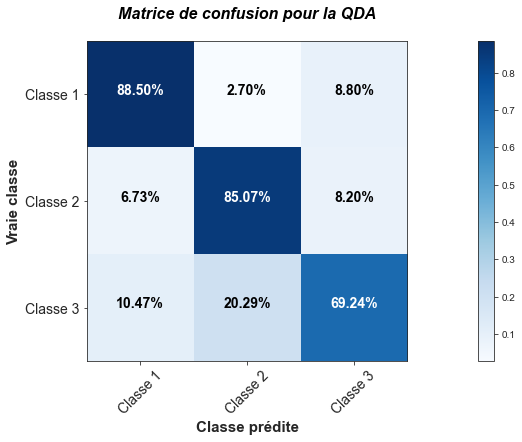

In [339]:
# QDA
while True:
    try:
        model = QDA()
        model.fit(X_train_X_pubmed, Y_train_X_pubmed)
        Y_pred = model.predict(X_test_X_pubmed)
        print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
        cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la QDA', classes = ["Classe 1","Classe 2","Classe 3"])
        # Stocker les métriques
        f1_QDA_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
        acc_QDA_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### SVM linéaire

              precision    recall  f1-score   support

    Classe 1       0.82      0.89      0.85       852
    Classe 2       0.87      0.85      0.86      1574
    Classe 3       0.83      0.81      0.82      1518

    accuracy                           0.84      3944
   macro avg       0.84      0.85      0.85      3944
weighted avg       0.85      0.84      0.84      3944



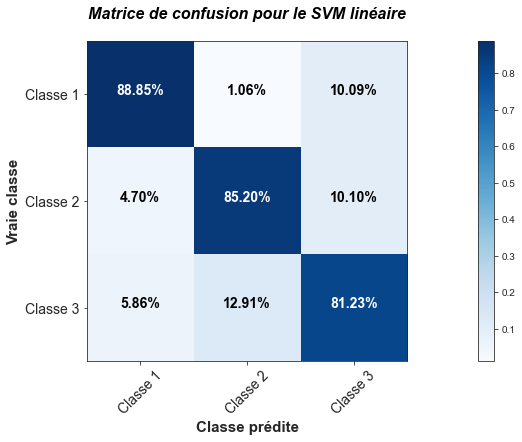

In [344]:
# SVM linéaire
model = svm.SVC(C = 0.1, kernel = 'rbf')
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM linéaire', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_SVMLIN_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_SVMLIN_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### SVM non linéaire

              precision    recall  f1-score   support

    Classe 1       0.81      0.87      0.84       852
    Classe 2       0.87      0.85      0.86      1574
    Classe 3       0.84      0.82      0.83      1518

    accuracy                           0.84      3944
   macro avg       0.84      0.85      0.84      3944
weighted avg       0.84      0.84      0.84      3944



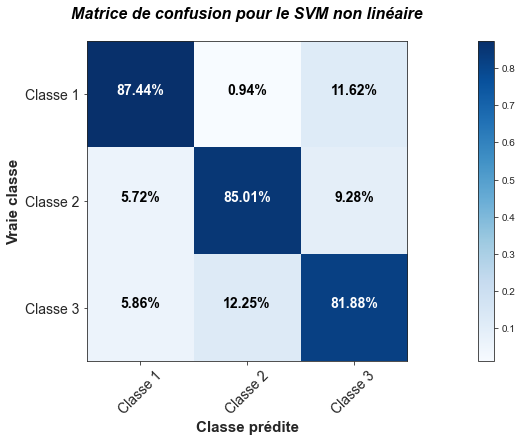

In [345]:
# SVM non linéaire
model = svm.NuSVC(kernel = 'rbf')
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM non linéaire', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_SVMNLIN_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_SVMNLIN_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### Régression logistique

              precision    recall  f1-score   support

    Classe 1       0.81      0.92      0.86       852
    Classe 2       0.81      0.90      0.85      1574
    Classe 3       0.90      0.71      0.80      1518

    accuracy                           0.84      3944
   macro avg       0.84      0.85      0.84      3944
weighted avg       0.84      0.84      0.83      3944



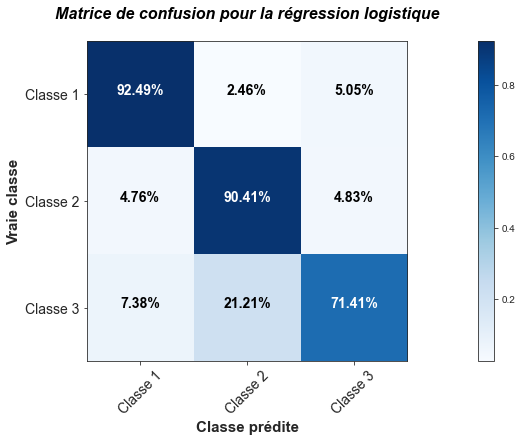

In [354]:
# Régression logistique
model = LogisticRegression(C = 0.1, solver = 'lbfgs', random_state = 0, penalty = "l2")
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la régression logistique', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_LR_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_LR_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### CART

              precision    recall  f1-score   support

    Classe 1       0.87      0.79      0.83       852
    Classe 2       0.81      0.83      0.82      1574
    Classe 3       0.77      0.79      0.78      1518

    accuracy                           0.81      3944
   macro avg       0.82      0.80      0.81      3944
weighted avg       0.81      0.81      0.81      3944



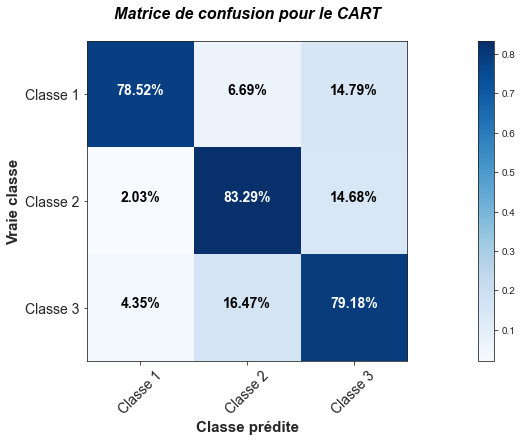

In [358]:
# CART
model = DecisionTreeClassifier(criterion="gini", max_depth = 6, random_state = 0, splitter = "best", min_samples_split = 2)
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le CART', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_DT_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_DT_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### Random Forest

              precision    recall  f1-score   support

    Classe 1       0.86      0.90      0.88       852
    Classe 2       0.86      0.90      0.88      1574
    Classe 3       0.88      0.81      0.84      1518

    accuracy                           0.87      3944
   macro avg       0.87      0.87      0.87      3944
weighted avg       0.87      0.87      0.87      3944



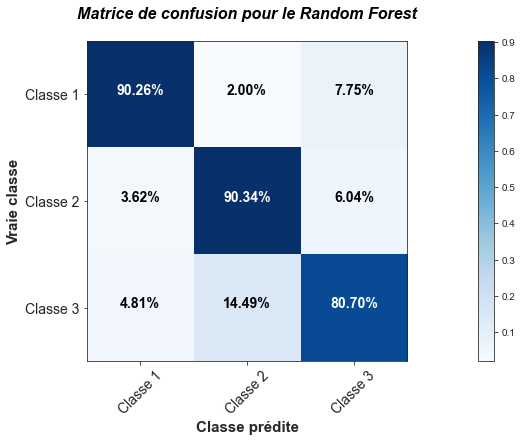

In [362]:
# Random Forest
model = RandomForestClassifier(criterion="entropy", n_estimators = 60, max_depth = 11, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Random Forest', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_RF_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_RF_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### Gradient Boosting

              precision    recall  f1-score   support

    Classe 1       0.88      0.90      0.89       852
    Classe 2       0.90      0.91      0.90      1574
    Classe 3       0.88      0.86      0.87      1518

    accuracy                           0.89      3944
   macro avg       0.89      0.89      0.89      3944
weighted avg       0.89      0.89      0.89      3944



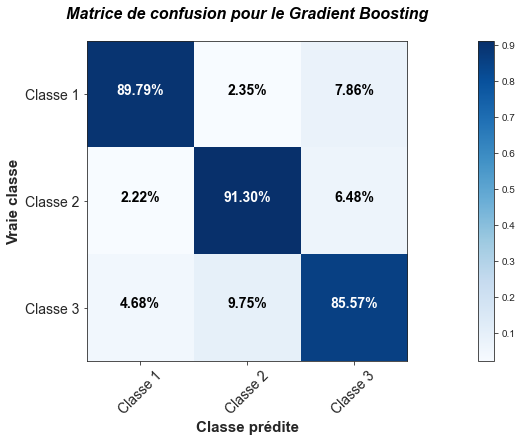

In [377]:
# Gradient Boosting
model = GradientBoostingClassifier(criterion="friedman_mse", n_estimators = 50, learning_rate = 0.1, max_depth = 5, random_state = 0, min_samples_split = 2)
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Gradient Boosting', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_GB_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_GB_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### AdaBoost

              precision    recall  f1-score   support

    Classe 1       0.83      0.86      0.84       852
    Classe 2       0.80      0.87      0.84      1574
    Classe 3       0.81      0.73      0.77      1518

    accuracy                           0.81      3944
   macro avg       0.82      0.82      0.82      3944
weighted avg       0.81      0.81      0.81      3944



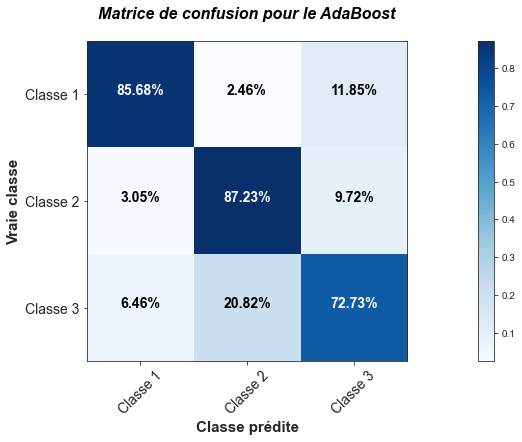

In [373]:
# AdaBoost
model = AdaBoostClassifier(n_estimators = 100 ,random_state = 0, learning_rate = 0.1)
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le AdaBoost', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_AB_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_AB_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### Extra Trees

              precision    recall  f1-score   support

    Classe 1       0.78      0.93      0.85       852
    Classe 2       0.82      0.89      0.85      1574
    Classe 3       0.90      0.72      0.80      1518

    accuracy                           0.83      3944
   macro avg       0.83      0.85      0.83      3944
weighted avg       0.84      0.83      0.83      3944



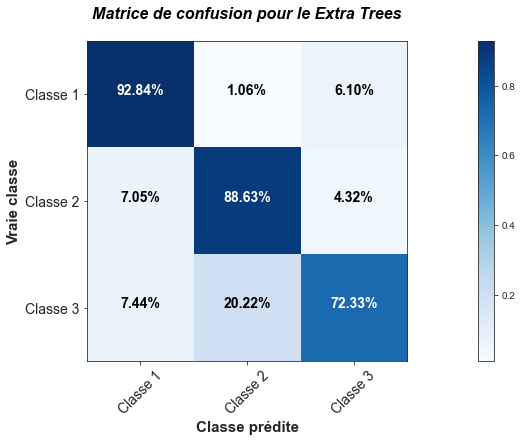

In [369]:
# Extra Trees
model = ExtraTreesClassifier(criterion="entropy", n_estimators = 100, max_depth = 9, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_X_pubmed, Y_train_X_pubmed)
Y_pred = model.predict(X_test_X_pubmed)
print(classification_report(Y_test_X_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_X_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Extra Trees', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_ET_X_Pubmed = f1_score(Y_test_X_pubmed, Y_pred, average = "macro")
acc_ET_X_Pubmed = accuracy_score(Y_test_X_pubmed, Y_pred)

###### Résultats et comparaisons

| <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_X_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_X_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LR_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_X_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_GB_X_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_AB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_X_Pubmed * 100, 2))+'%'}}</center> |
    | <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMNLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_X_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_GB_X_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_AB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_X_Pubmed * 100, 2))+'%'}}</center> |

Pour le jeu de données **Pubmed** et pour la représentation $X$, nous remarquons que généralement la performance est à peu prés bonne pour tous les algorithmes. les meilleurs résultats ont été obtenus à l'aide du **Gradient Boosting** qui a achevé une exellente performance de  presque **89%** en terme de **F1-Score**. Nous constatons également que le jeu de données **Pubmed** est celui avec les meilleurs résultats, cela peut être dû au fait qu'aucune réduction de dimension n'a été appliqué et donc l'information est complétement conservé. Nous pouvons aussi remarquer que les algorithmes basés sur les arbres de décision performent très bien dans ce cas contrairment aux cas précédents.

###### Deuxième représentation <a class="anchor" id="cs2"></a> $M=D^{-1}*W*X$

###### Bayesien Naïf

              precision    recall  f1-score   support

    Classe 1       0.65      0.88      0.74       852
    Classe 2       0.74      0.83      0.78      1574
    Classe 3       0.88      0.60      0.71      1518

    accuracy                           0.75      3944
   macro avg       0.76      0.77      0.75      3944
weighted avg       0.77      0.75      0.75      3944



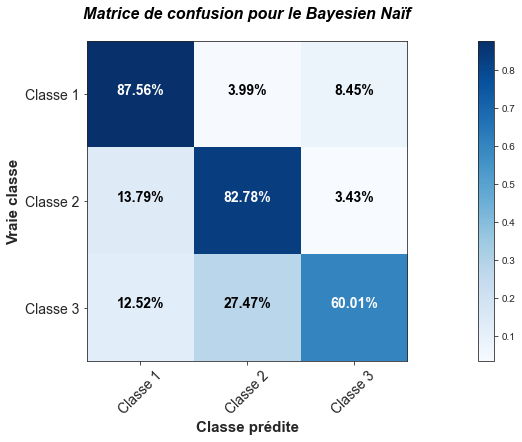

In [378]:
# Bayesien Naïf
model = ComplementNB(alpha=0.1)
model.fit(X_train_M_pubmed_norm, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed_norm)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Bayesien Naïf', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_NB_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_NB_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### KNN

              precision    recall  f1-score   support

    Classe 1       0.69      0.86      0.77       852
    Classe 2       0.83      0.84      0.84      1574
    Classe 3       0.86      0.73      0.79      1518

    accuracy                           0.80      3944
   macro avg       0.80      0.81      0.80      3944
weighted avg       0.81      0.80      0.81      3944



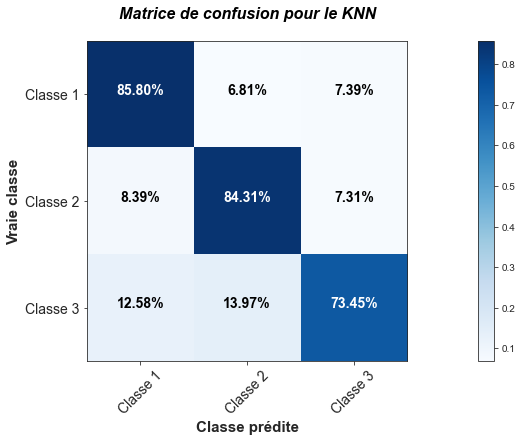

In [384]:
# KNN
model = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski', n_jobs=5)
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le KNN', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_KNN_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_KNN_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### LDA

              precision    recall  f1-score   support

    Classe 1       0.74      0.85      0.79       852
    Classe 2       0.83      0.86      0.85      1574
    Classe 3       0.86      0.76      0.81      1518

    accuracy                           0.82      3944
   macro avg       0.81      0.82      0.82      3944
weighted avg       0.82      0.82      0.82      3944



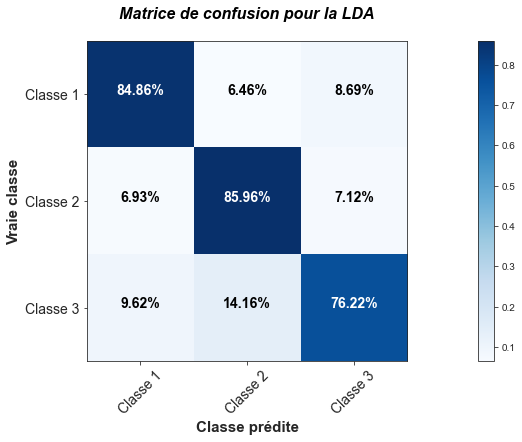

In [385]:
# LDA
while True:
    try:
        model = LDA(solver = "svd")
        model.fit(X_train_M_pubmed, Y_train_M_pubmed)
        Y_pred = model.predict(X_test_M_pubmed)
        print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
        cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la LDA', classes = ["Classe 1","Classe 2","Classe 3"])
        # Stocker les métriques
        f1_LDA_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
        acc_LDA_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### QDA

c:\users\ahmedpc\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

    Classe 1       0.66      0.83      0.73       852
    Classe 2       0.83      0.84      0.84      1574
    Classe 3       0.84      0.70      0.76      1518

    accuracy                           0.79      3944
   macro avg       0.77      0.79      0.78      3944
weighted avg       0.79      0.79      0.79      3944



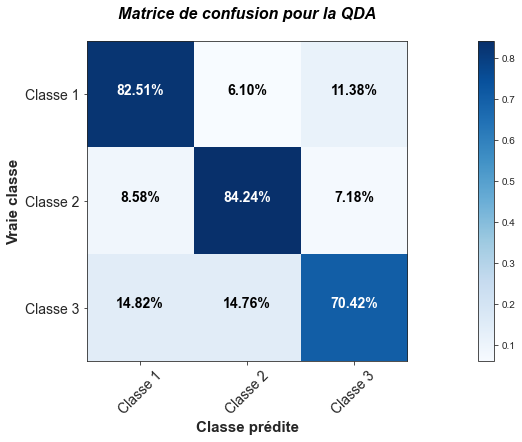

In [386]:
# QDA
while True:
    try:
        model = QDA()
        model.fit(X_train_M_pubmed, Y_train_M_pubmed)
        Y_pred = model.predict(X_test_M_pubmed)
        print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
        cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
        plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la QDA', classes = ["Classe 1","Classe 2","Classe 3"])
        # Stocker les métriques
        f1_QDA_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
        acc_QDA_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)
    except np.linalg.LinAlgError as err:
        if 'SVD did not converge' in str(err):
            continue
    break

###### SVM linéaire

              precision    recall  f1-score   support

    Classe 1       0.74      0.85      0.79       852
    Classe 2       0.84      0.84      0.84      1574
    Classe 3       0.85      0.78      0.81      1518

    accuracy                           0.82      3944
   macro avg       0.81      0.82      0.81      3944
weighted avg       0.82      0.82      0.82      3944



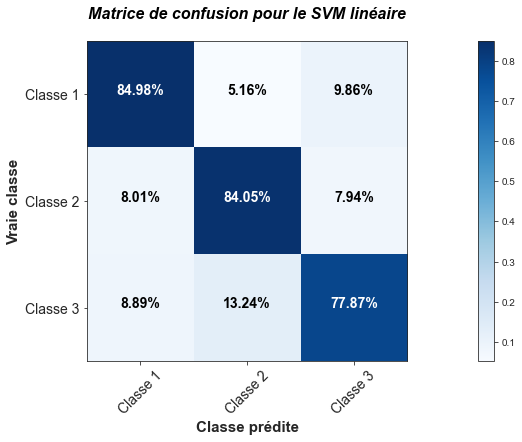

In [388]:
# SVM linéaire
model = svm.SVC(C = 0.1, kernel = 'rbf')
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM linéaire', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_SVMLIN_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_SVMLIN_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### SVM non linéaire

              precision    recall  f1-score   support

    Classe 1       0.73      0.84      0.78       852
    Classe 2       0.85      0.84      0.84      1574
    Classe 3       0.85      0.79      0.82      1518

    accuracy                           0.82      3944
   macro avg       0.81      0.82      0.82      3944
weighted avg       0.82      0.82      0.82      3944



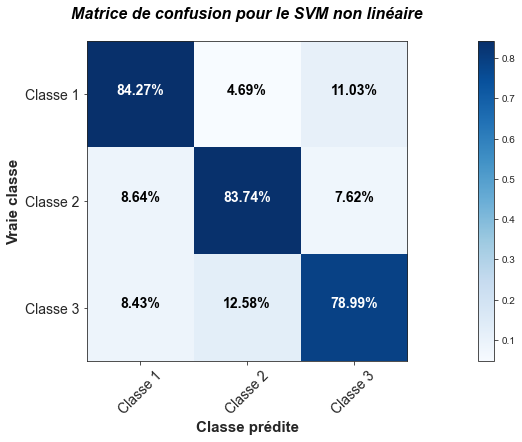

In [389]:
# SVM non linéaire
model = svm.NuSVC(kernel = 'rbf')
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le SVM non linéaire', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_SVMNLIN_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_SVMNLIN_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### Régression logistique

              precision    recall  f1-score   support

    Classe 1       0.72      0.85      0.78       852
    Classe 2       0.77      0.87      0.82      1574
    Classe 3       0.88      0.67      0.76      1518

    accuracy                           0.79      3944
   macro avg       0.79      0.79      0.78      3944
weighted avg       0.80      0.79      0.79      3944



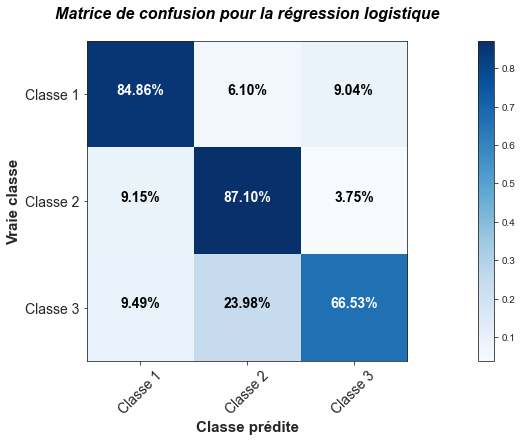

In [395]:
# Régression logistique
model = LogisticRegression(C = 0.1, solver = 'lbfgs', random_state = 0, penalty = "l2")
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour la régression logistique', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_LR_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_LR_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### CART

              precision    recall  f1-score   support

    Classe 1       0.69      0.77      0.72       852
    Classe 2       0.69      0.88      0.78      1574
    Classe 3       0.86      0.56      0.67      1518

    accuracy                           0.73      3944
   macro avg       0.75      0.73      0.72      3944
weighted avg       0.75      0.73      0.73      3944



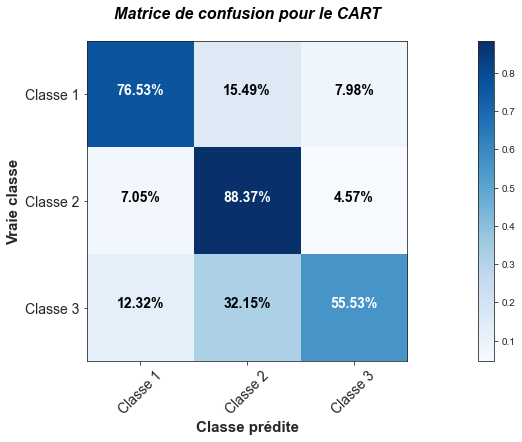

In [397]:
# CART
model = DecisionTreeClassifier(criterion="gini", max_depth = 6, random_state = 0, splitter = "best", min_samples_split = 2)
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le CART', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_DT_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_DT_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### Random Forest

              precision    recall  f1-score   support

    Classe 1       0.77      0.83      0.80       852
    Classe 2       0.83      0.88      0.85      1574
    Classe 3       0.86      0.76      0.81      1518

    accuracy                           0.82      3944
   macro avg       0.82      0.83      0.82      3944
weighted avg       0.83      0.82      0.82      3944



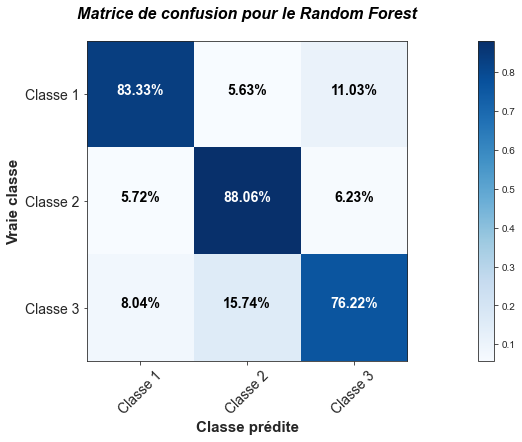

In [398]:
# Random Forest
model = RandomForestClassifier(criterion="entropy", n_estimators = 60, max_depth = 11, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Random Forest', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_RF_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_RF_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### Gradient Boosting

              precision    recall  f1-score   support

    Classe 1       0.76      0.84      0.80       852
    Classe 2       0.85      0.87      0.86      1574
    Classe 3       0.86      0.79      0.82      1518

    accuracy                           0.83      3944
   macro avg       0.82      0.83      0.83      3944
weighted avg       0.83      0.83      0.83      3944



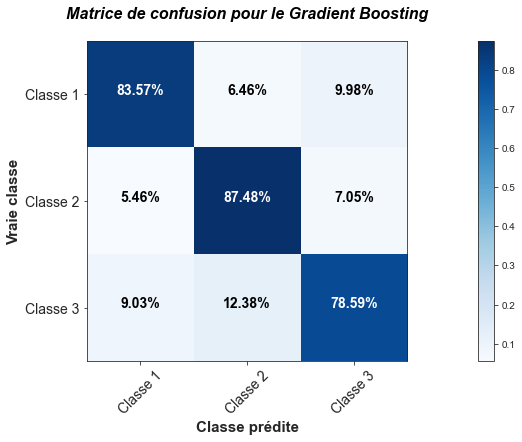

In [413]:
# Gradient Boosting
model = GradientBoostingClassifier(criterion="friedman_mse", n_estimators = 50, learning_rate = 0.1, max_depth = 5, random_state = 0, min_samples_split = 2)
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Gradient Boosting', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_GB_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_GB_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### AdaBoost

              precision    recall  f1-score   support

    Classe 1       0.70      0.79      0.74       852
    Classe 2       0.77      0.82      0.80      1574
    Classe 3       0.78      0.68      0.73      1518

    accuracy                           0.76      3944
   macro avg       0.75      0.76      0.75      3944
weighted avg       0.76      0.76      0.76      3944



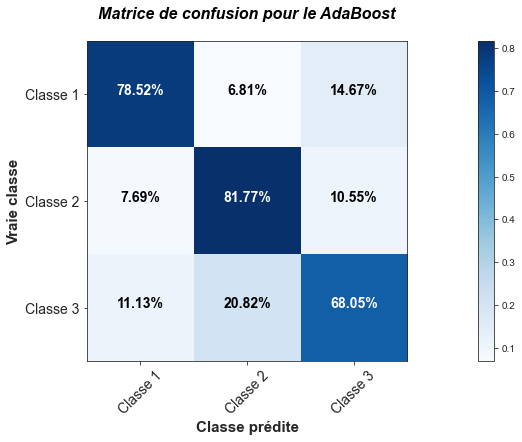

In [411]:
# AdaBoost
model = AdaBoostClassifier(n_estimators = 70 ,random_state = 0, learning_rate = 0.1)
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le AdaBoost', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_AB_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_AB_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### Extra Trees

              precision    recall  f1-score   support

    Classe 1       0.72      0.86      0.78       852
    Classe 2       0.82      0.87      0.84      1574
    Classe 3       0.88      0.72      0.79      1518

    accuracy                           0.81      3944
   macro avg       0.80      0.82      0.81      3944
weighted avg       0.82      0.81      0.81      3944



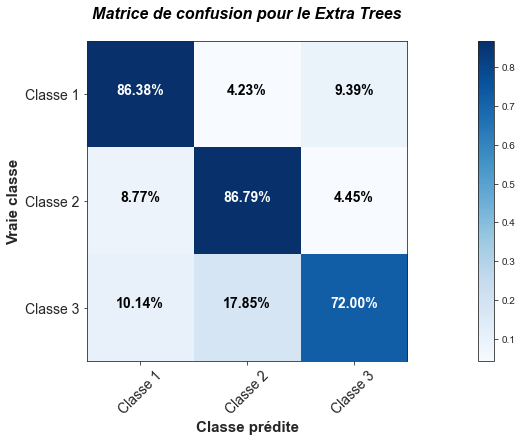

In [405]:
# Extra Trees
model = ExtraTreesClassifier(criterion="entropy", n_estimators = 100, max_depth = 12, bootstrap = True, oob_score = True ,random_state = 0, min_samples_split = 2)
model.fit(X_train_M_pubmed, Y_train_M_pubmed)
Y_pred = model.predict(X_test_M_pubmed)
print(classification_report(Y_test_M_pubmed, Y_pred, target_names = ["Classe 1","Classe 2","Classe 3"]))
cnf_matrix = confusion_matrix(Y_test_M_pubmed, Y_pred)
plot_confusion_matrix(cnf_matrix, title='Matrice de confusion pour le Extra Trees', classes = ["Classe 1","Classe 2","Classe 3"])
# Stocker les métriques
f1_ET_M_Pubmed = f1_score(Y_test_M_pubmed, Y_pred, average = "macro")
acc_ET_M_Pubmed = accuracy_score(Y_test_M_pubmed, Y_pred)

###### Résultats et comparaisons

| <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_M_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_M_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LR_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_M_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_GB_M_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_AB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_M_Pubmed * 100, 2))+'%'}}</center> |
| <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMNLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_M_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_GB_M_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_AB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_M_Pubmed * 100, 2))+'%'}}</center> |

Nous remarquons que cette fois-ci et pareillement au jeu de données **CiteSeer**, la représentation des données $M$ a fourni des résultats moins bons que la représentation $X$ ce qui nétait pas le cas pour le jeux de données **Cora**. La performance maximale est toujours achevée à l'aide de l'algorithme **Gradient Boosting**. Plusieurs algorithmes tels que **LDA**, **SVM** et **Random Forest** ont fourni des résultats similaires.

### Comparaison entre les différentes représentations <a class="anchor" id="comp"></a> 

| <center>Jeux de données</center> | <center>Métriques</center> | <center>Bayesien Naïf</center> | <center>KNN</center> | <center>LDA</center> | <center>QDA</center> | <center>Linear SVM</center> | <center>Non linear SVM</center> | <center>Régression logistique</center> | <center>CART</center> | <center>Random Forest</center> | <center>Gradient Boosting</center> | <center>AdaBoost</center> | <center>Extra Trees</center> |
| -------- | --------  | ------------- | --- | --- | --- | ---------- | -------------- | --------------------- |----- | ------------- | ---------- | --------- | ------------- |
| <b><center>X_Cora</center></b> | <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_X_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_X_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_X_Cora * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_LR_X_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_DT_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_X_Cora * 100, 2))+'%'}}</center> |
| <b><center>X_Cora</center></b> | <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMNLIN_X_Cora * 100, 2))+'%'}}</center> |<b> <center>{{str(round(acc_LR_X_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_DT_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_X_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_X_Cora * 100, 2))+'%'}}</center> |
| <b><center>M_Cora</center></b> | <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_M_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_M_Cora * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_M_Cora * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_LR_M_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_DT_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_M_Cora * 100, 2))+'%'}}</center> |
<b><center>M_Cora</center></b> | <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_M_Cora * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_SVMLIN_M_Cora * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_SVMNLIN_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_M_Cora * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_M_Cora * 100, 2))+'%'}}</center> |
| <b><center>X_CiteSeer</center></b> | <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_X_CiteSeer * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_X_CiteSeer * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_X_CiteSeer * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_SVMNLIN_X_CiteSeer * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_LR_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_X_CiteSeer * 100, 2))+'%'}}</center> |
| <b><center>X_CiteSeer</center></b> | <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_X_CiteSeer * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_SVMNLIN_X_CiteSeer * 100, 2))+'%'}}</center></b> |<center>{{str(round(acc_LR_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_X_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_X_CiteSeer * 100, 2))+'%'}}</center> |
| <b><center>M_CiteSeer</center></b> | <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_M_CiteSeer * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_M_CiteSeer * 100, 2))+'%'}}<center> | <b><center>{{str(round(f1_SVMLIN_M_CiteSeer * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_SVMNLIN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LR_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_GB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_AB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_M_CiteSeer * 100, 2))+'%'}}</center> |
| <b><center>M_CiteSeer</center></b> | <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_M_CiteSeer * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_SVMLIN_M_CiteSeer * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_SVMNLIN_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_GB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_AB_M_CiteSeer * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_M_CiteSeer * 100, 2))+'%'}}</center> |
| <b><center>X_Pubmed</center></b> | <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_X_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_X_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LR_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_X_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_GB_X_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_AB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_X_Pubmed * 100, 2))+'%'}}</center> |
    | <b><center>X_Pubmed</center></b> | <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMNLIN_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_X_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_GB_X_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_AB_X_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_X_Pubmed * 100, 2))+'%'}}</center> |
| <b><center>M_Pubmed</center></b> | <b><center>F1-Score</center></b> | <center>{{str(round(f1_NB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_KNN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LDA_M_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_QDA_M_Pubmed * 100, 2))+'%'}}<center> | <center>{{str(round(f1_SVMLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_SVMNLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_LR_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_DT_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_RF_M_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(f1_GB_M_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(f1_AB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(f1_ET_M_Pubmed * 100, 2))+'%'}}</center> |
| <b><center>M_Pubmed</center></b> | <b><center>Accuracy</center></b> | <center>{{str(round(acc_NB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_KNN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LDA_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_QDA_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_SVMNLIN_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_LR_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_DT_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_RF_M_Pubmed * 100, 2))+'%'}}</center> | <b><center>{{str(round(acc_GB_M_Pubmed * 100, 2))+'%'}}</center></b> | <center>{{str(round(acc_AB_M_Pubmed * 100, 2))+'%'}}</center> | <center>{{str(round(acc_ET_M_Pubmed * 100, 2))+'%'}}</center> |

Le tableau ci dessus représente une comparaison globale des résultats obtenus entre les différentes représentations et les différents jeux de données pour les différents algorithmes appliqués.

Nous pouvons clairement voir que les résultats au niveau du jeu de données **Pubmed** sont strictement meilleurs que les autres, cela peut être justifié par le fait que la réduction de dimension n'a pas été appliquée sur ledit jeu de données.

Nous remarquons aussi que pour les jeux de données **Pubmed** et **CiteSeer** la représentation $X$ a fourni les meilleurs résultats alors que pour le jeu de données **Cora** c'était la représentation $M$ qui a présenté la meilleure performance.

Nous constatons également que les meilleurs résultats sont souvent fournis par les algorithmes **SVM** et **régression logistique**.

Finalement, nous avons constaté que les algorithmes basés sur les arbres de décision fonctionnent beaucoup mieux sur les l'espace original vis-à-vis l'espace réduit.

###  Discussion et proposition d'autres représentations <a class="anchor" id="discrep"></a>

Comme nous avons remarqué dans la section précédente, la manière selon laquelle les données sont représentées impacte beaucoup les résultats et la performance des algorithmes. Prenons l'exemple du jeu de données **Cora** qui a démontré une augmentation remarquable dans la performance après avoir changé la représenation de données de $X$ en $M$.

Cela nous pousse à discuter quelques représentations qui peuvent peut-être représenter les données d'une façon qui caractérise mieux les informations présentes dans la matrice $W$ et $X$:

- La représentation $W*X$ : Nous pouvons essayer la matrice résultante du produit entre la matrice $W$ et $X$ 


- L'approche ***Graph Neural Networks*** : Vu que nos données peuvent être représenté sous forme d'un graphe, ile sera intéressant d'essayer les modèles *Deep Learning* puisqu'ils sont plus performants dans le domaine de classification que ceux du *Machine learning*

## Conclusion générale <a class="anchor" id="conc"></a> 

Dans le cadre de ce projet, nous avons eu l'occasion de travailler sur différents types de données et appliquer plusieurs algorithmes. Cela nous permet de sortir avec quelques conclusions :

- **La sélection des variables** : C'est un processus indispensable surtout pour les grandes bases de données afin de pouvoir minimiser le temps de calcul et optimiser la combinaison des variables

- **L'équilibrage des données** : Il est très important d'effectuer un équilibrage des données avant s'appliquer les algorithmes afin d'assurer le bon déroulement de ces derniers. Il faut également faire attention à ne pas équilibrer les données du test.

- **Les métriques de performance** : Malgré la disponibilité d'une dizaine de métriques d'évaluation, il faut bien choisir celles qui répondent au contexte du projet et à la nature des données. Nous avons bien souligné que pour notre cas c'est la mesure ***F1-Score*** qui est la plus pertinente pour l'interprétation des résultats.

- **La représentation des données** : La manière selon laquelle les données sont représentées compte beaucoup, nous avons eu l'occasion d'observer ça clairement dans la deuxième partie du projet en comparant différentes représentations pour différents jeux de données.

- **La réduction de dimension** : Malgré le fait que l'application d'une réduction de dimension était indispensable pour le traitement des données relationnelles, nous avons bien remarqué que la performance maximale a été obtenue sur l'espace d'origine. Cela peut être expliqué par le fait que les données non réduites conservent l'information complète.

- **La performance des algorithmes** : Finalement, nous mettons le point sur le lien observé entre la performance des algorithmes et le types de données. Nous avons remarqué que les algorithmes basés sur les arbres de décision étaient les plus performants sur les données bancaires et les données non réduites alors que le SVM et la régression logistique étaient les meilleurs sur les données relationnelles réduites.